In [1]:
# %matplotlib notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os 
import math
from tqdm import tqdm
# import tqdm.notebook as tqdm
import Util as ut
import seaborn as sns
# import seaborn as sns
from DataLoader import GetSpectrum
import itertools

import TrackFreq

tf = TrackFreq.TrackingFrequently()

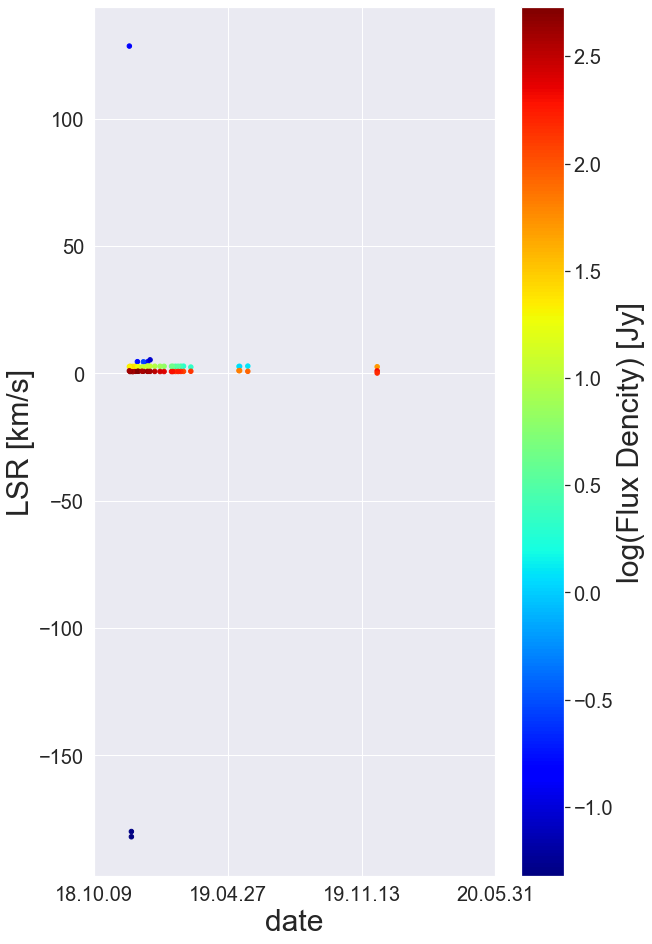

In [2]:
source_list = ['IRAS15193+31', 'H2O']
# source_list = ['IRAS18286-09', 'H2O']
tf.oname = os.path.join("/Users/yhamae/OneDrive/astro/FLASHING/dynamic_spectrum/" + source_list[0] + '_' + source_list[1] + '.txt')

data = GetSpectrum.load_file(tf.oname)
# print(data)
mjd = [float(data[i][0]) for i in range(0, len(data))]
lsr = [float(data[i][1]) for i in range(0, len(data))]
flux = [math.log10(float(data[i][2])) for i in range(0, len(data))]

fig = plt.figure(figsize = (9,16 ))

# fig = plt.figure(figsize = (4,3 ))
ax1 = fig.add_subplot(1,1,1)
im = ax1.scatter(mjd, lsr, c = flux, cmap = 'jet', s = 20)
# plt.ylim(135,160)
plt.locator_params(axis='x',nbins=4)
plt.xticks(list(plt.xticks())[0], [ut.mjd2datetime(int(s)).strftime("%y.%m.%d") for s in list(plt.xticks())[0]], fontsize = 20)
ax1.set_ylabel('LSR [km/s]', fontsize = 30)
ax1.set_xlabel('date', fontsize = 30)
plt.yticks(fontsize = 20)
# ax1.set_yticklabels(ax1.get_yticklabels(),fontsize=20)
# print(list(ax1.get_yticklabels()))
cbar = plt.colorbar(im)
cbar.set_label('log(Flux Dencity) [Jy]', fontsize = 30)
# cbar.xticks(fontsize=20)
# print(cbar)
# cbar.set_tics(fontsize=20)
cbar.ax.tick_params(labelsize=20)
# plt.rcParams['font.family'] = 'Times New Roman'
fig.patch.set_alpha(0)
# plt.rcParams.update({'font.size': 220})
# plt.rcParams['font.size']  =200
plt.savefig('/Users/yhamae/Desktop/dynamicspectrum.pdf')
plt.show()


IRAS15193+31 sin Fitting (LSR)
R^2 = 0.9989429343033671
T   = 5416.513130498489 [day]
    = 14.82960473784665 [year]


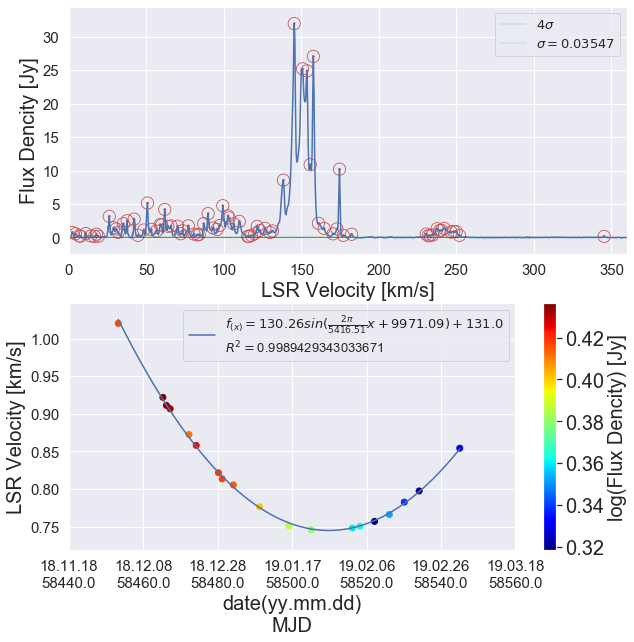

In [3]:

oname = '/Users/yhamae/OneDrive/astro/FLASHING/peak/IRAS18286-09_H2O_190206.txt'
data = GetSpectrum.load_file(oname)
lsrp = [float(data[i][1]) for i in range(0, len(data))]
valp = [float(data[i][2]) for i in range(0, len(data))]
# print(len(lsrp))
# print(len(valp))
tf = GetSpectrum()
# flux = [math.log10(float(data[i][2])) for i in range(0, len(data))]
# tf = GetSpectrum()
tf.filename = '/Users/yhamae/OneDrive/astro/FLASHING/spectrum/i18286_H2O_190206.txt'
tf.mode = ''
status = tf.get_data()
# print(status)
# print(len(tf.freq))
# print(len(tf.T))
# print(tf.freq)
# print(tf.T)
# plt.rcParams['font.family'] = 'Times New Roman'
fig = plt.figure(figsize = (10, 10))
# plt.subplots_adjust(hspace=0.5)
# fig = plt.figure(figsize = (4,3 ))
ax1 = fig.add_subplot(2,1,1)
# # ax1.scatter(lsr, val, s = 20)
# # plt.ylim(135,160)
# plt.locator_params(axis='x',nbins=4)
# plt.xticks(list(plt.xticks())[0], [ut.mjd2datetime(int(s)).strftime("%y.%m.%d") + '\n' + str(s) for s in list(plt.xticks())[0]], fontsize = 20)
# ax1.set_ylabel('LSR [km/s]', fontsize = 20)
# ax1.set_xlabel('MJD', fontsize = 20)
# cbar = plt.colorbar(im)
# cbar.set_label('Flux Dencity [Jy]', fontsize = 20)
# plt.figure(figsize=(16,9))

ax1.hlines(y=0.03547130804840644 * 4, xmin=min(lsrp), xmax=max(lsrp), linewidth = 0.3, label='$4\\sigma$', edgecolors='g')
ax1.hlines(y=0.03547130804840644, xmin=min(lsrp), xmax=max(lsrp), linewidth = 0.3, linestyle='dashed', label='$\\sigma = 0.03547$', edgecolors='g')
ax1.hlines(y=0, xmin=min(lsrp), xmax=max(lsrp), linewidth = 0.5, edgecolors='k')
ax1.plot(tf.freq, tf.T)
ax1.scatter(lsrp, valp, facecolors='none', edgecolors='r', linewidth = 0.8, s=150.0)
ax1.scatter(lsrp, valp, facecolors='none', edgecolors='r', linewidth = 1, s=10, marker = '.')
ax1.set_xlim(0, 360)
ax1.set_ylabel('Flux Dencity [Jy]', fontsize = 20)
ax1.set_xlabel('LSR Velocity [km/s]', fontsize = 20)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
# plt.rcParams['font.family'] ='Helvetica-Light'
# plt.title(self.title)
# plt.subplots_adjust(1,1)
ax1.legend(fontsize = 13)
# plt.rcParams['font.family'] = 'Times New Roman'
fig.patch.set_alpha(0)
# plt.xlabel(self.x_label)
# plt.ylabel(self.y_label)
# plt.rcParams.update({'font.size': 220})
tf = TrackFreq.TrackingFrequently()
# plt.rcParams['font.family'] = 'Times New Roman'
# plt.show()
def fit(x_label, y_label, c_label, point, ini, title, plot_flag = True):

    tf.d = [2]
    tf.ini = np.array(ini)
    tf.maxfev = 100000

    sns.set()
    tf.a = point

    raw_x = [tf.a[i][0] for i in range(0, len(tf.a))]
    raw_y = [tf.a[i][1] for i in range(0, len(tf.a))]
    raw_c = [math.log10(math.fabs(tf.a[i][2])) for i in range(0, len(tf.a))]



    x1, y1, l1, a, b, c, d, r2 = tf.sin_fit()
    if plot_flag:
#         fig = plt.figure(figsize = (14,5))
#         plt.rcParams['font.family'] = 'Times New Roman'
        ax = fig.add_subplot(2,1,2)
#         ax.set_title(title, fontsize=18)
        im = ax.scatter(raw_x, raw_y, c = raw_c, cmap='jet')
        ax.plot(x1, y1, label = l1 + '\n$R^2 = $' + str(r2))
#         ax.plot(x1, y1, label = l1 + '$')
        ax.legend(fontsize=13)
        ax.set_xlabel(x_label, fontsize = 20)
        ax.set_ylabel(y_label, fontsize = 20)
        cbar = plt.colorbar(im)
        cbar.set_label(c_label, fontsize = 20)
        fig.patch.set_alpha(0)
        plt.yticks(fontsize = 15)
        plt.xticks(fontsize = 15)
        cbar.ax.tick_params(labelsize=20)
        plt.xticks(list(plt.xticks())[0], [ut.mjd2datetime(int(s)).strftime("%y.%m.%d") + '\n' + str(s) for s in list(plt.xticks())[0]])
#         plt.show()
#     fig.savefig('/Users/yhamae/Desktop/' + title + '.eps')
    return r2, a, b, c, d, 




point = [[58453.25613425926, 1.0203914880799, 2.6129784132890133], [58465.259884259256, 0.9219616484515, 2.732152960831414], [58466.194340277776, 0.9112511560127, 2.7237782922423888], [58467.20201388889, 0.9067873837402, 2.7106182180451284], [58472.274143518516, 0.8725093157649, 2.579231765547459], [58474.21084490741, 0.8580712866497, 2.658796546733937], [58480.18274305556, 0.8216996200807, 2.6237891123363726], [58481.17805555555, 0.8134776763866, 2.61695577285656], [58484.19122685185, 0.8054183421677, 2.5969544952466523], [58491.23554398148, 0.7763895443571, 2.517090460485096], [58499.13180555555, 0.7508550052314, 2.4326428966983222], [58505.11449074074, 0.7458045787495, 2.3961476180111365], [58516.18938657407, 0.7480062703814, 2.2938034321388137], [58518.17668981481, 0.7504327018651, 2.3030392500209675], [58522.15048611111, 0.7569260032782, 2.083971796497942], [58526.119571759256, 0.7660500879233, 2.2534982081415227], [58530.152708333335, 0.7825891604086, 2.1835124894390967], [58534.134780092594, 0.7973996882329, 2.0819790803921623], [58545.0568287037, 0.8542932723148, 2.138055614023105], [58616.95606481482, 1.1026992726627, 1.8240289942940868], [58617.925104166665, 1.1106293622168, 1.8215901932889482]]
ini = [1,10000,10000,1]
r2, a, b, c, d,  = fit('date(yy.mm.dd)\nMJD', 'LSR Velocity [km/s]', 'log(Flux Dencity) [Jy]', point[0:-2], ini, 'IRAS15193+31 sin Fitting (LSR)')
print('IRAS15193+31 sin Fitting (LSR)')
print('R^2 = ' + str(r2))
print('T   = ' + str(b) + ' [day]')
print('    = ' + str(b / 365.25) + ' [year]')
# plt.rcParams['font.family'] = 'Times New Roman'
plt.savefig('/Users/yhamae/Desktop/spectrum.pdf')
plt.show()


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import math
# from tqdm import tqdm
# from tqdm import tqdm_notebook
import Util as ut
# import seaborn as sns
from DataLoader import GetSpectrum
import traceback
%matplotlib inline

import TrackFreq


err_file = []

source_list = []
file_list = os.listdir("/Users/yhamae/OneDrive/astro/FLASHING/peak/")
# ref_freq_list = ['H2O', 'H2OR', 'H2OB', 'SiOv3', 'SiOv2', 'SiOv1', 'SiOv0']
ref_freq_list = ['H2O', 'SiOv3', 'SiOv2', 'SiOv1', 'SiOv0']
# print(file_list)
for fname in file_list:
    if not fname.split('_')[0] in [source_list[i][0] for i in range(0, len(source_list))]:
        for val in ref_freq_list:
            source_list.append([fname.split('_')[0], val])

# source_list = [['RAS15193+31', 'H2O']]
# source_list = [['IRAS18286-09', 'H2O']]


# min_v = -300
# max_v = 300
# lower_v = [-400,-250]
# upper_v = [250,400]
lower_v = [0,0]
upper_v = [0,0]
peak_list = []

os.chdir("/Users/yhamae/OneDrive/astro/FLASHING/peak/")
print('Detected Maser Component')

for i in tqdm(range(0, len(source_list))):
    try:
        tf = TrackFreq.TrackingFrequently()
        tf.print_load_data = False
        tf.source = source_list[i][0]  # 天体名
        tf.ref_freq = source_list[i][1]  # 分子名（H2O,SiOなど）
        tf.directory = os.path.join("./")  # ファイルを検索するディレクトリ
        tf.oname = os.path.join("/Users/yhamae/OneDrive/astro/FLASHING/dynamic_spectrum/" + source_list[i][0] + '_' + source_list[i][1] + '.txt')  # 書き出すテキストファイルの名前
        tf.source_keywoed = source_list[i][0] + "_" + source_list[i][1] + "_"
        tf.plot_flag = False
#         tf.uselim = True
#         tf.ymax = 10
#         tf.ymin = 0
        tf.get_peak_data()
        peak_flag = False
        if lower_v == [0,0] and upper_v == [0,0]:
            peak_flag = True
        for val, time in zip(tf.raw_freq, tf.time):
            if lower_v[0] <= val <= lower_v[1] or upper_v[0] <= val <= upper_v[1]:
#                 print(val)
                tqdm.write(tf.source + ' ' + tf.ref_freq + ' : ' + str(val) + 'km/s observed in ' + str(ut.mjd2datetime(time).strftime("%y.%m.%d")))
                peak_flag = True
        if peak_flag:
            peak_list.append([tf.oname, [source_list[i][0], source_list[i][1]]])

    except:
        err_file.append(tf.oname)

print('Error File')
print('\n'.join(err_file))


  5%|▌         | 13/240 [00:00<00:02, 105.10it/s]

Detected Maser Component


100%|██████████| 240/240 [00:01<00:00, 156.17it/s]

Error File



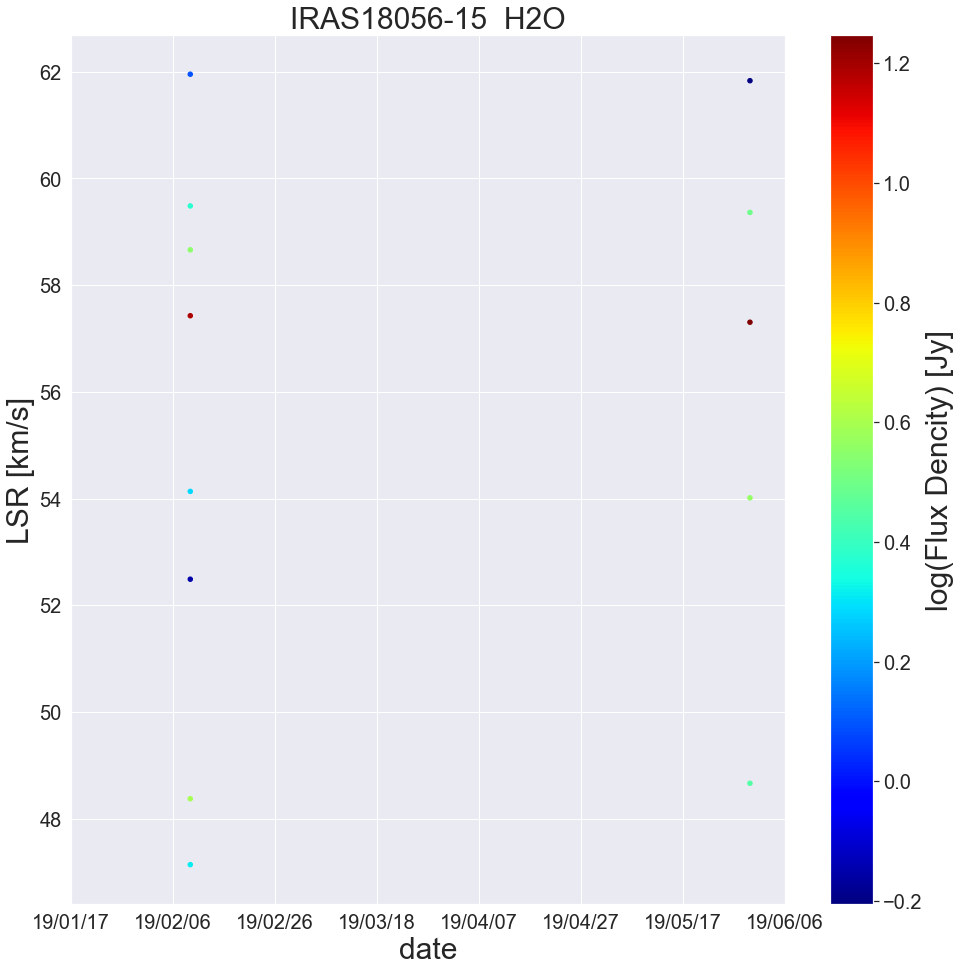

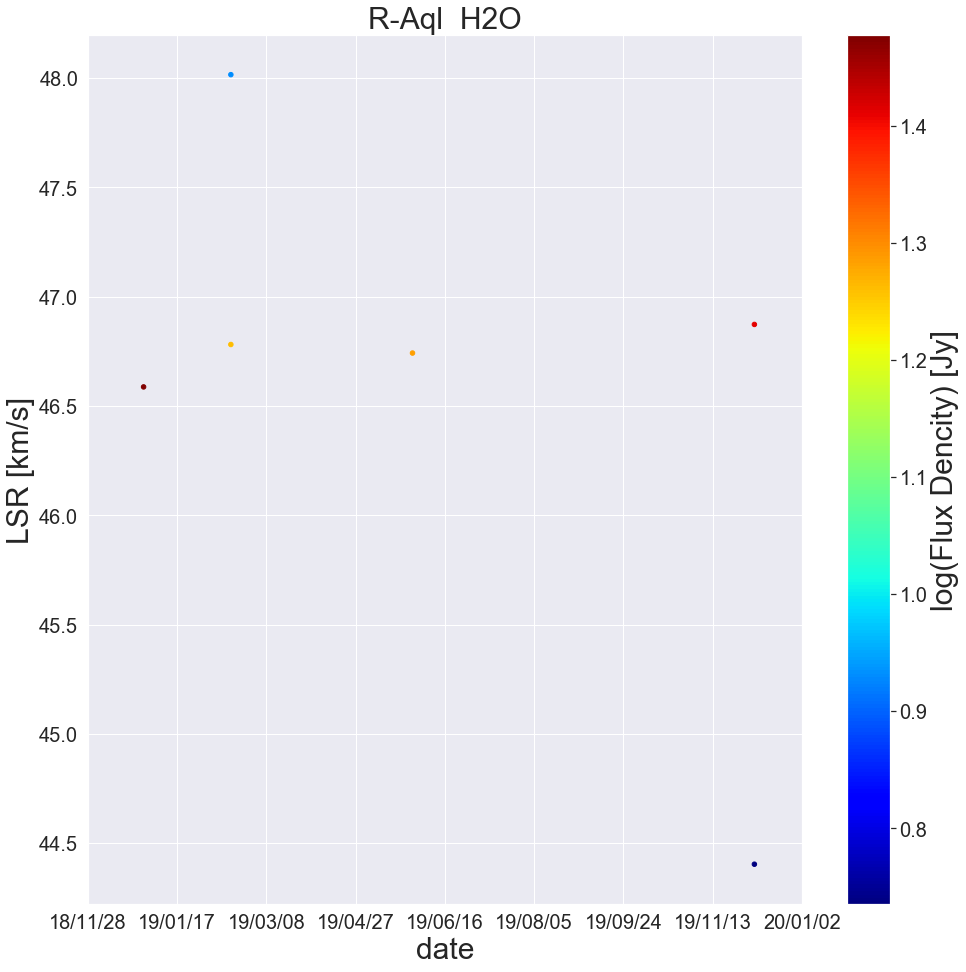

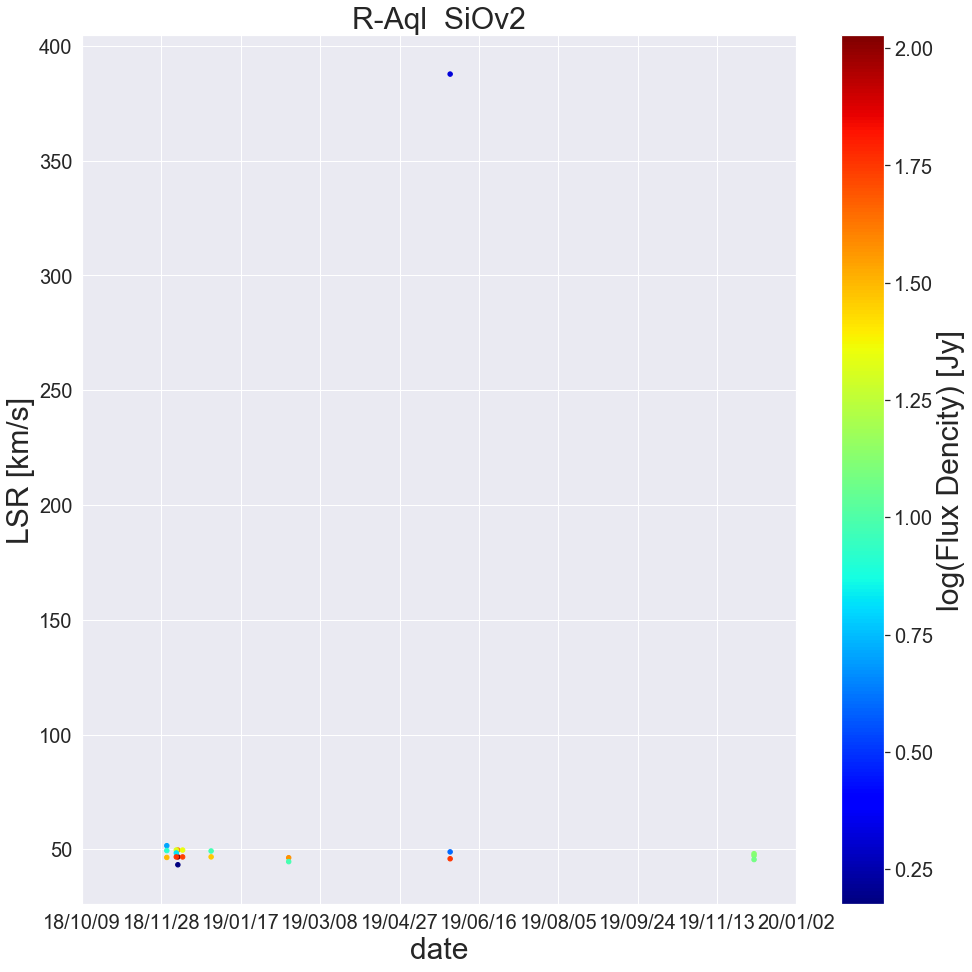

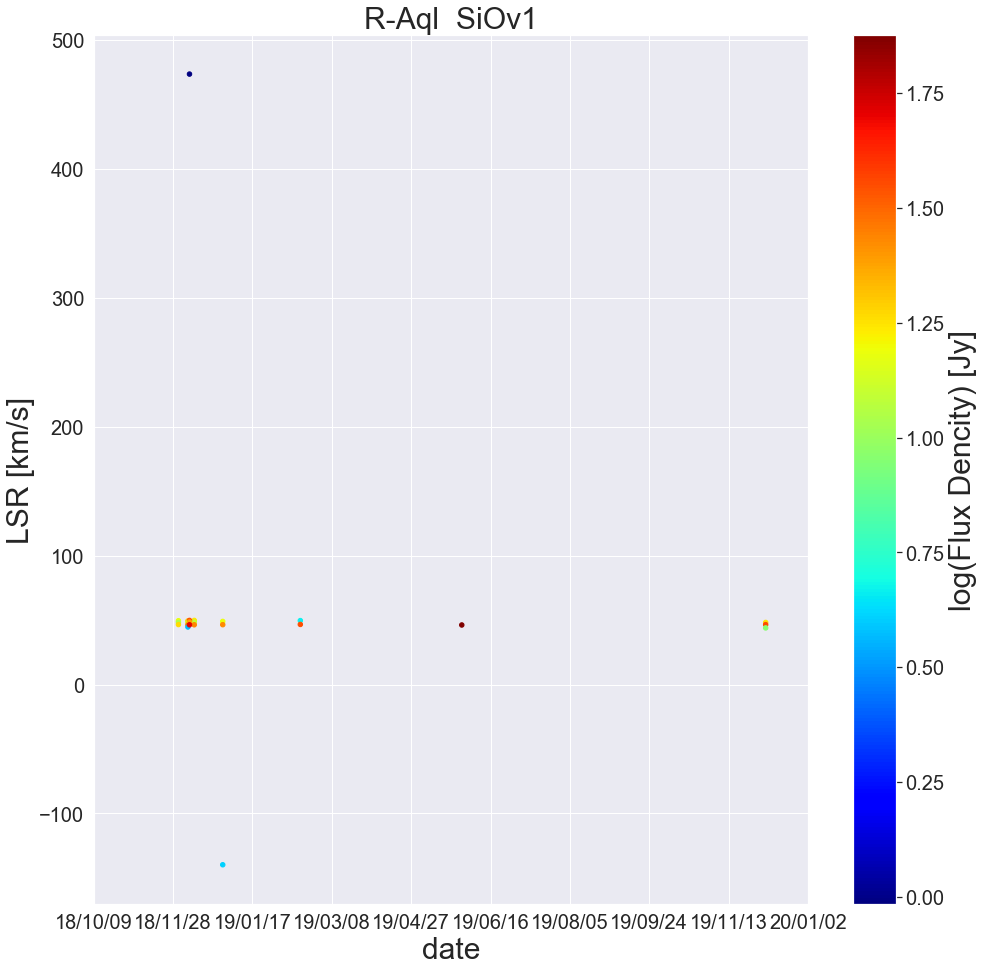

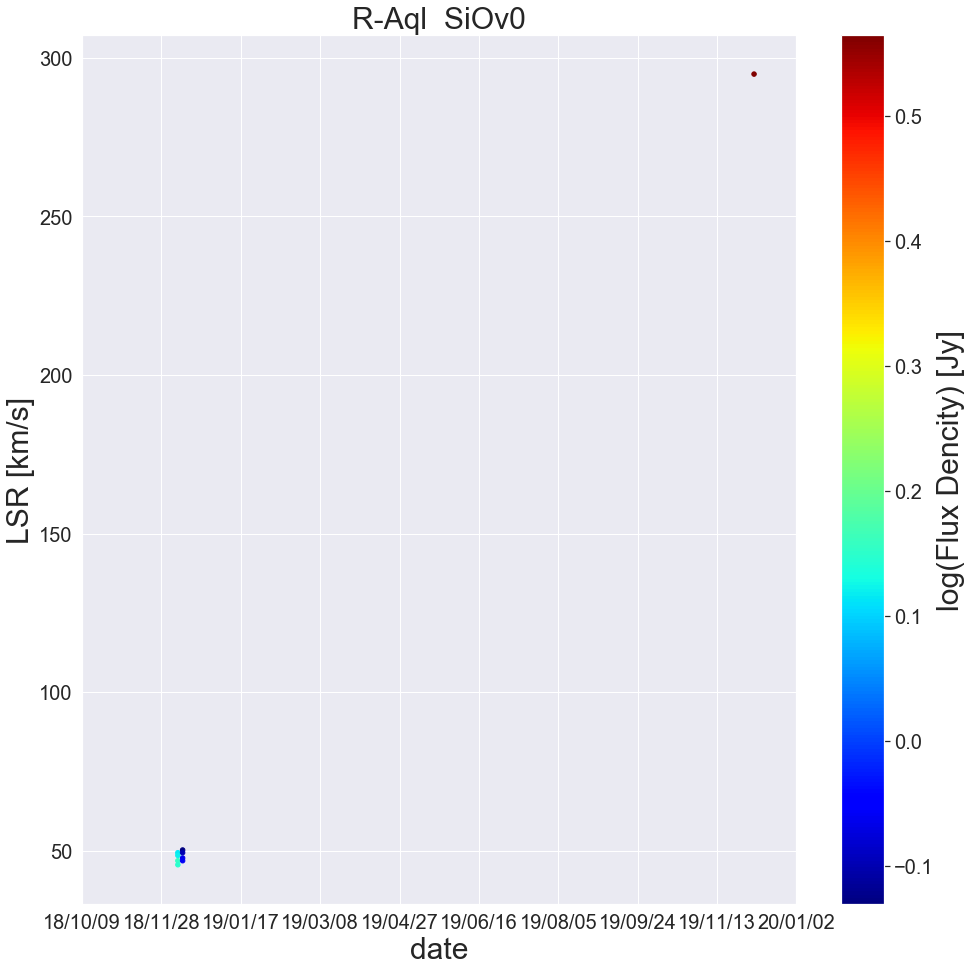

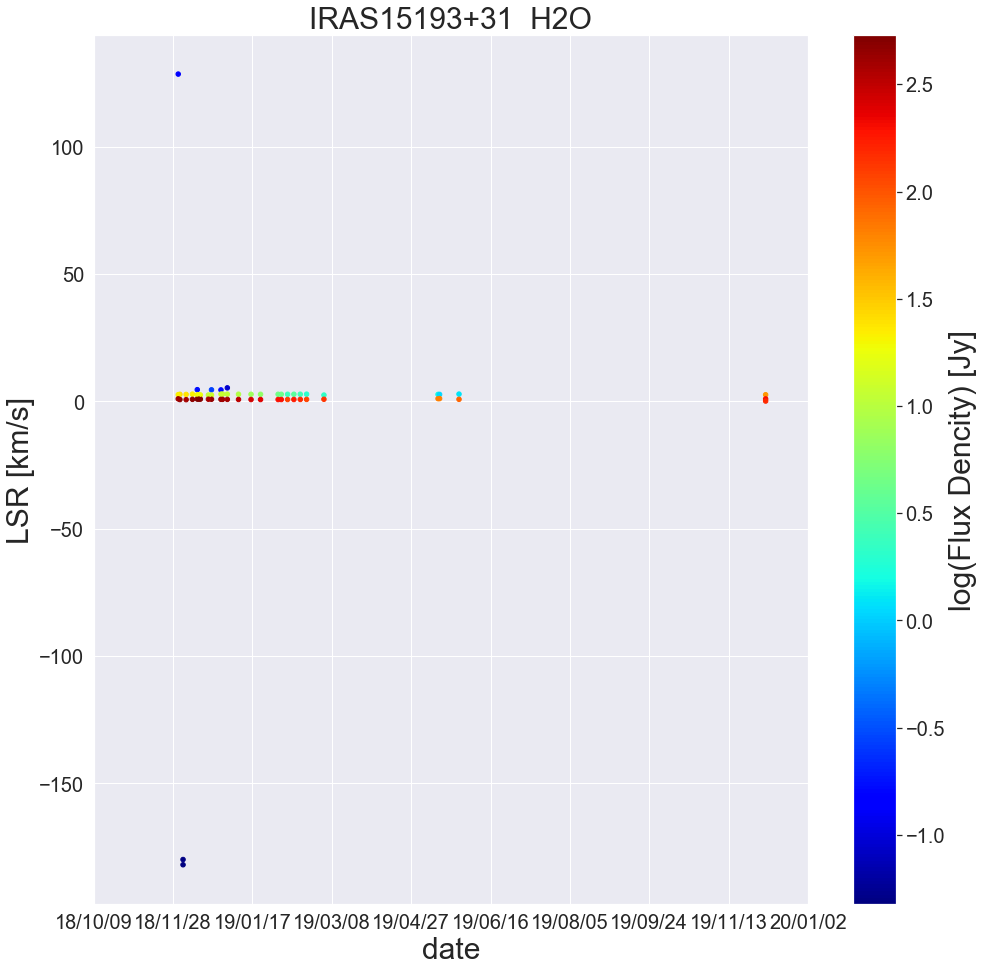

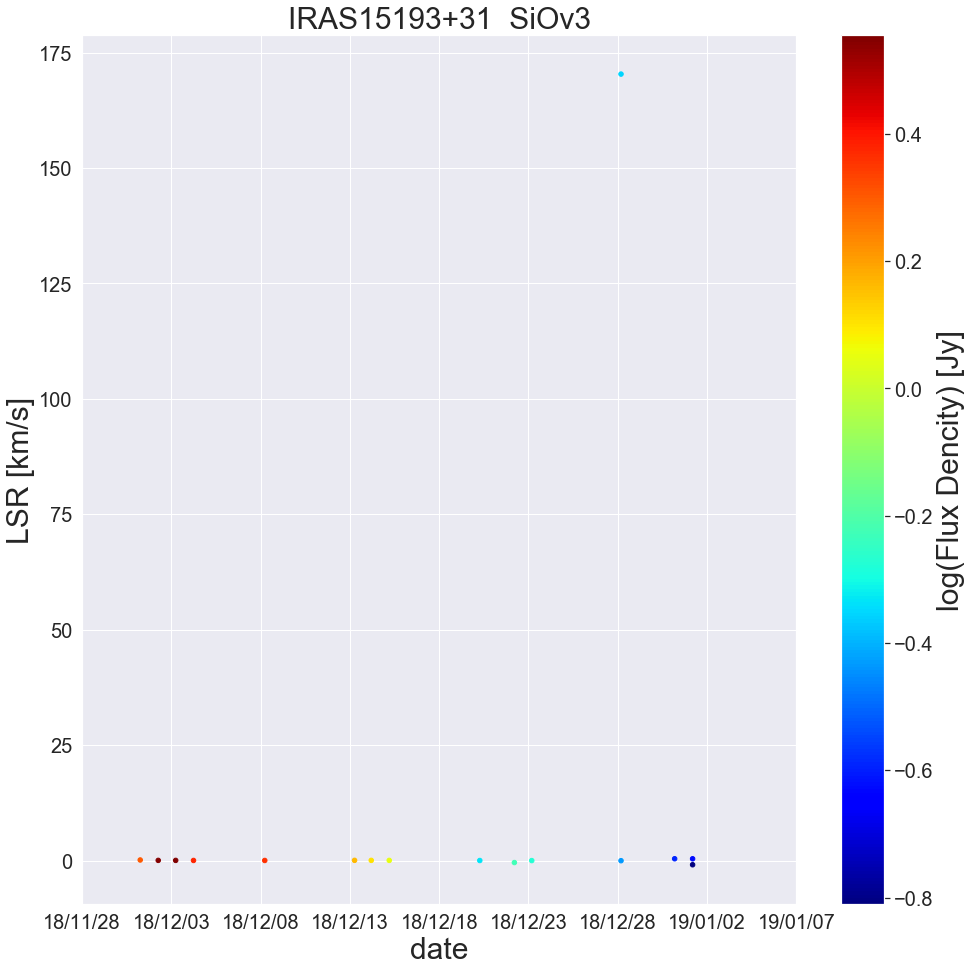

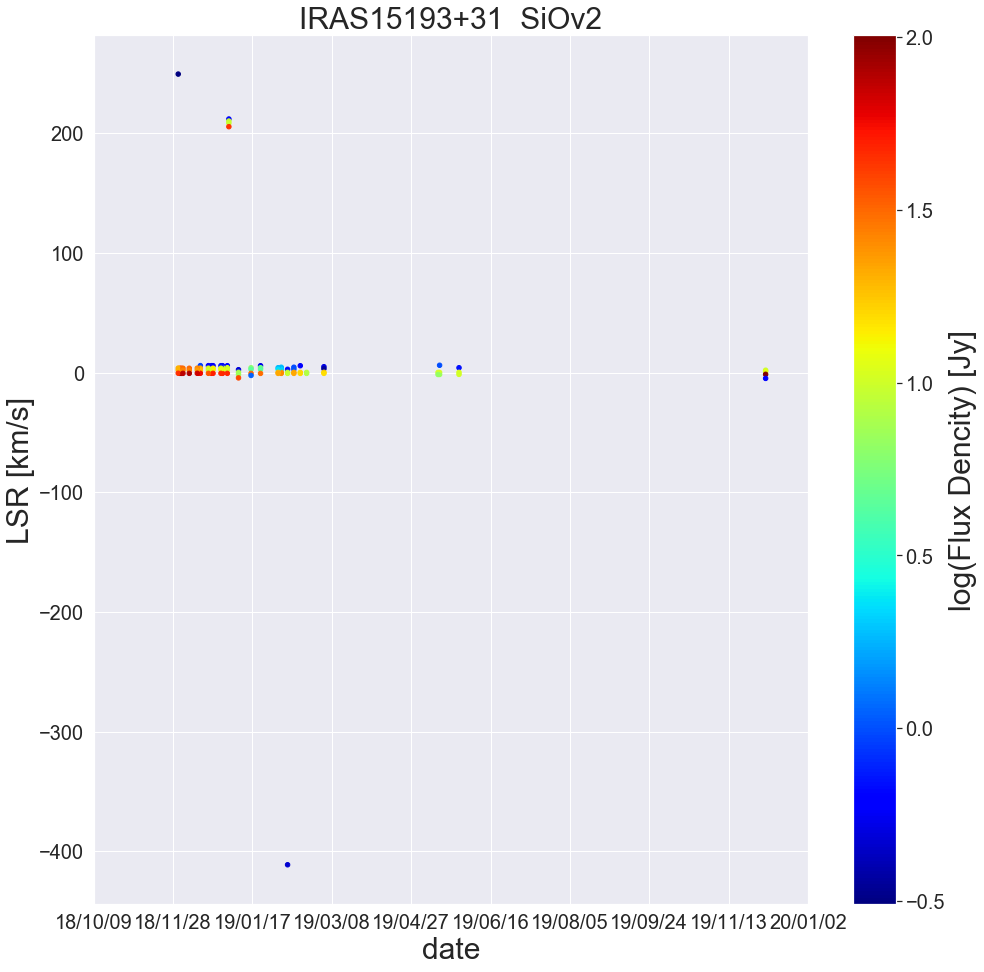

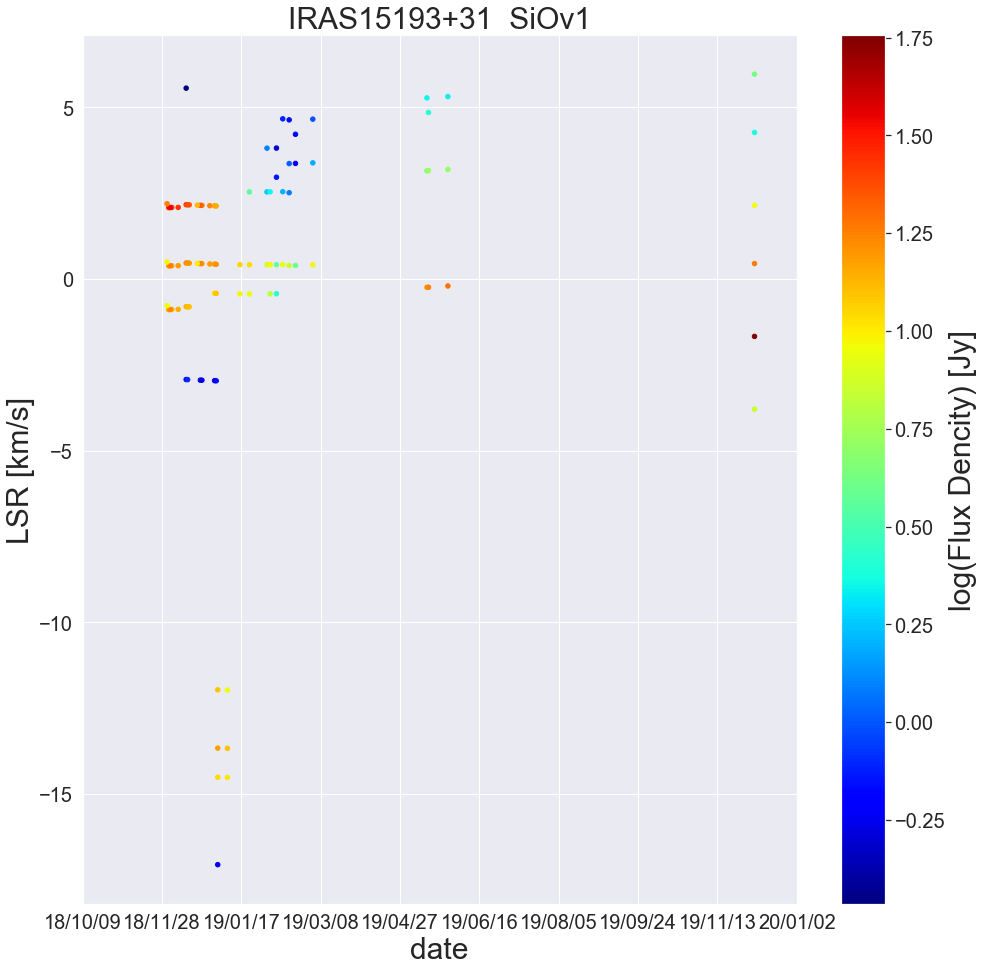

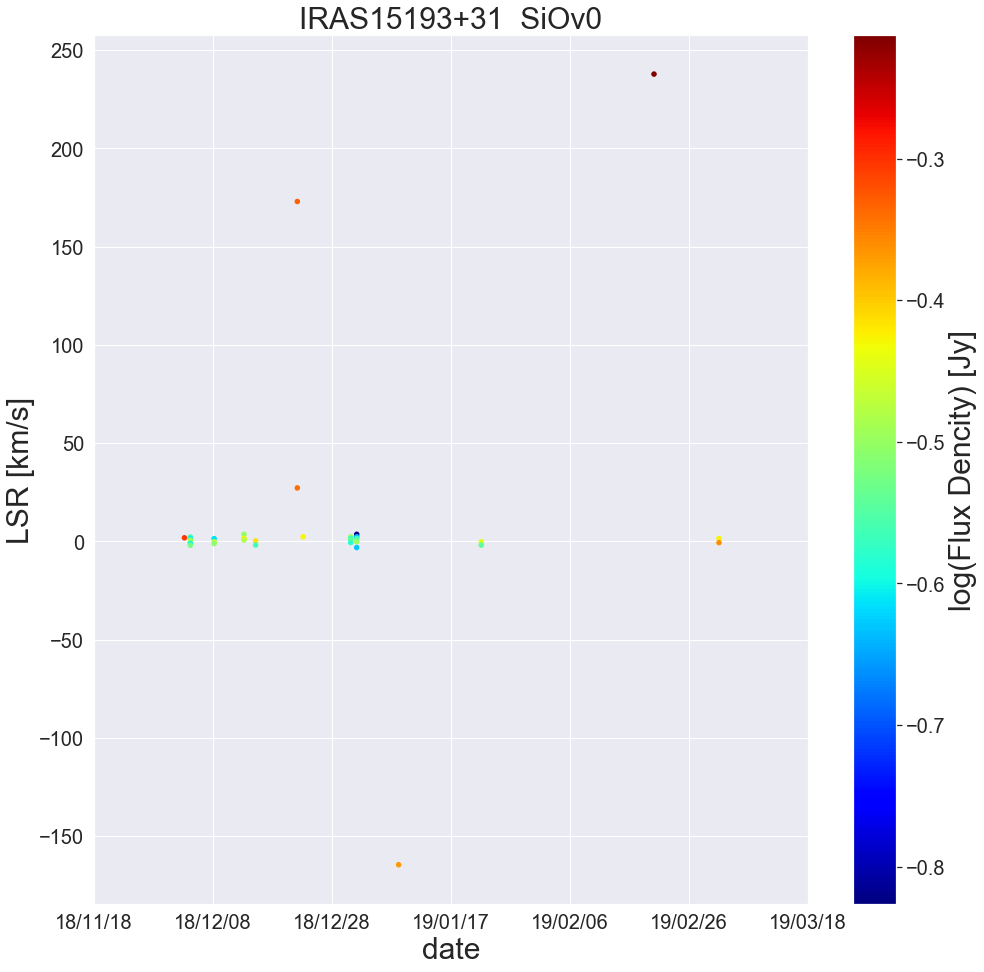

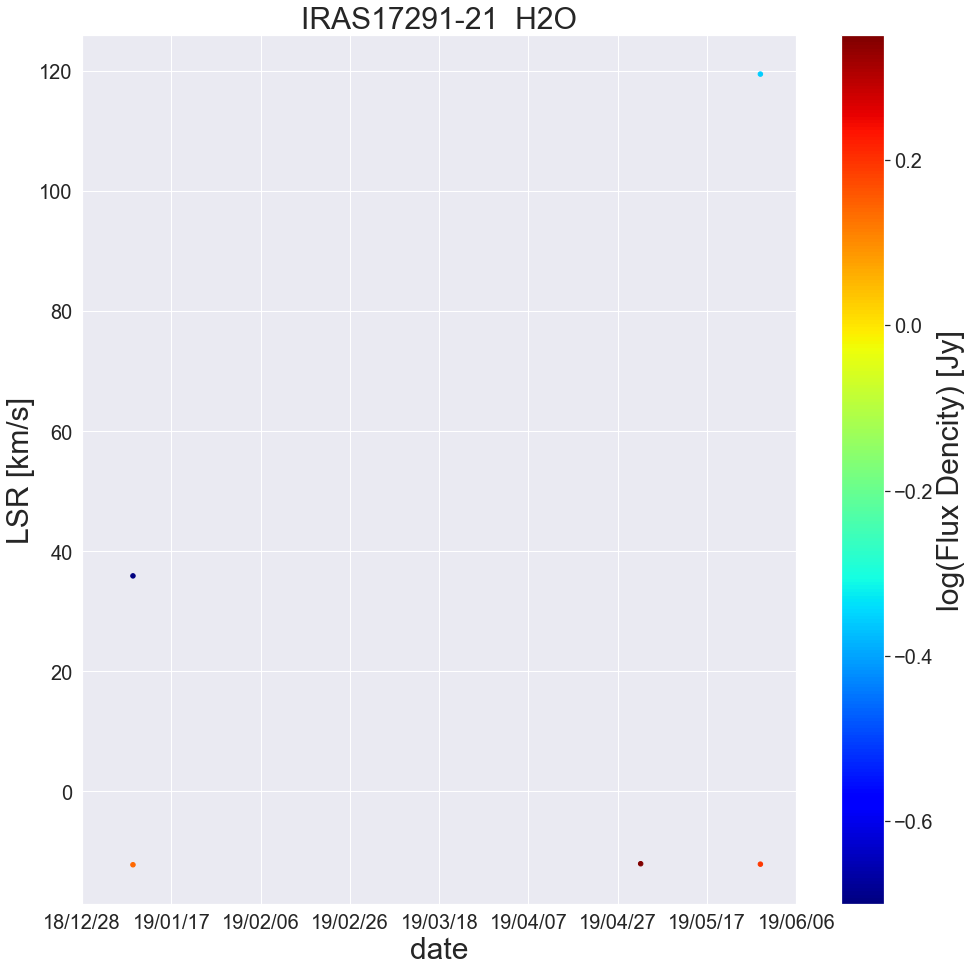

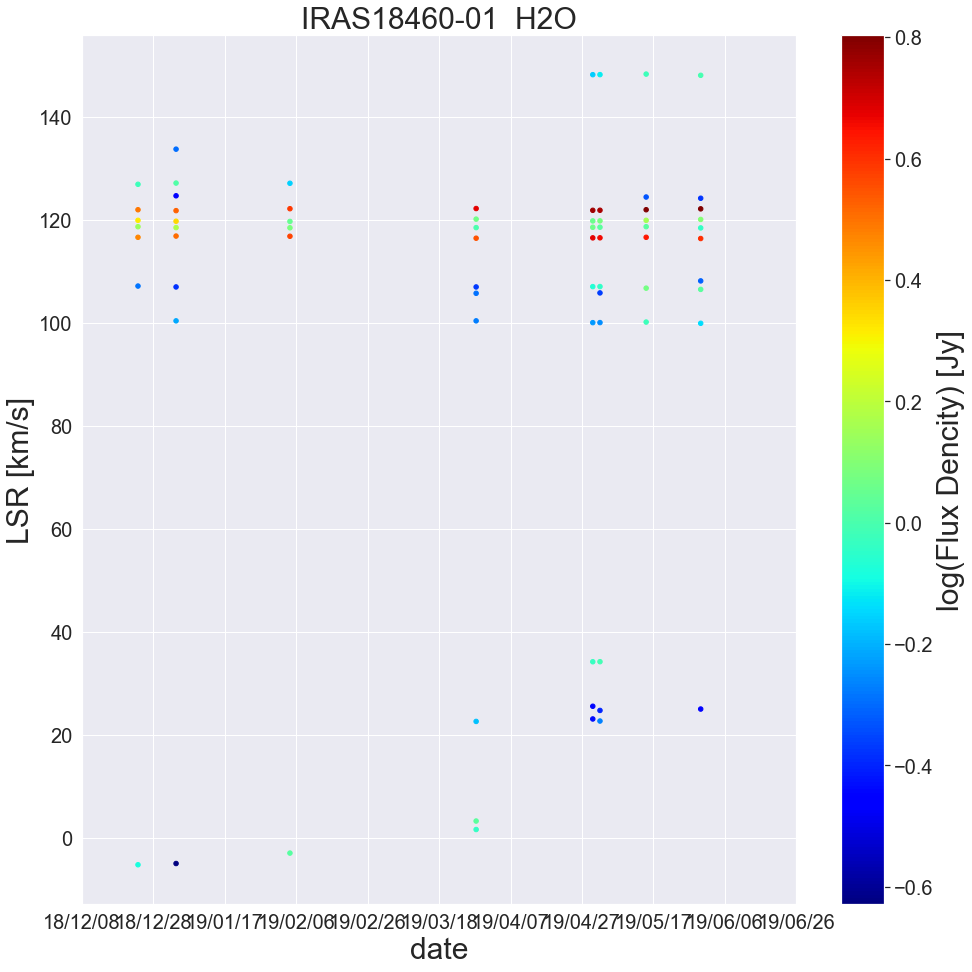

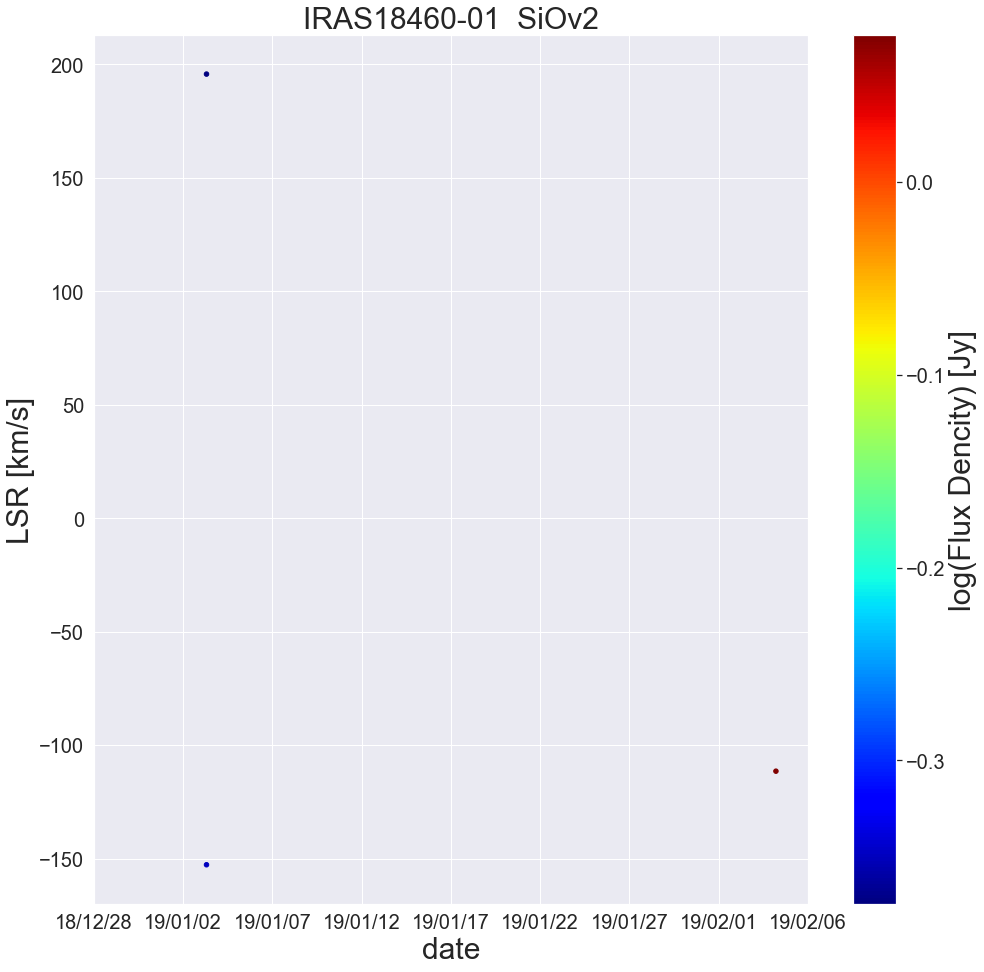

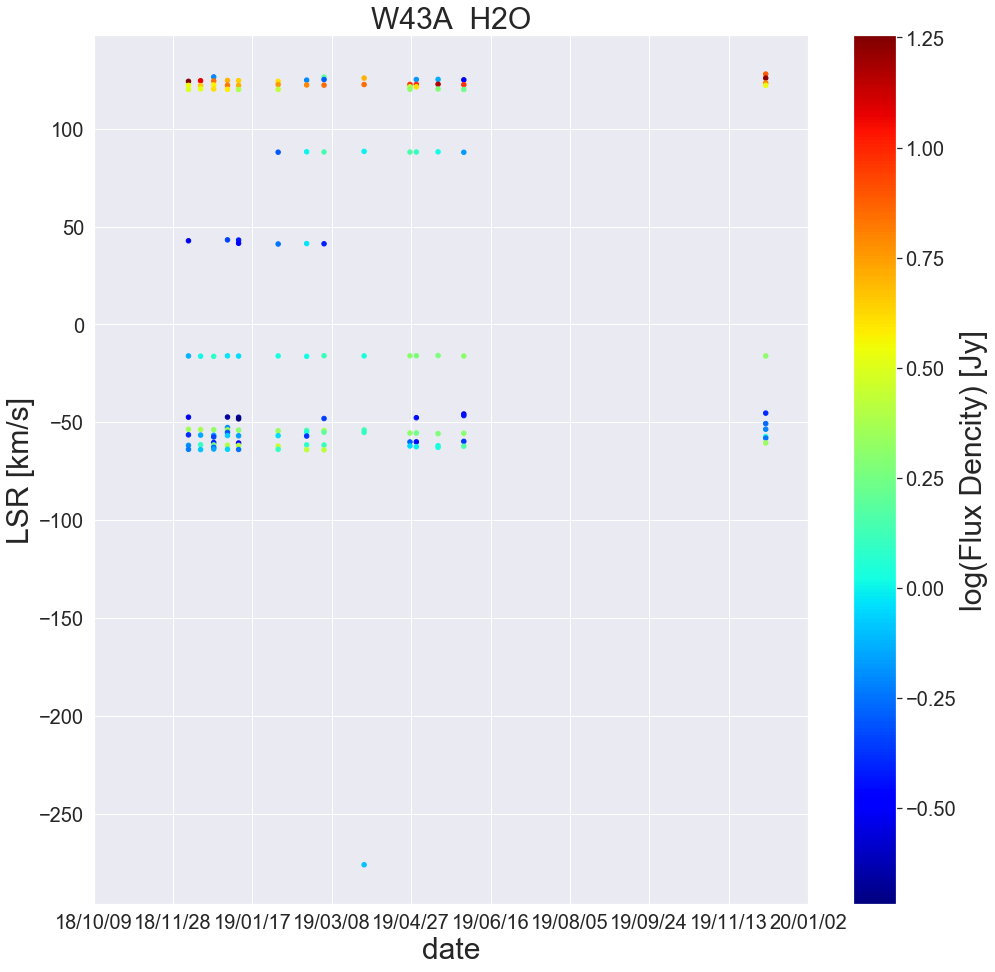

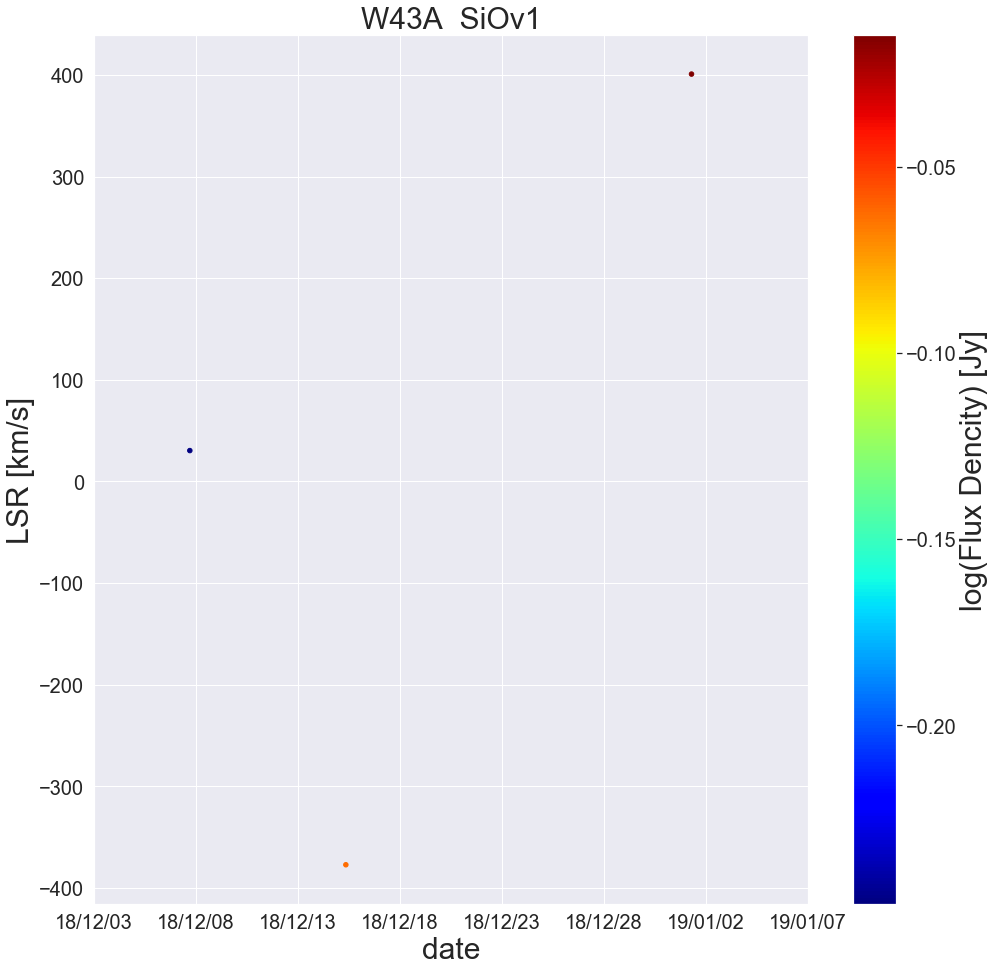

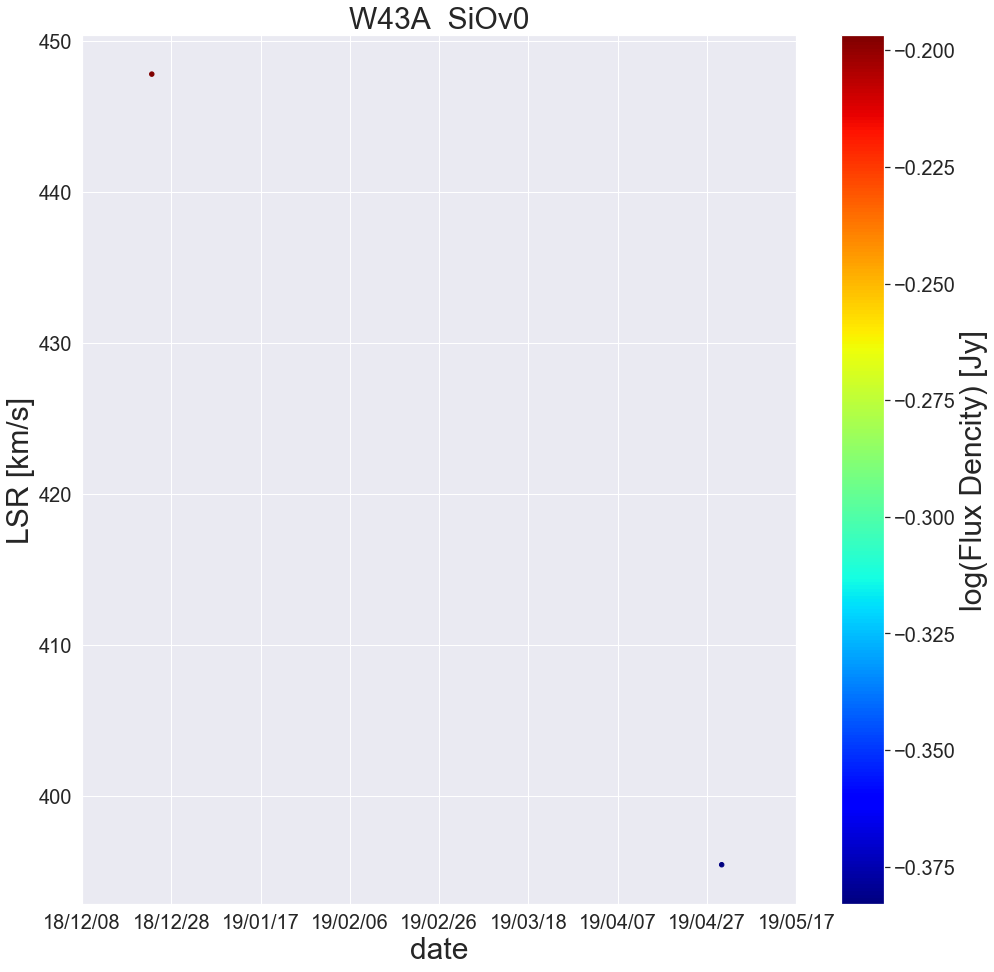

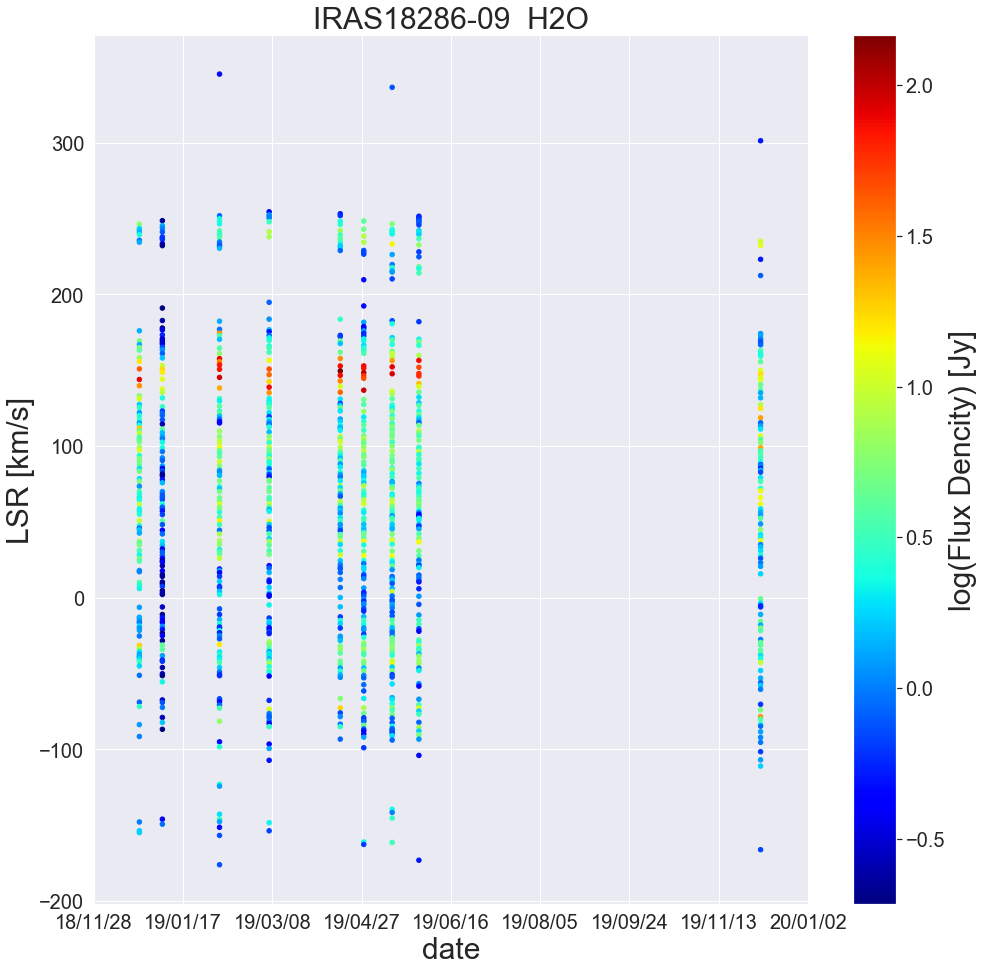

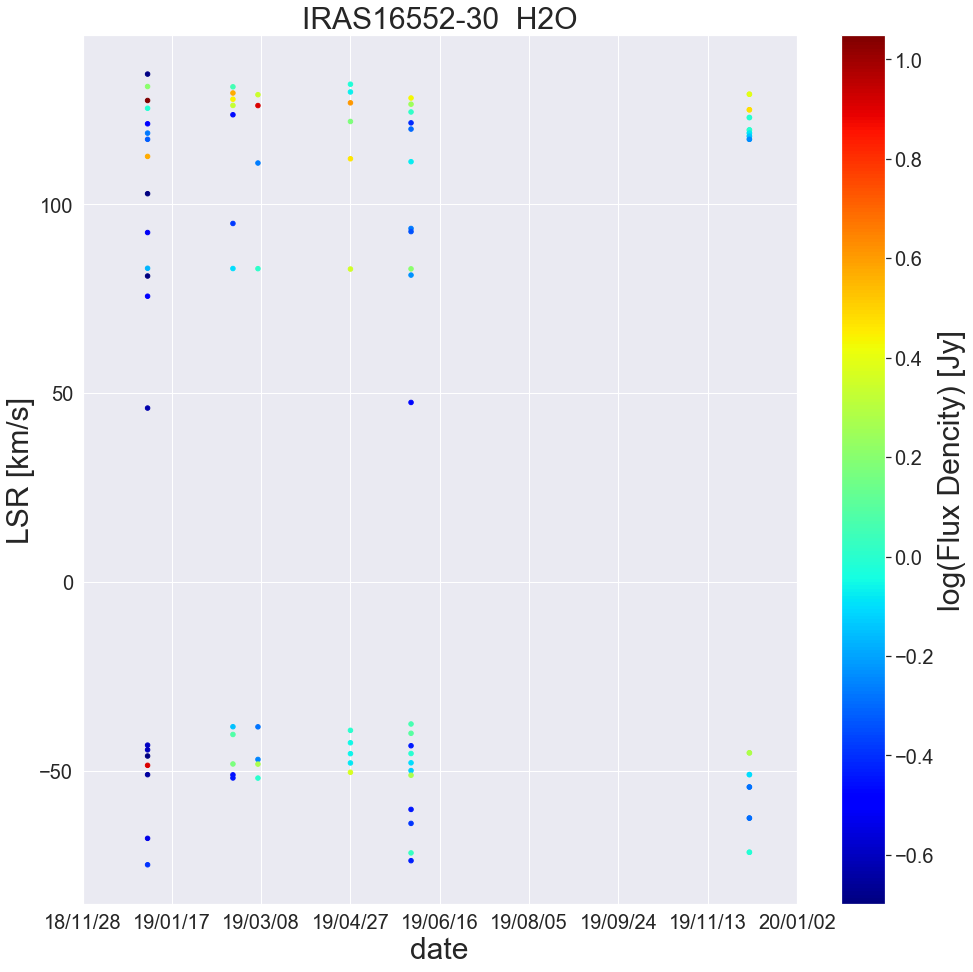

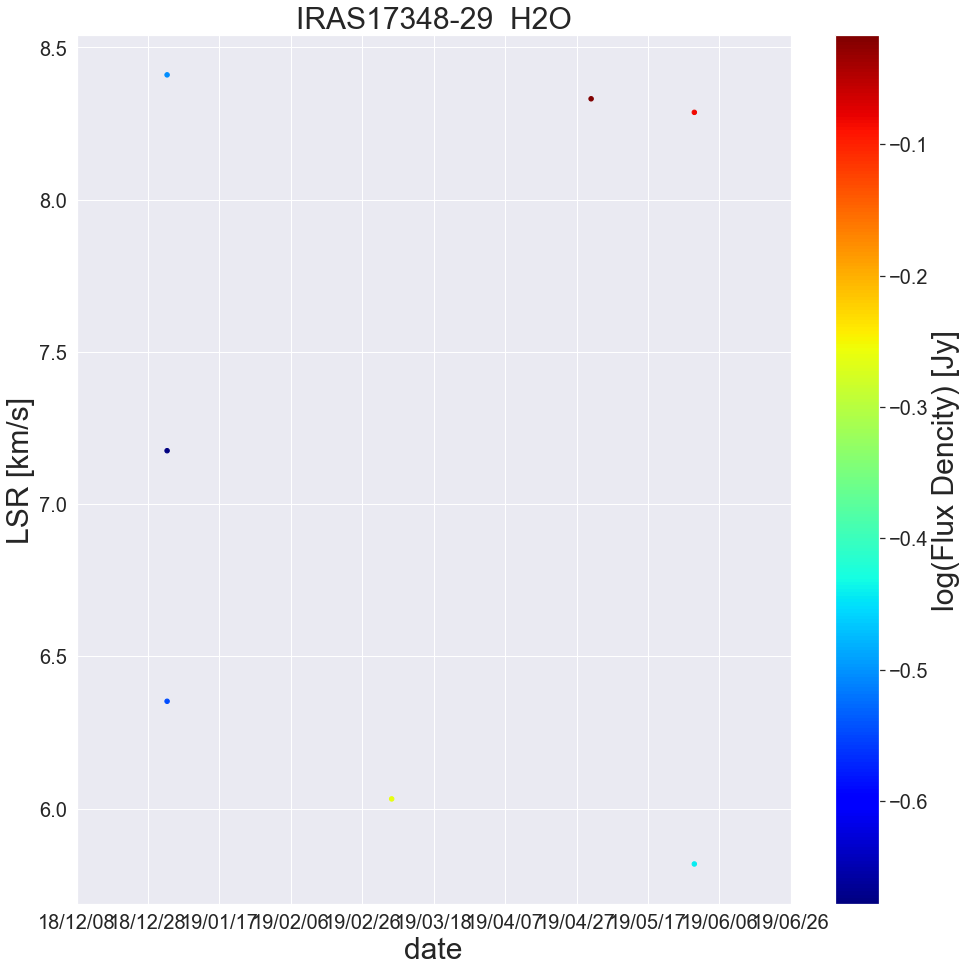

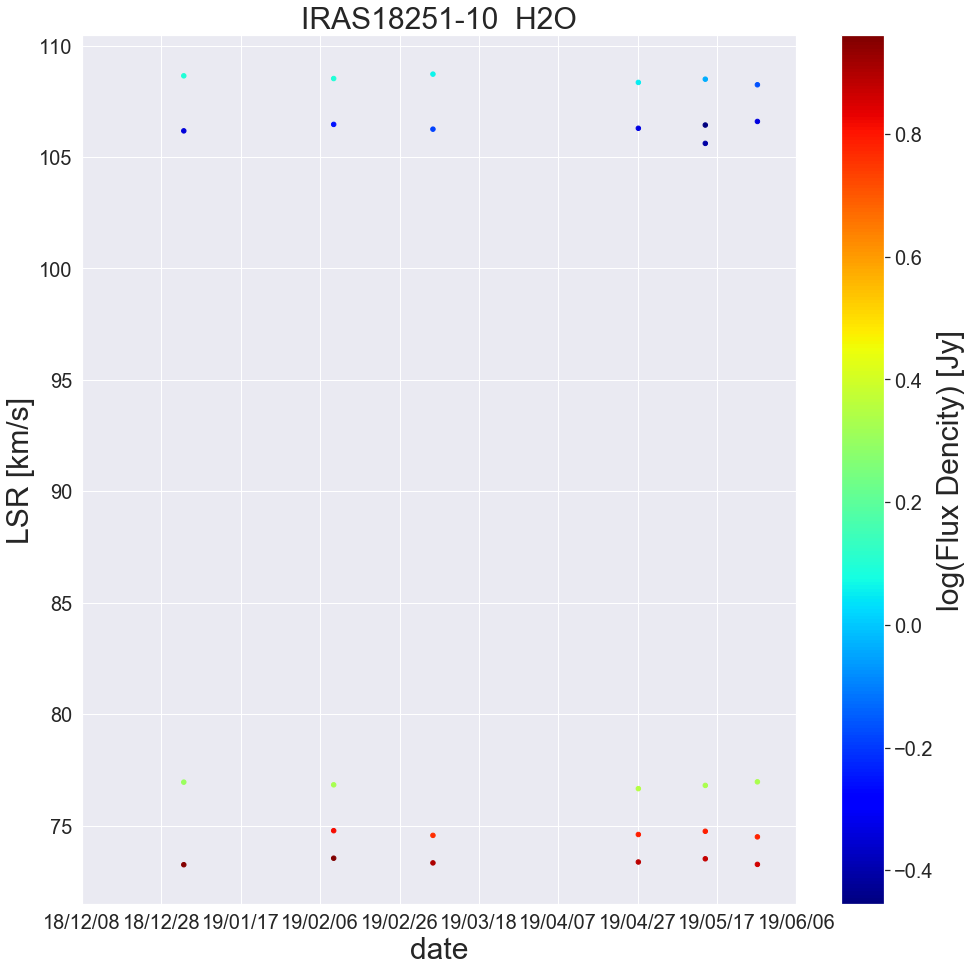

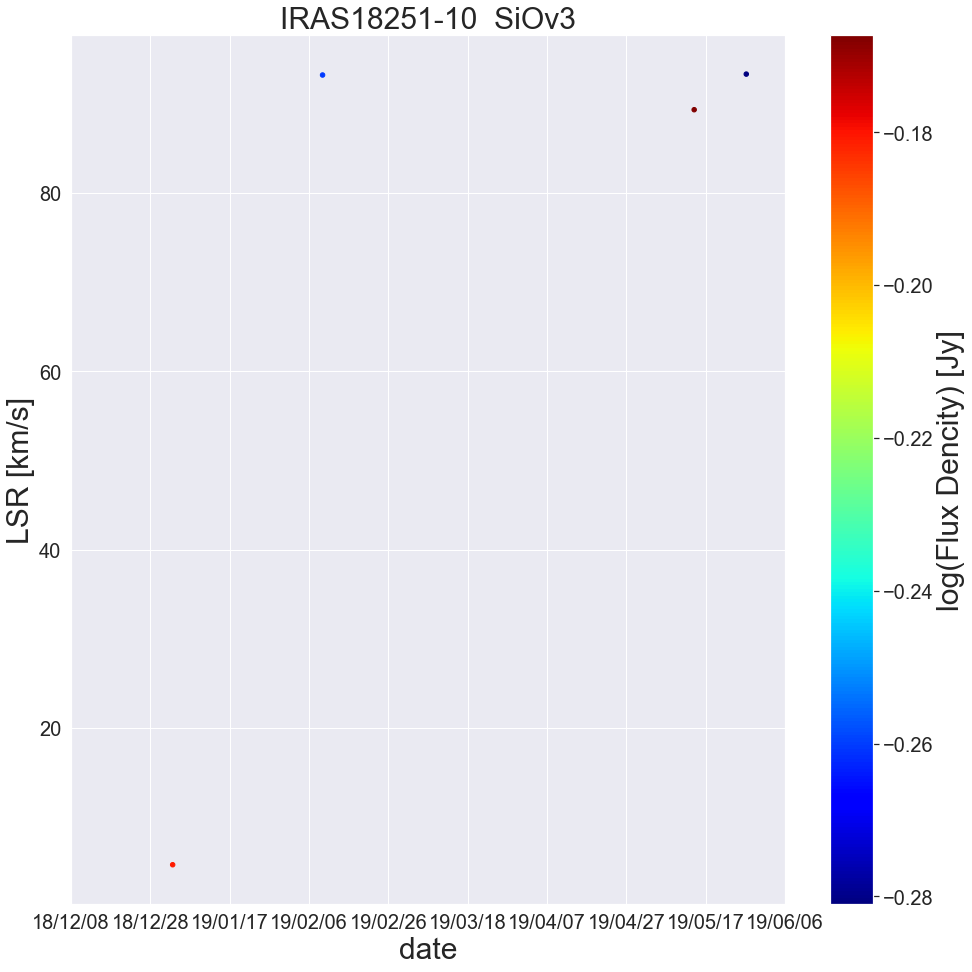

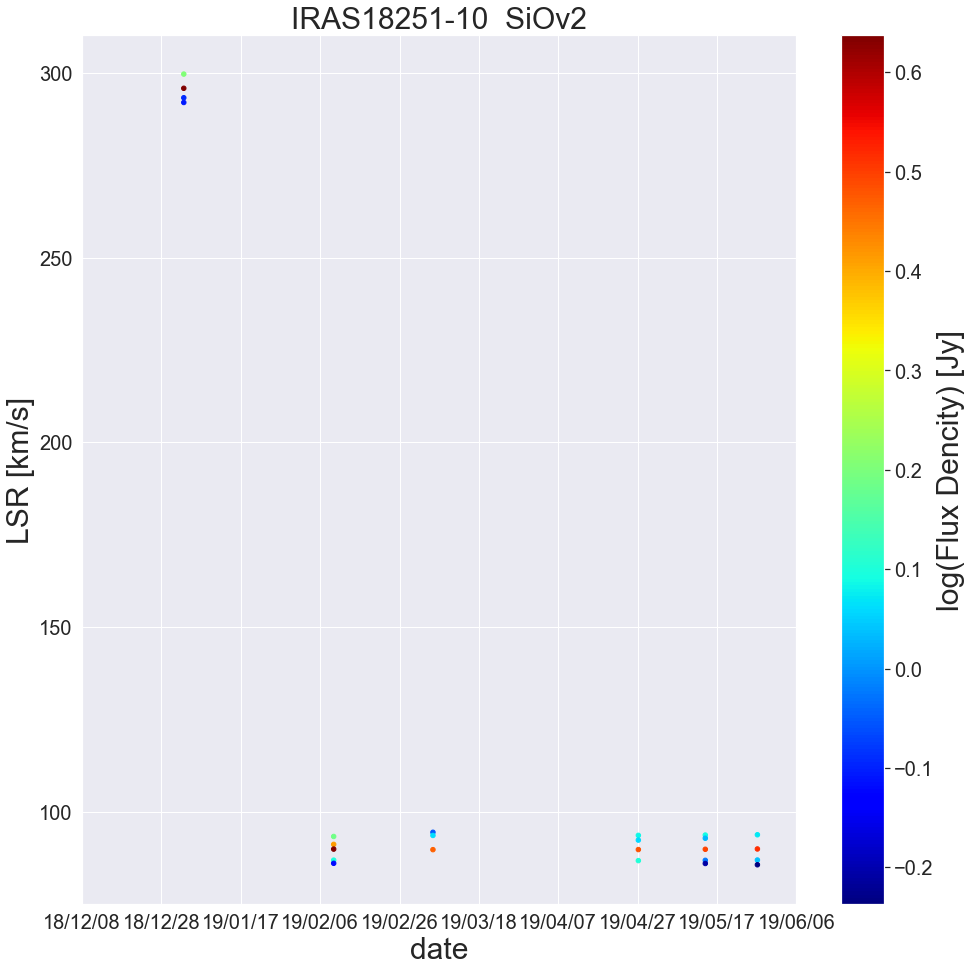

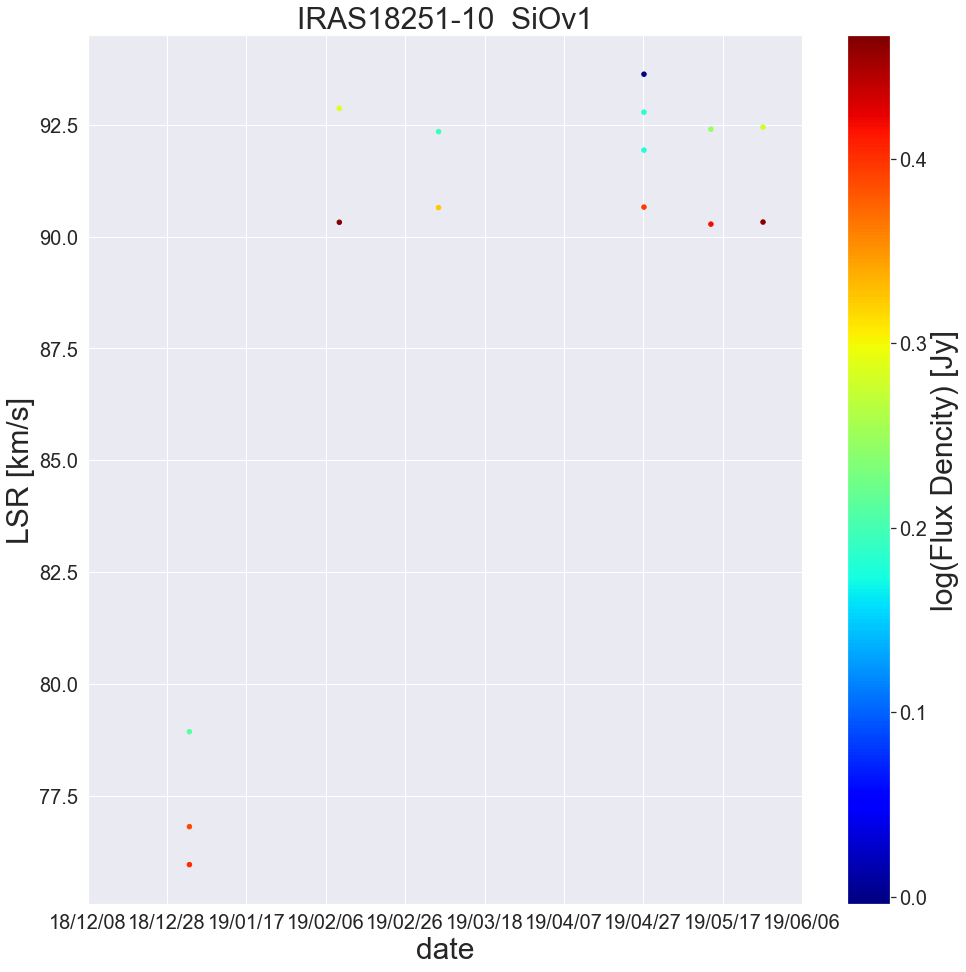

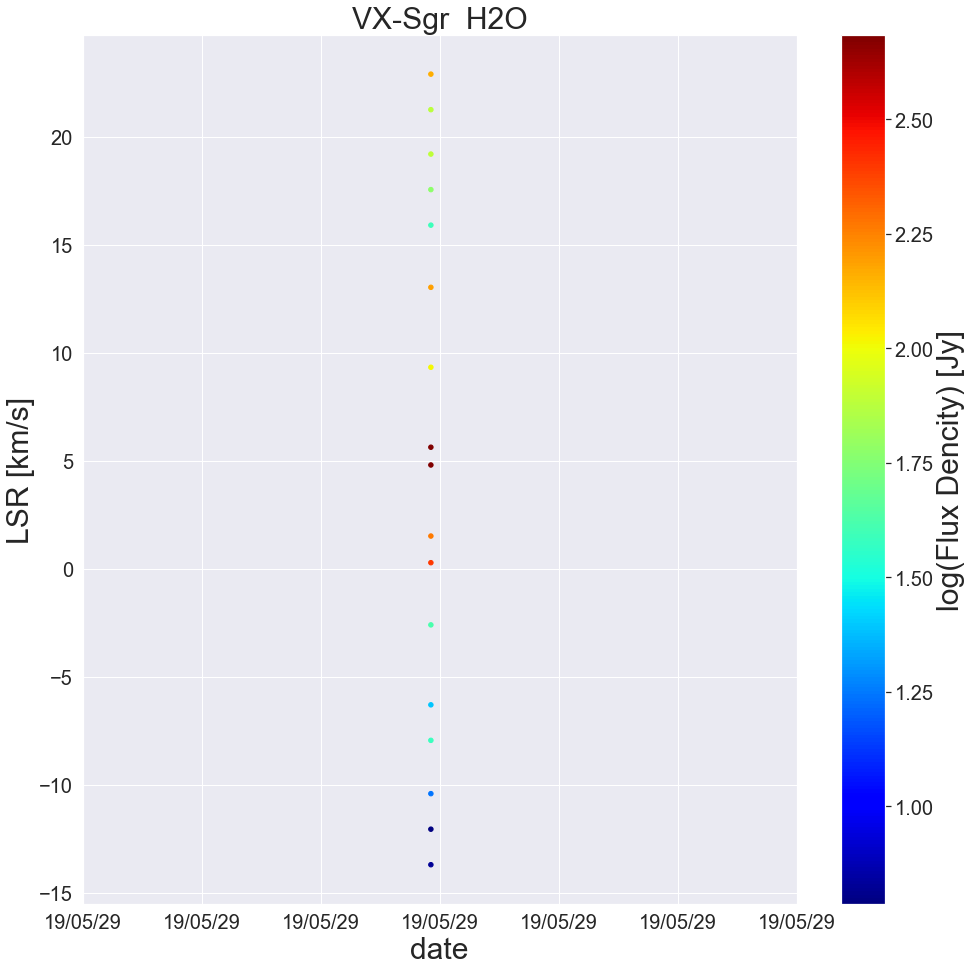

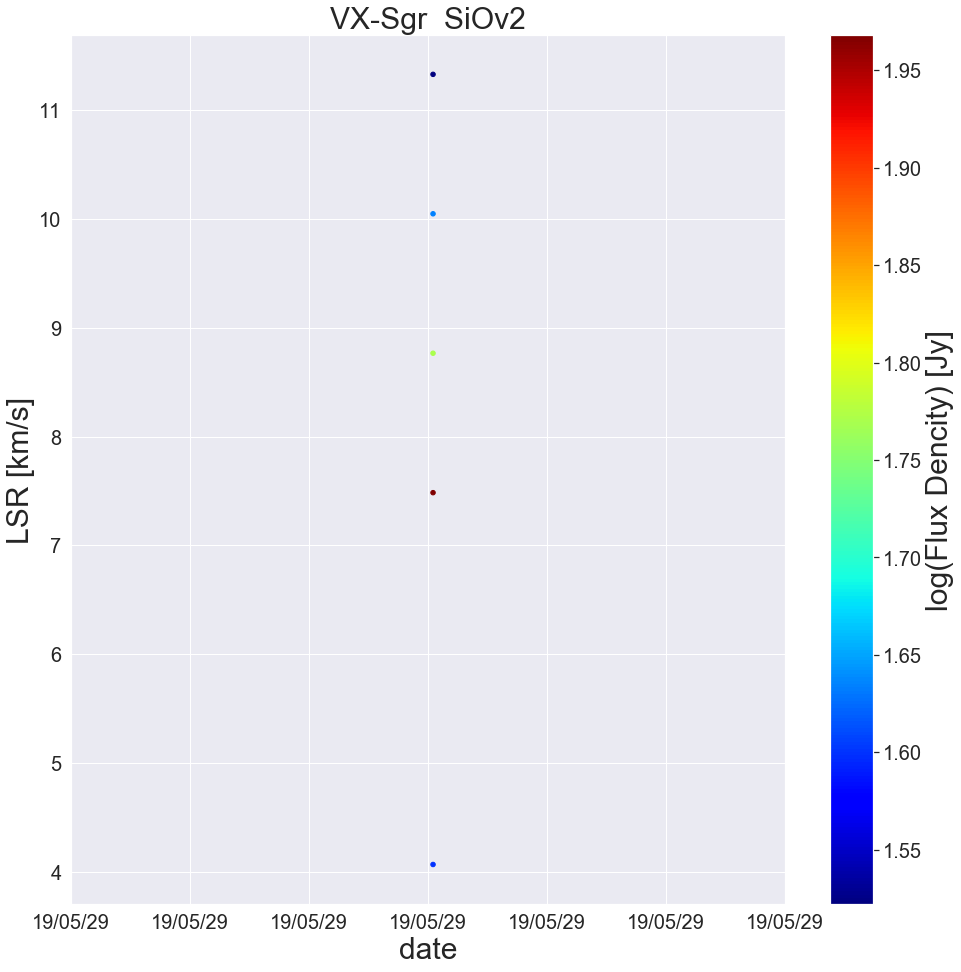

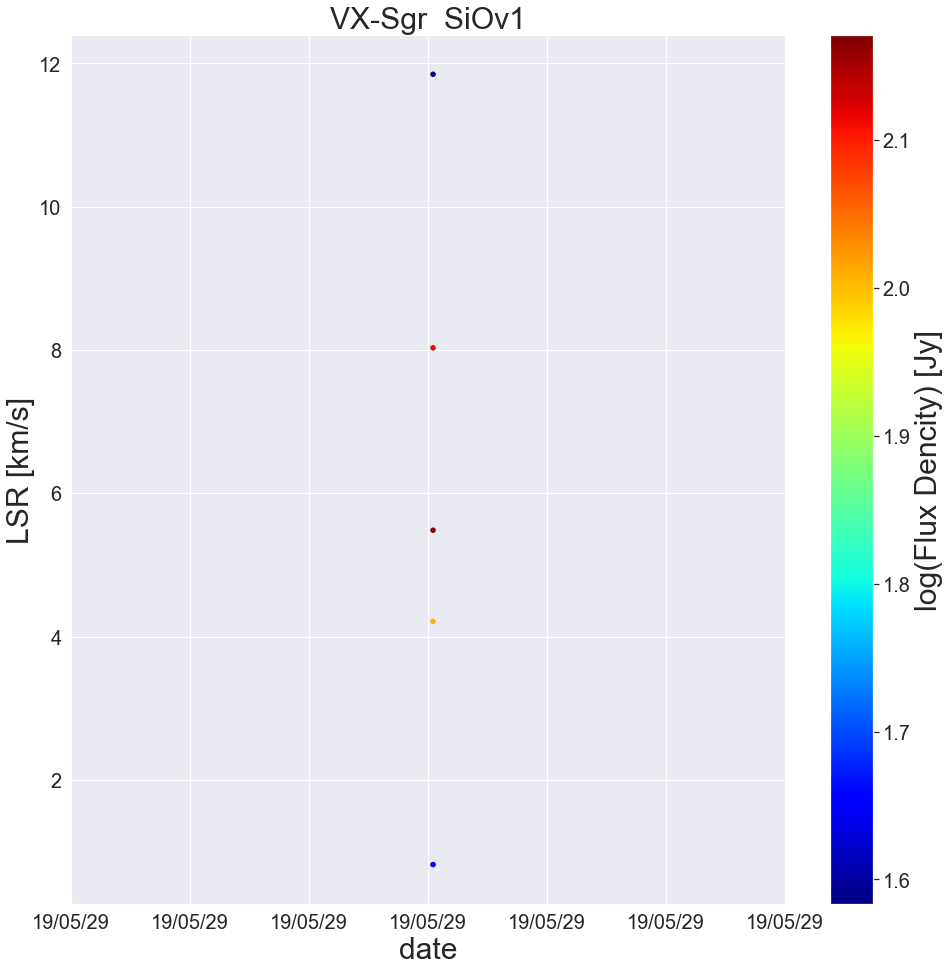

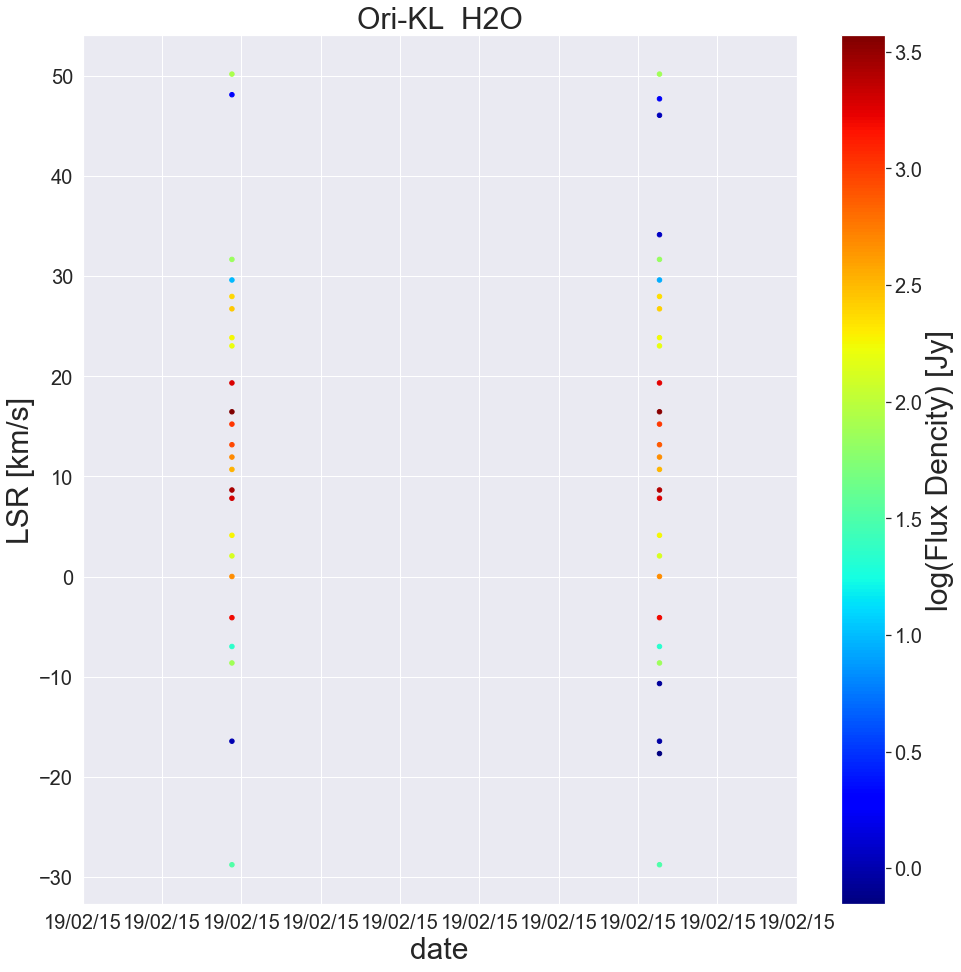

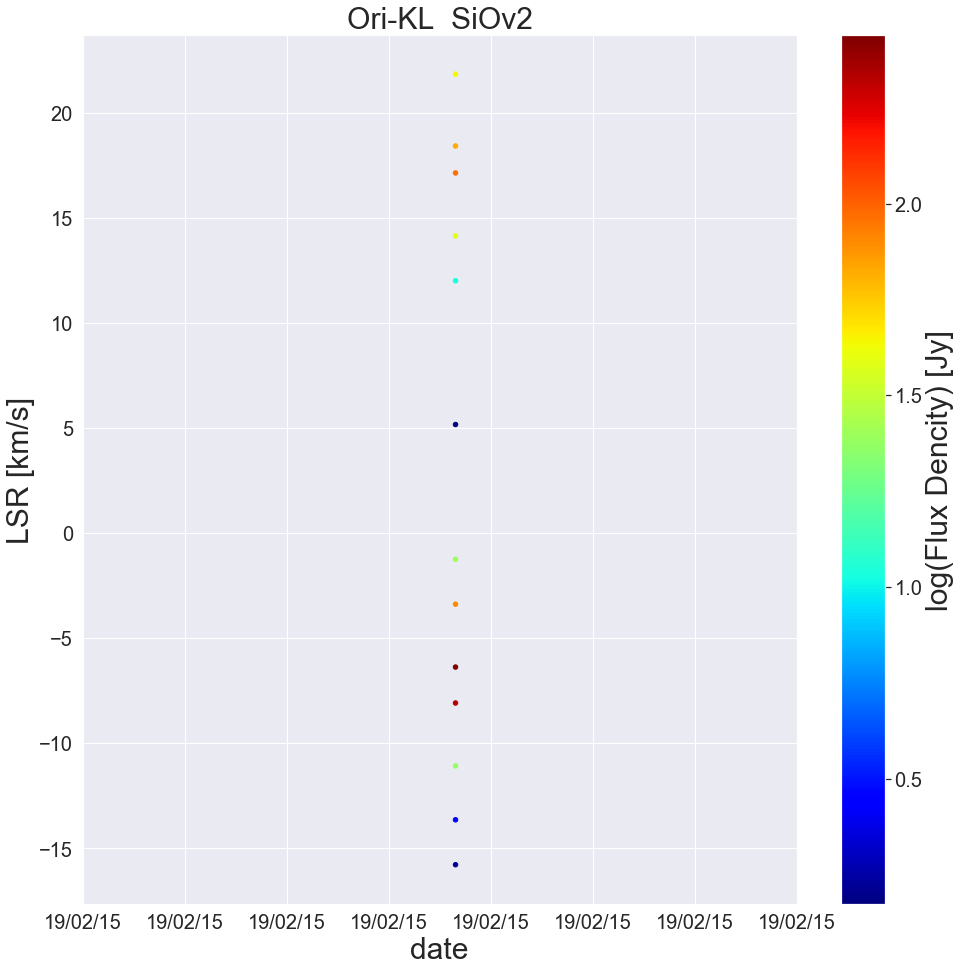

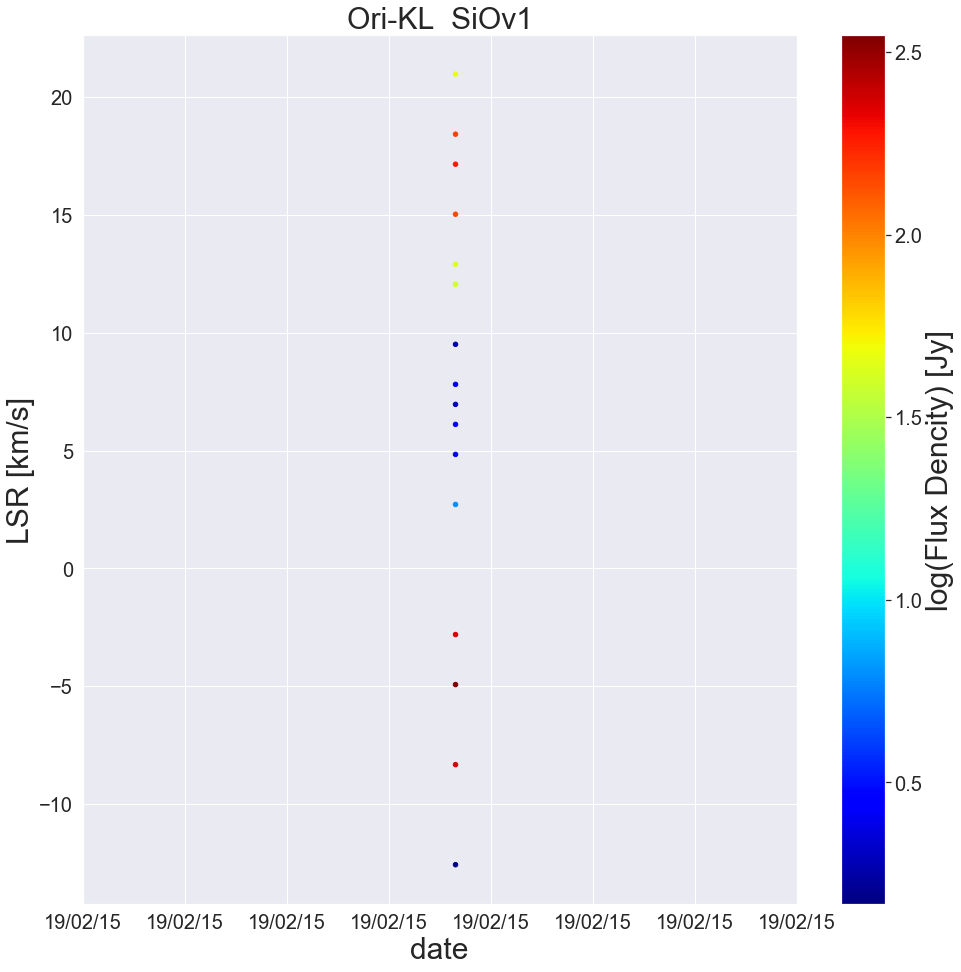

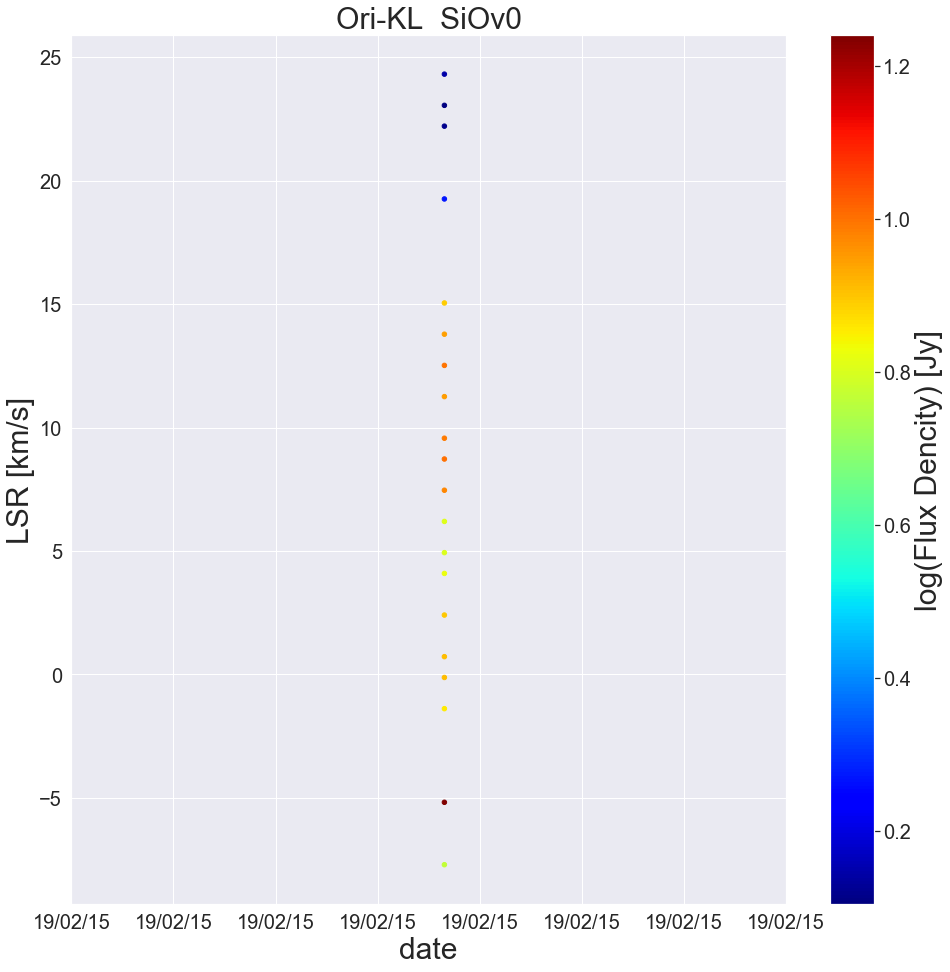

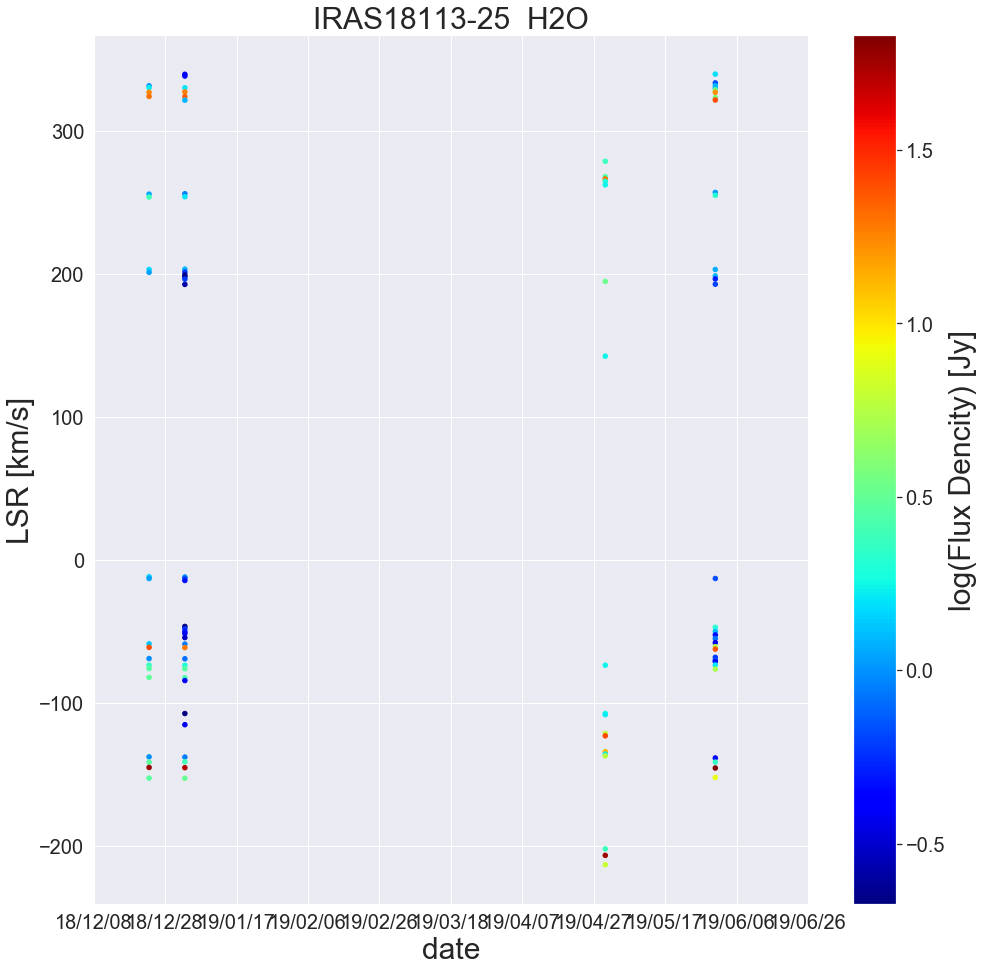

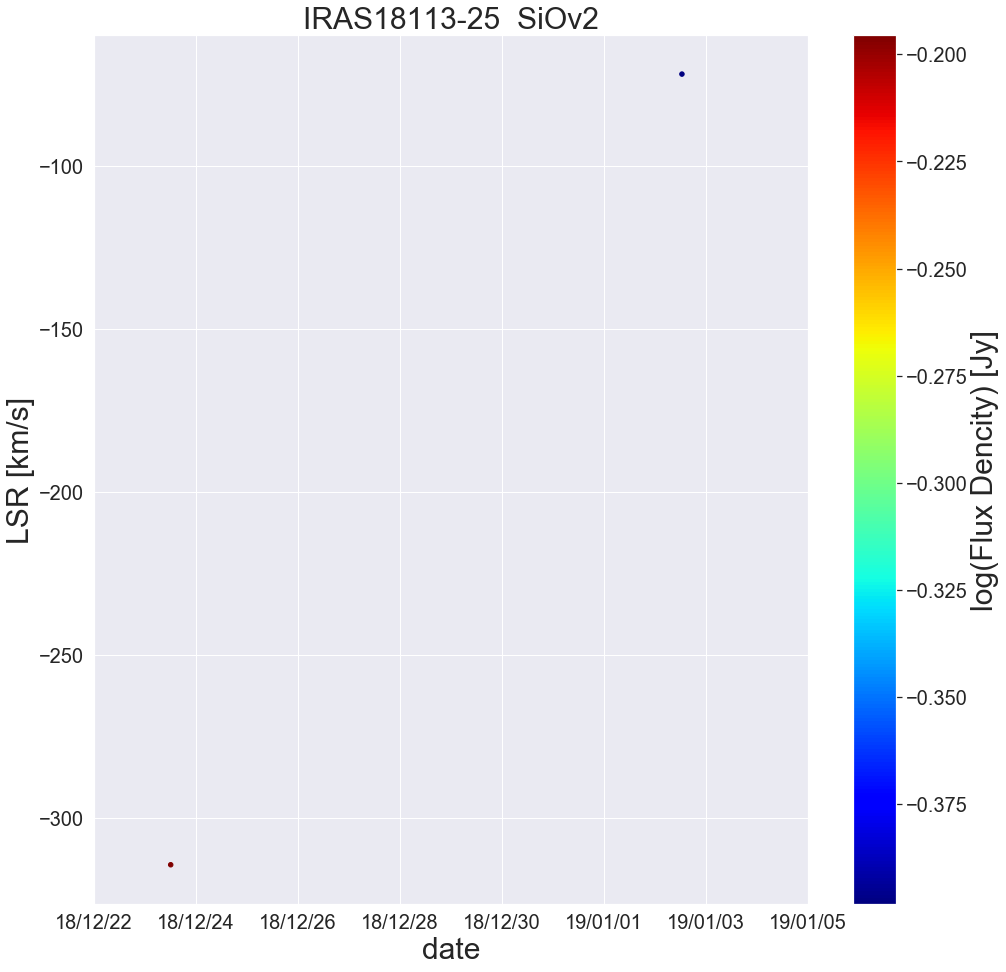

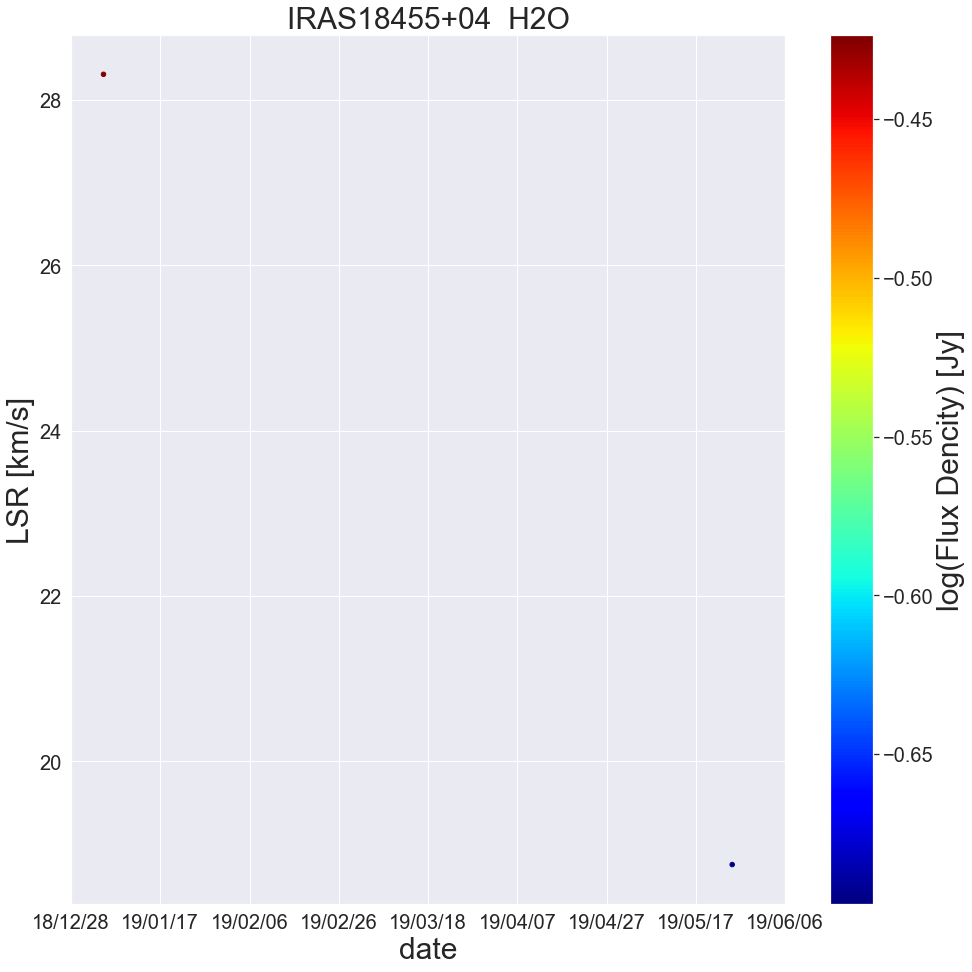

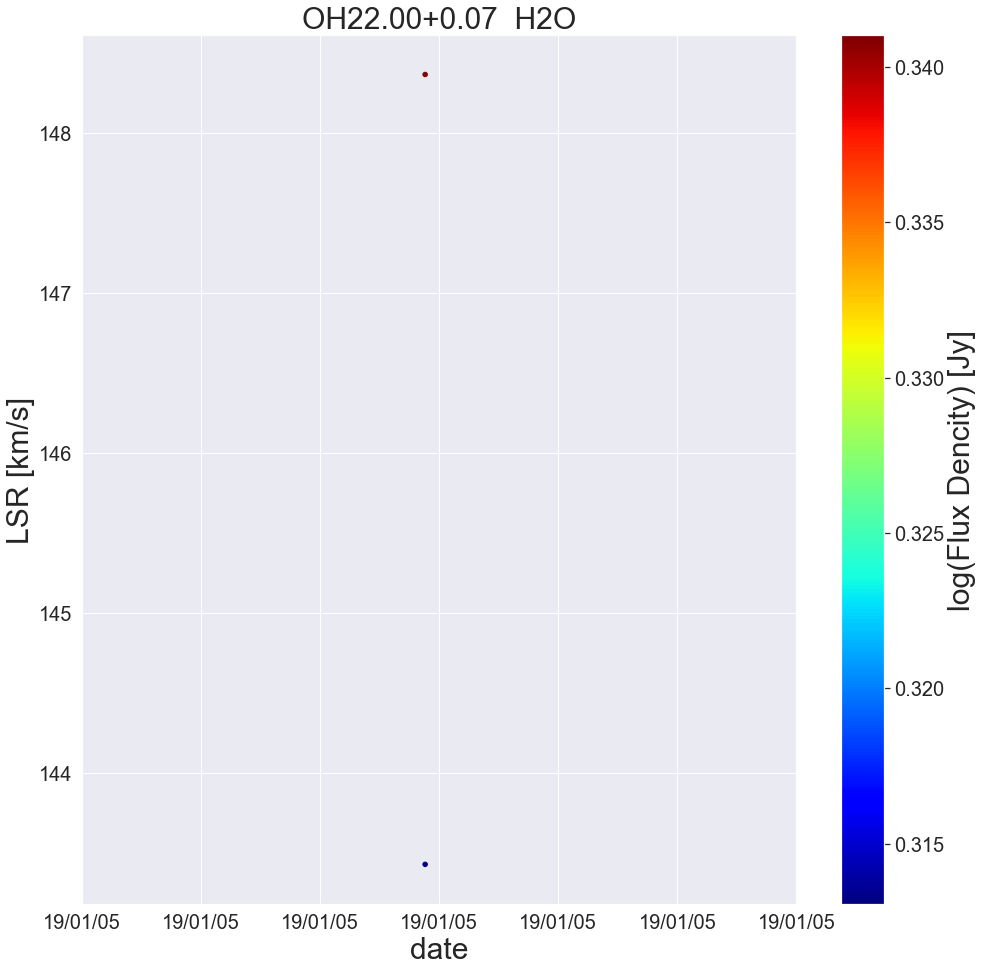

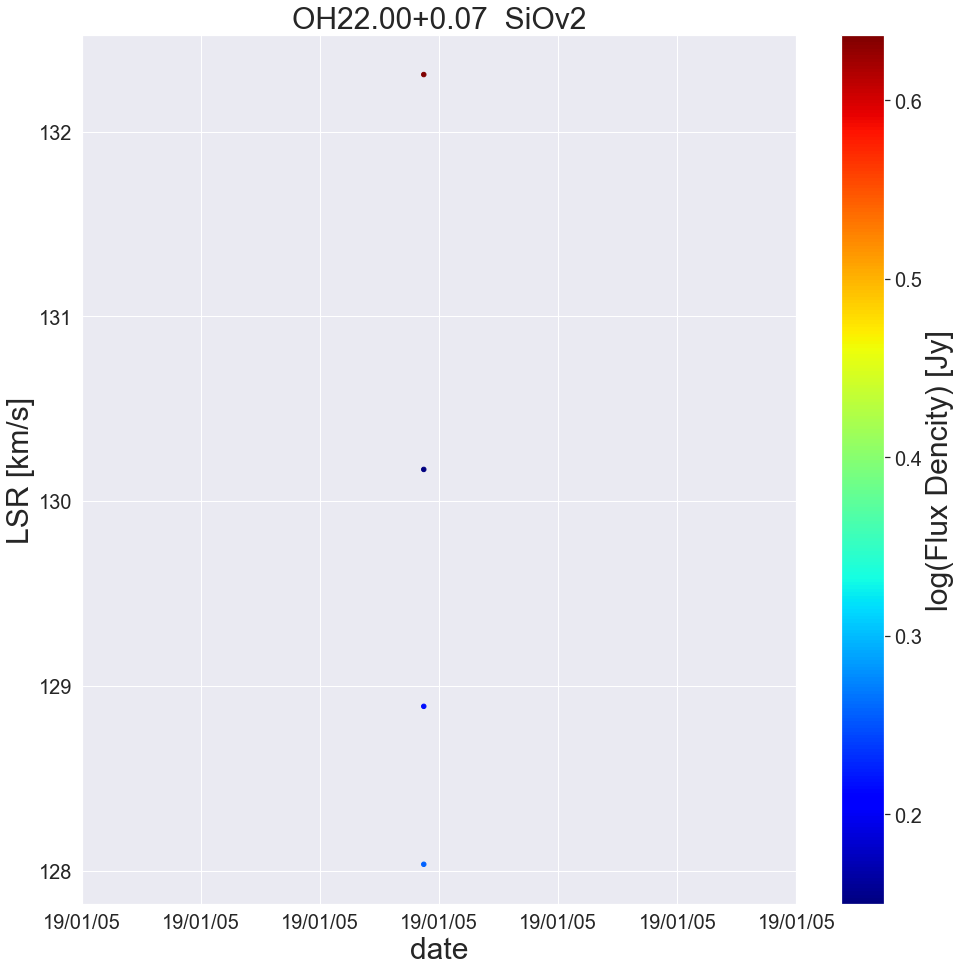

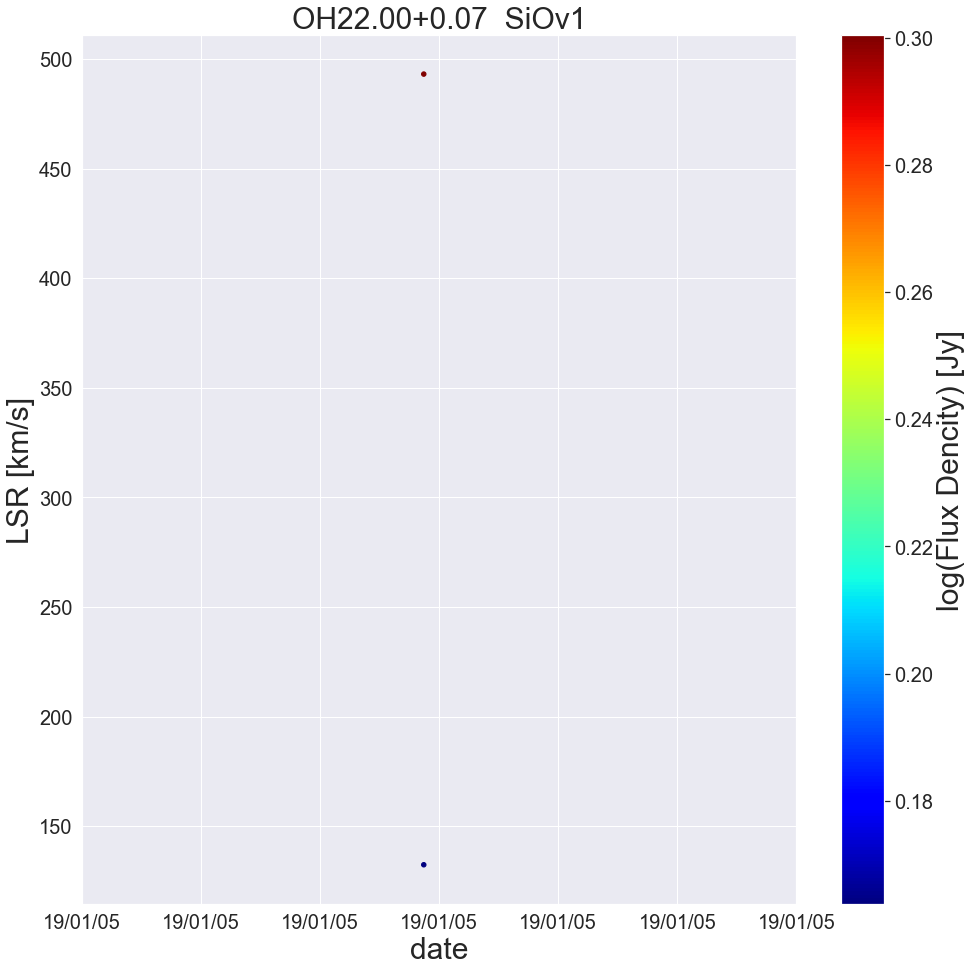

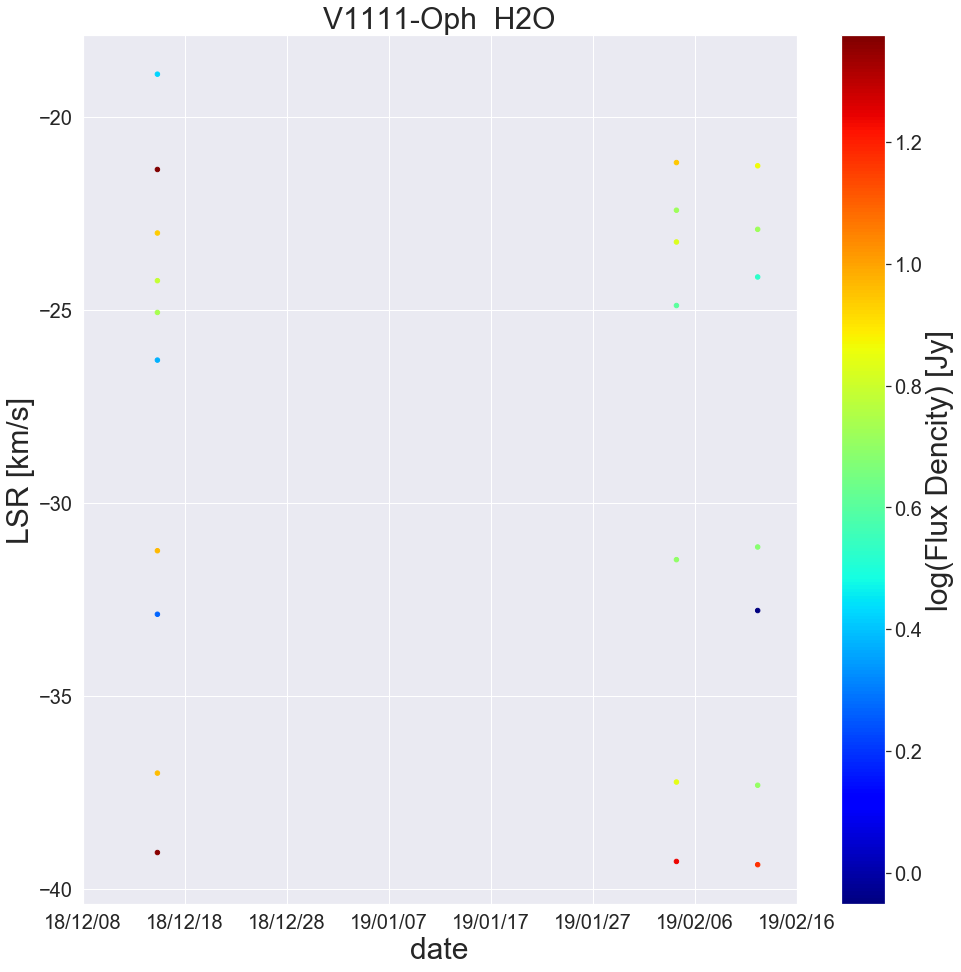

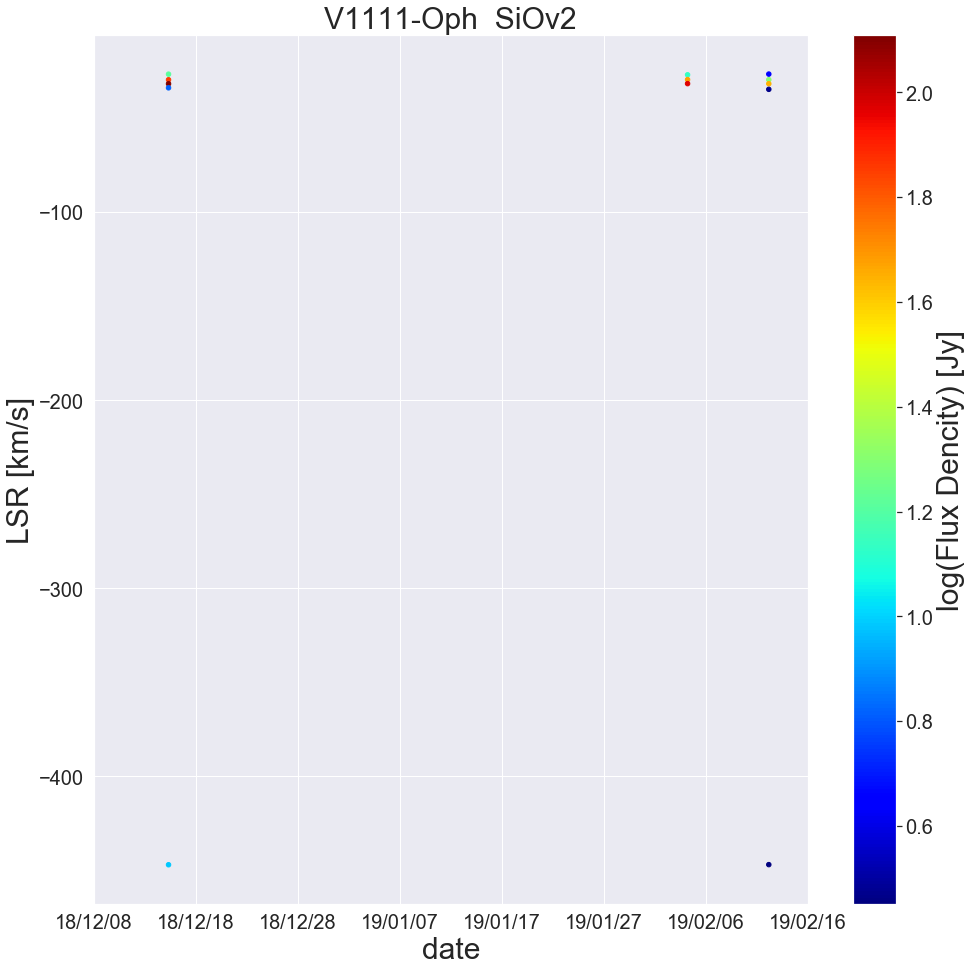

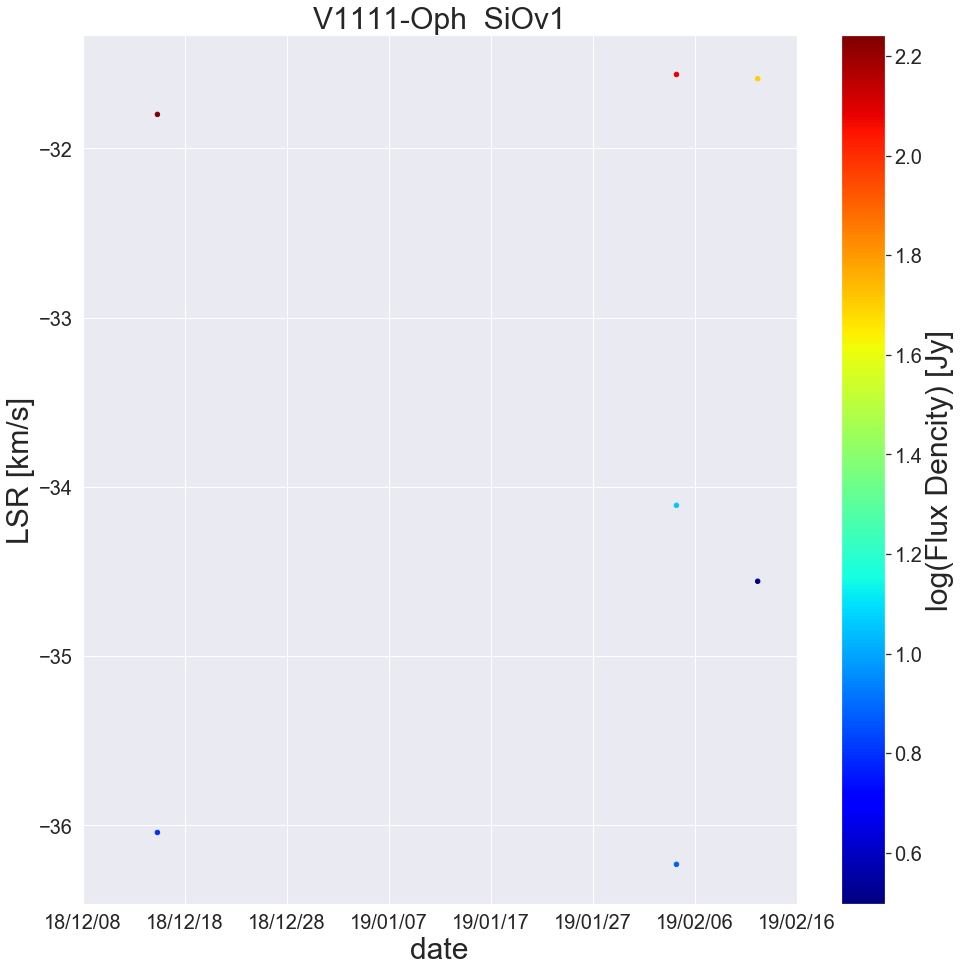

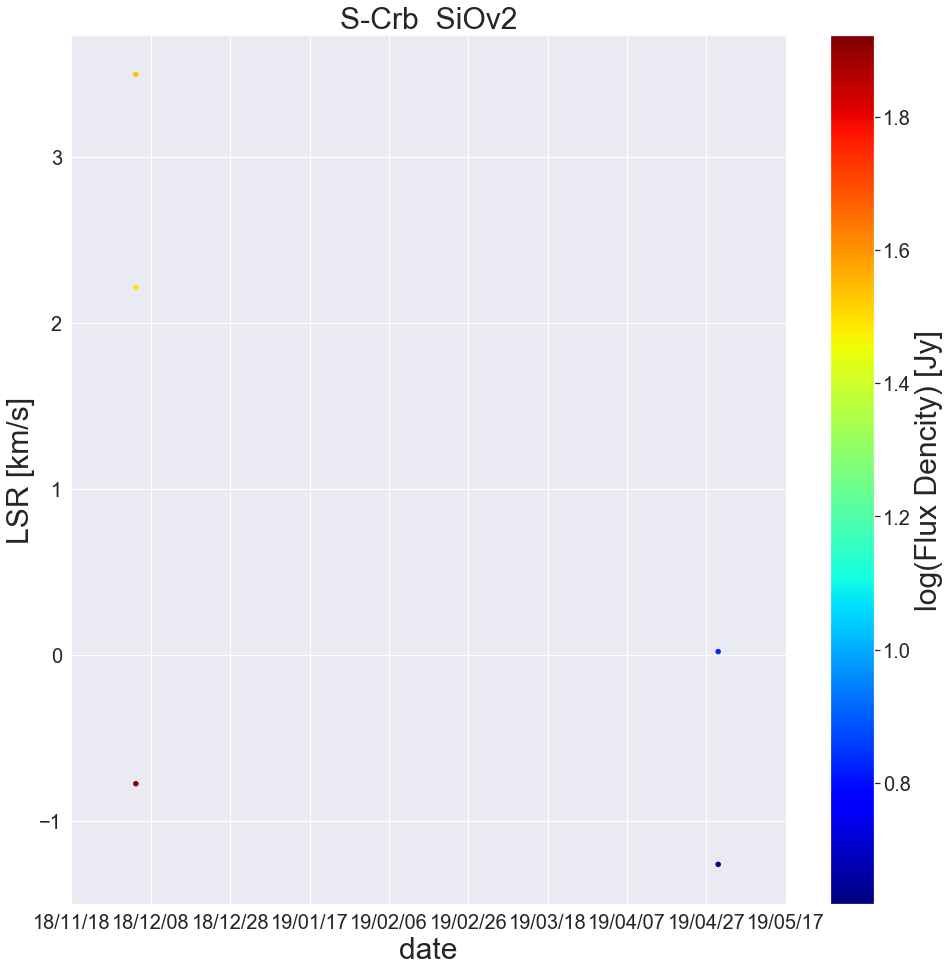

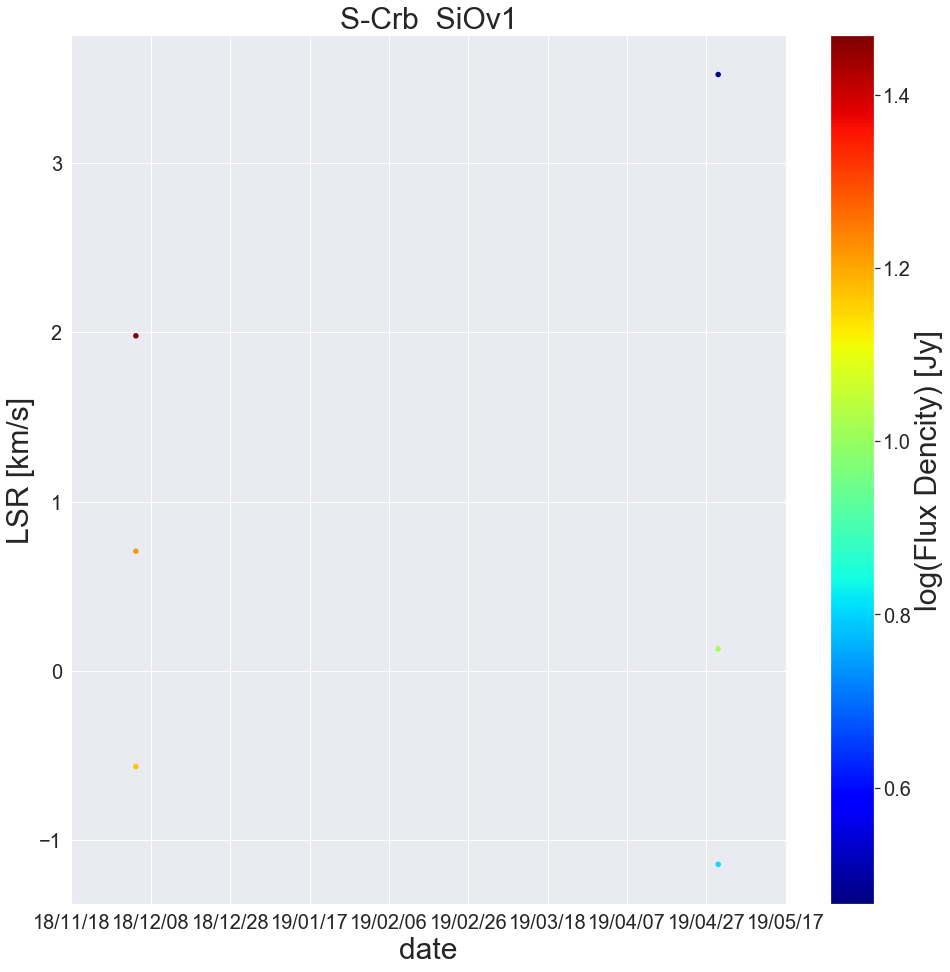

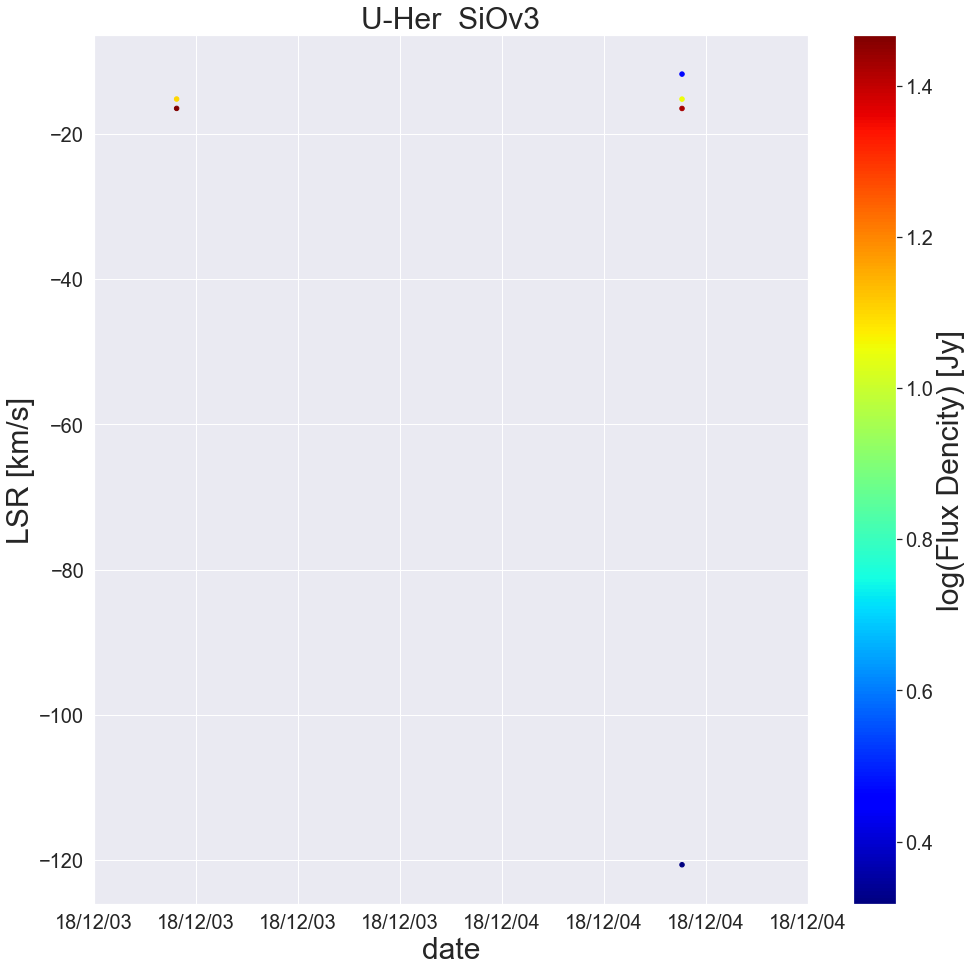

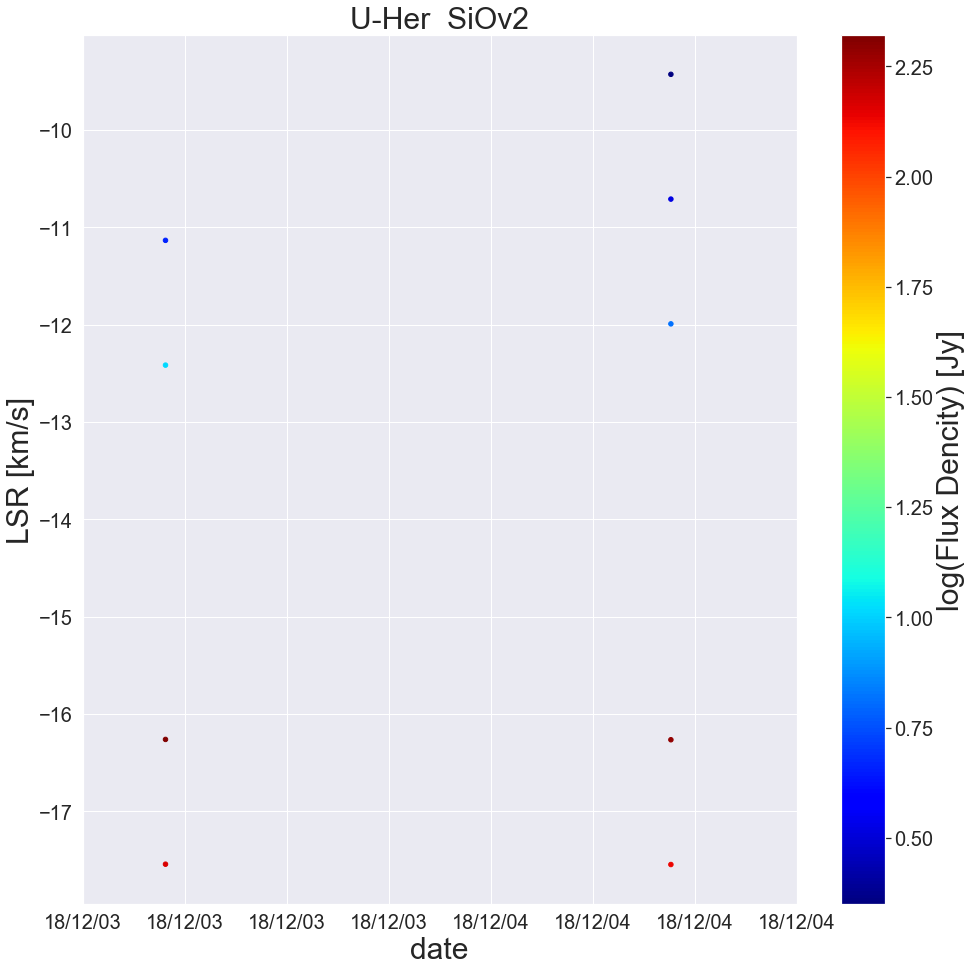

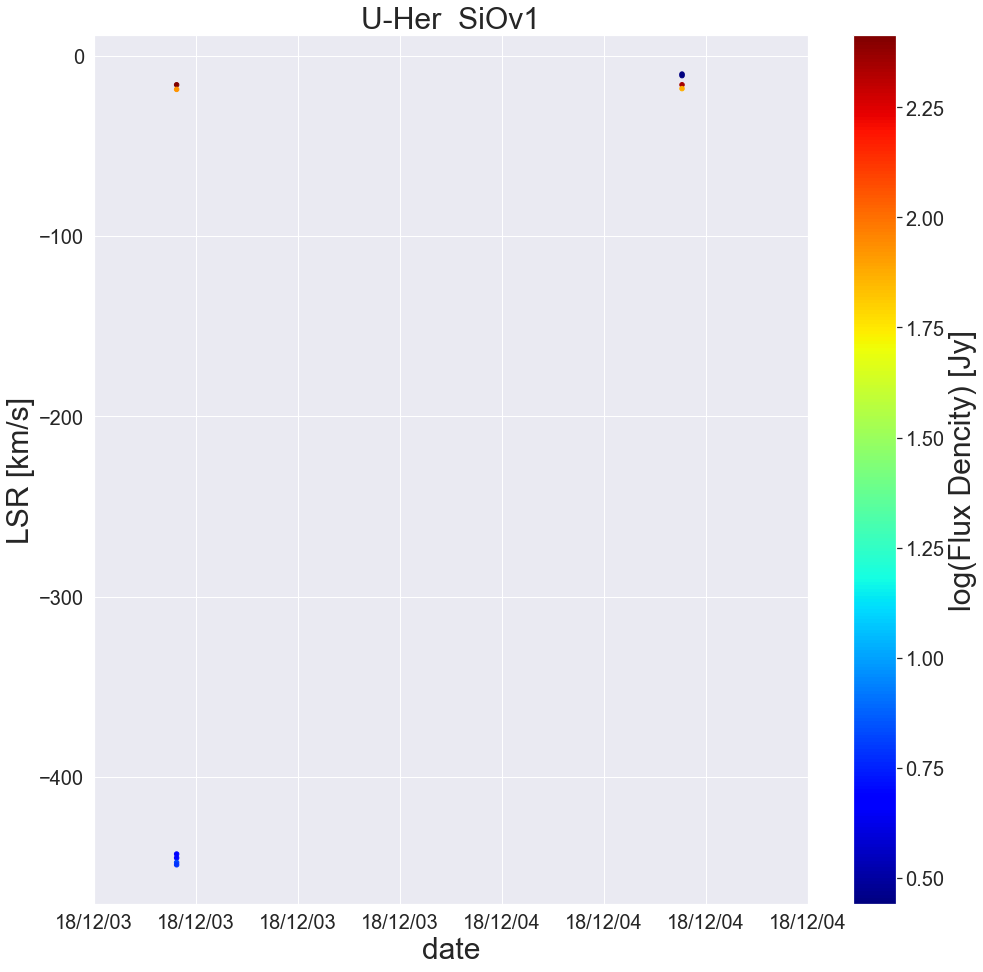

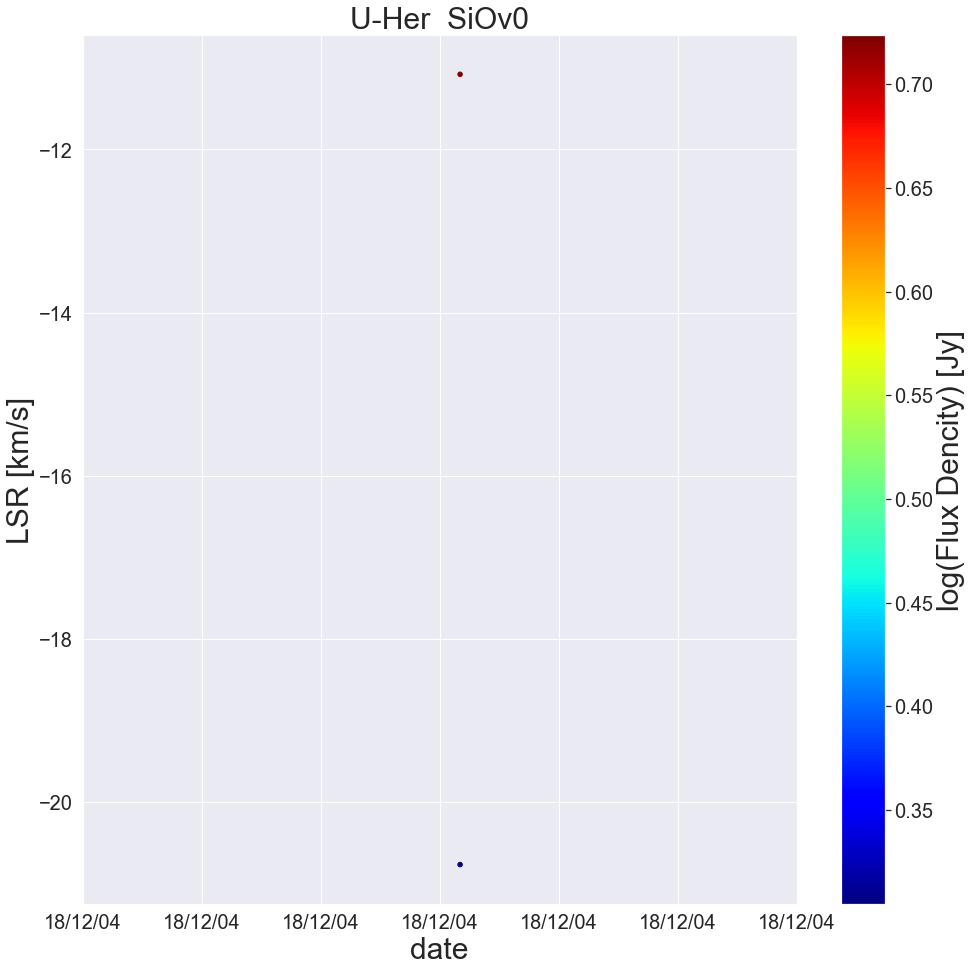

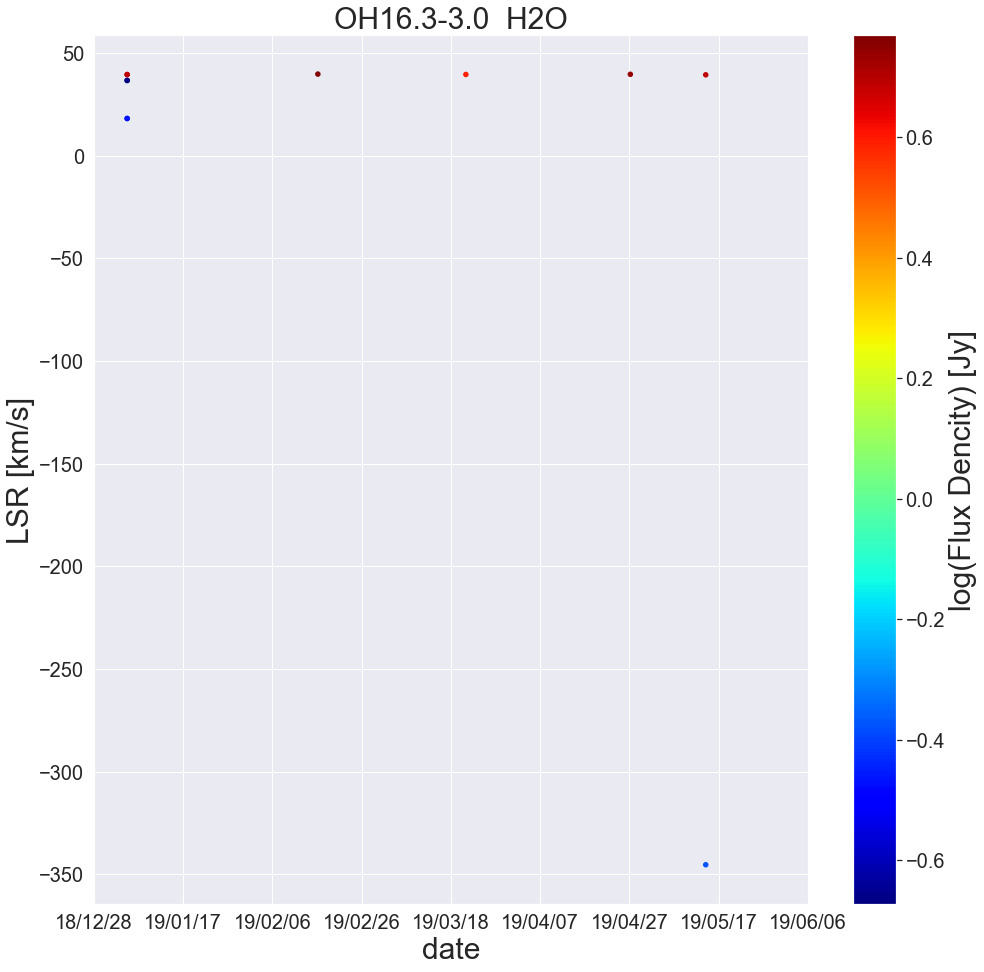

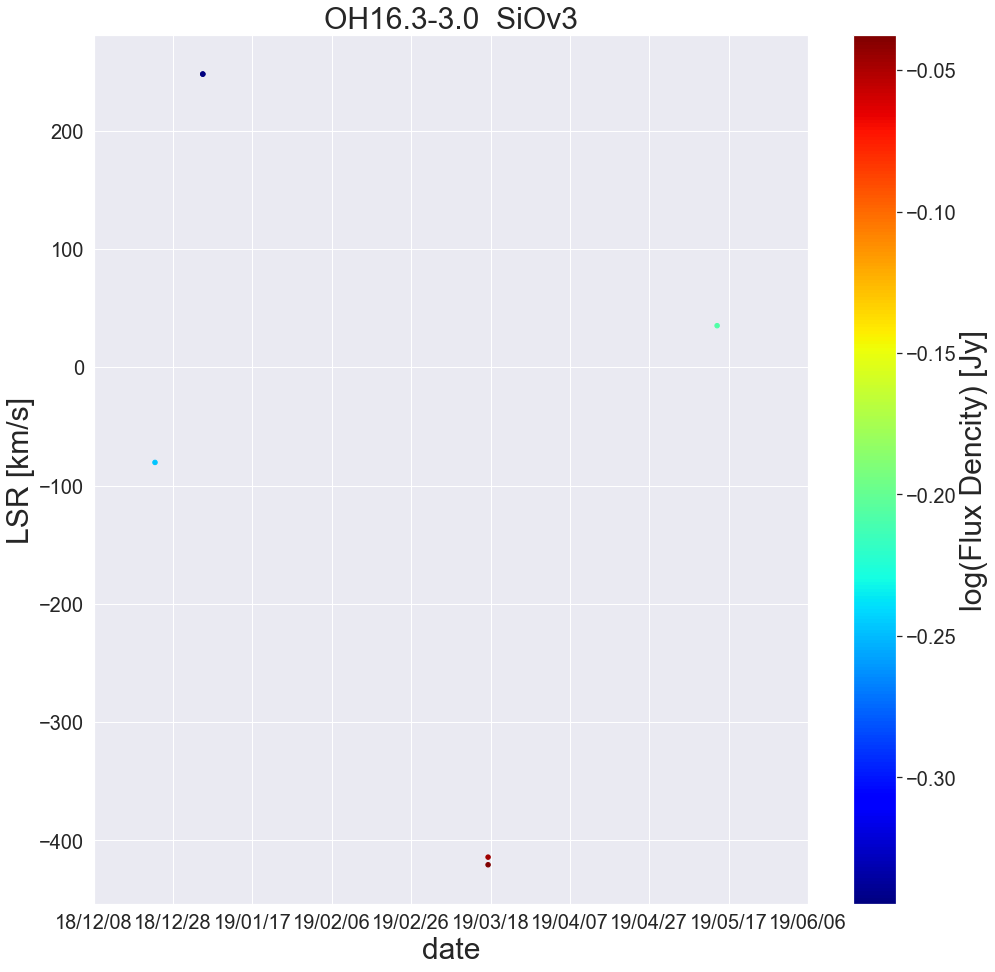

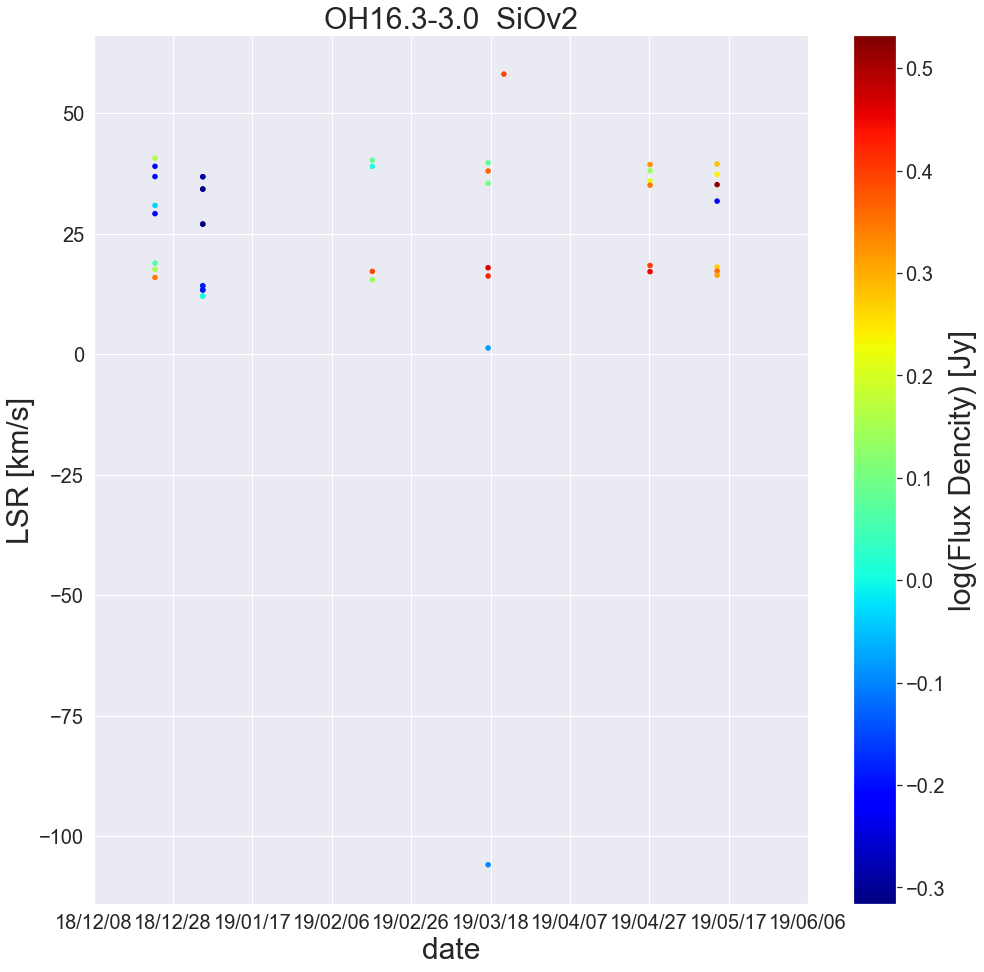

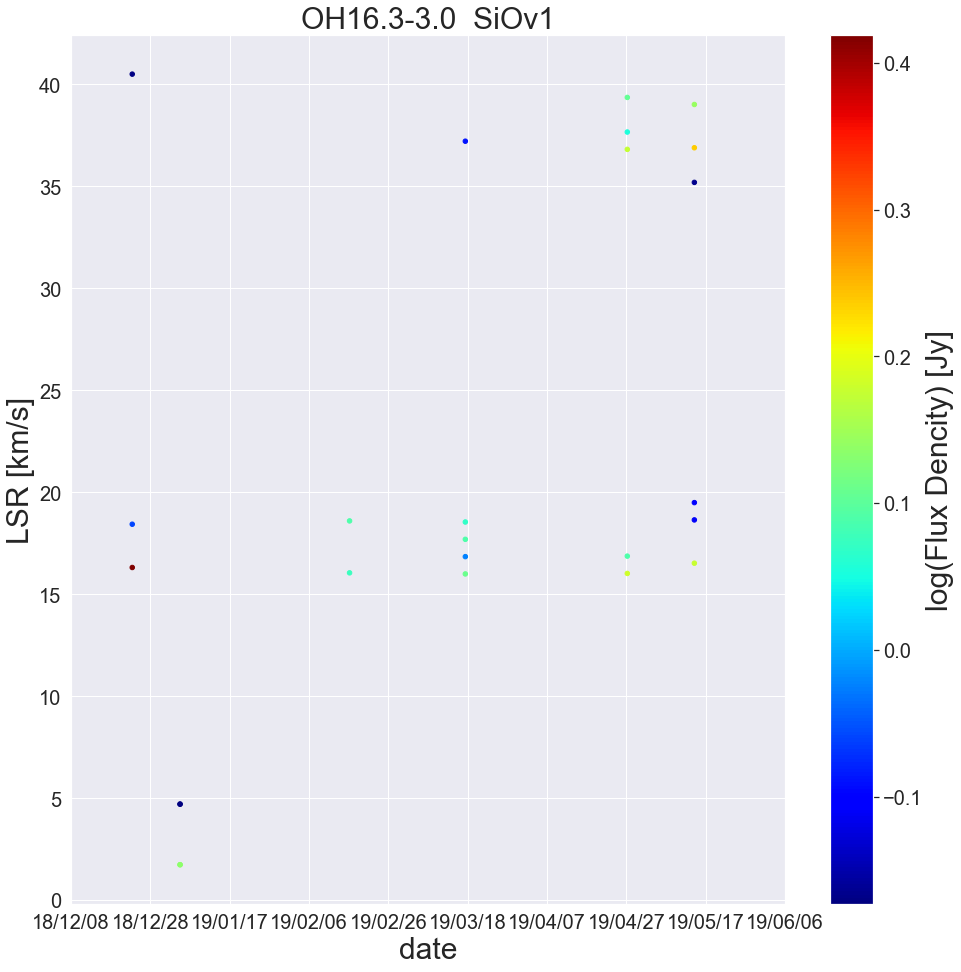

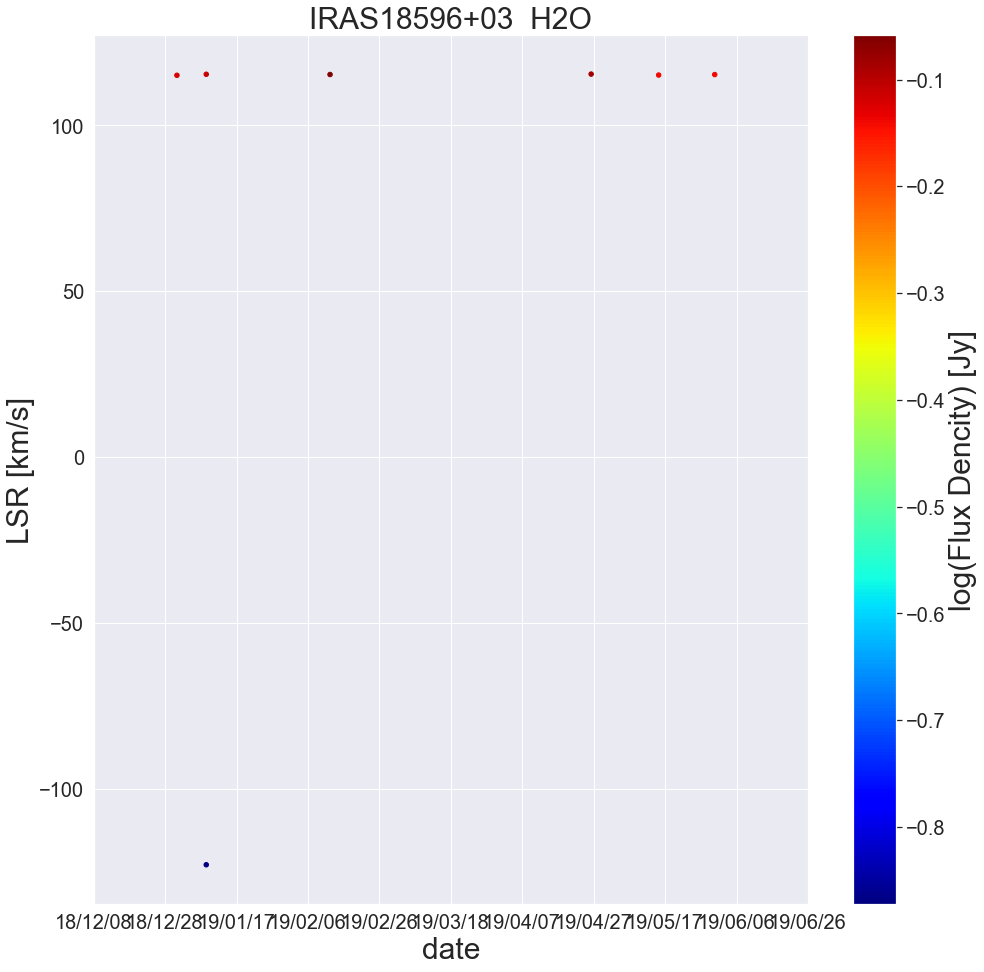

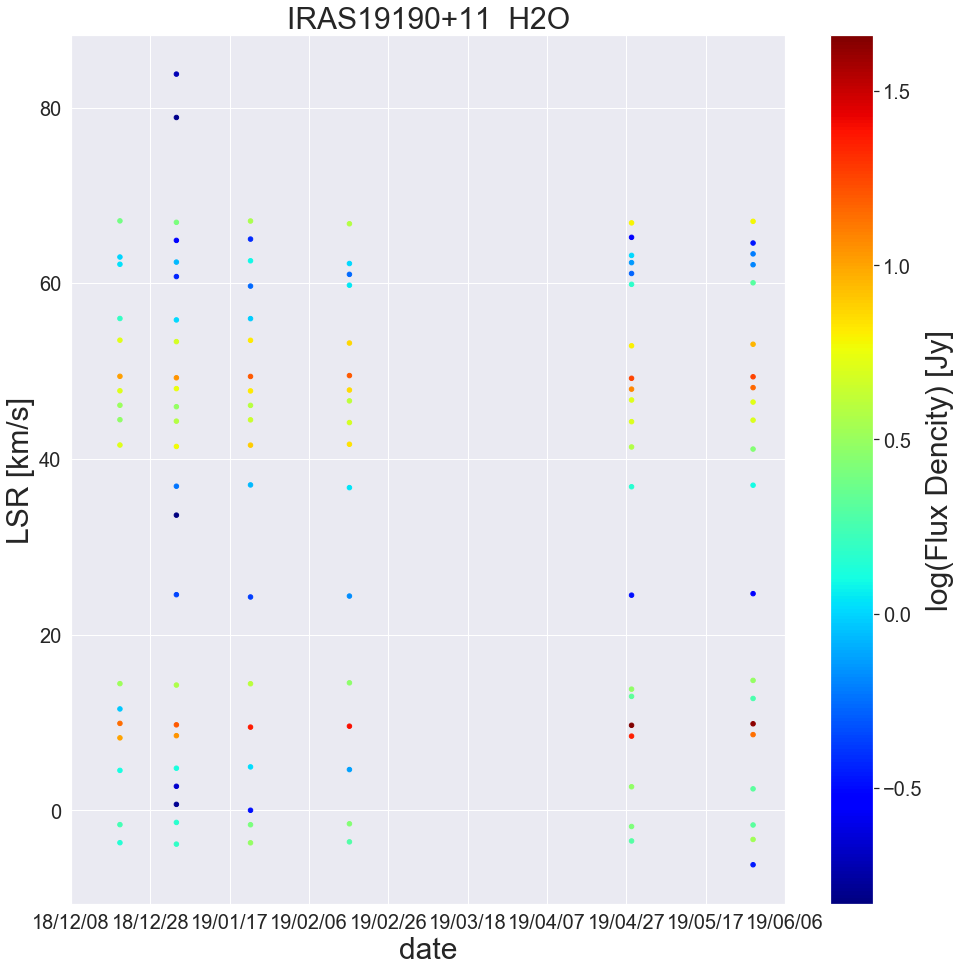

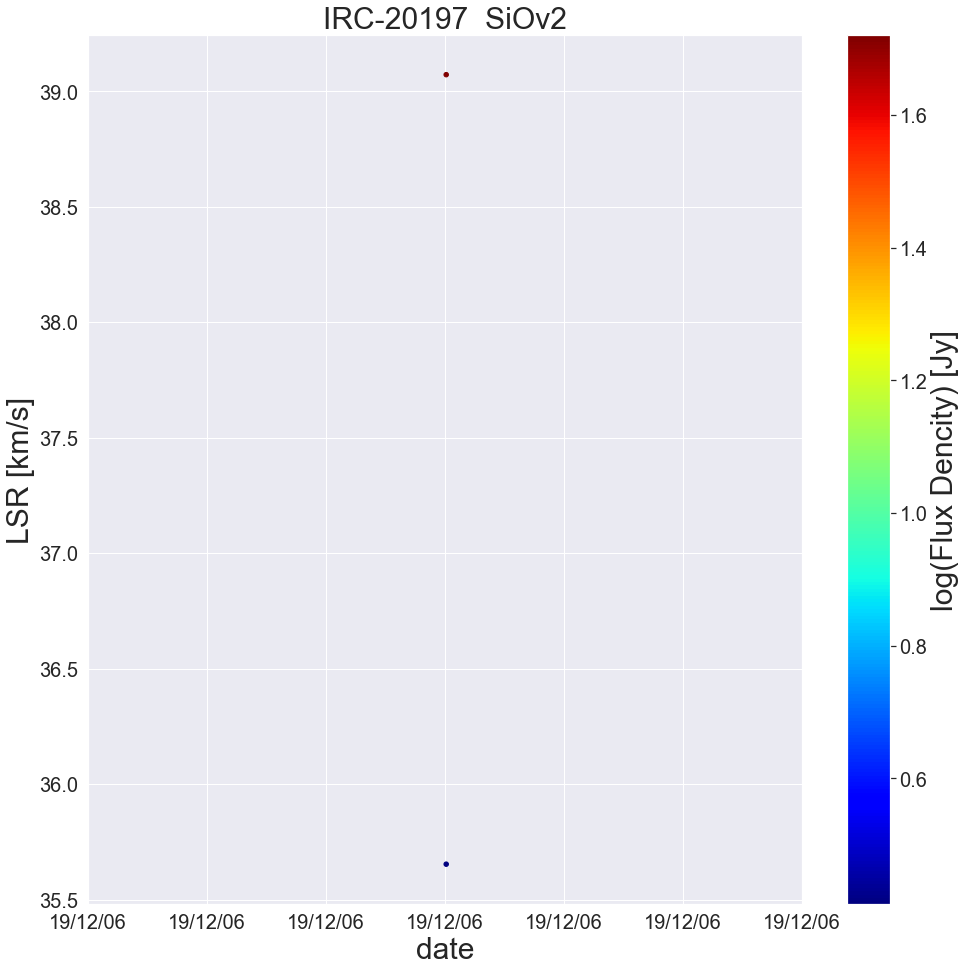

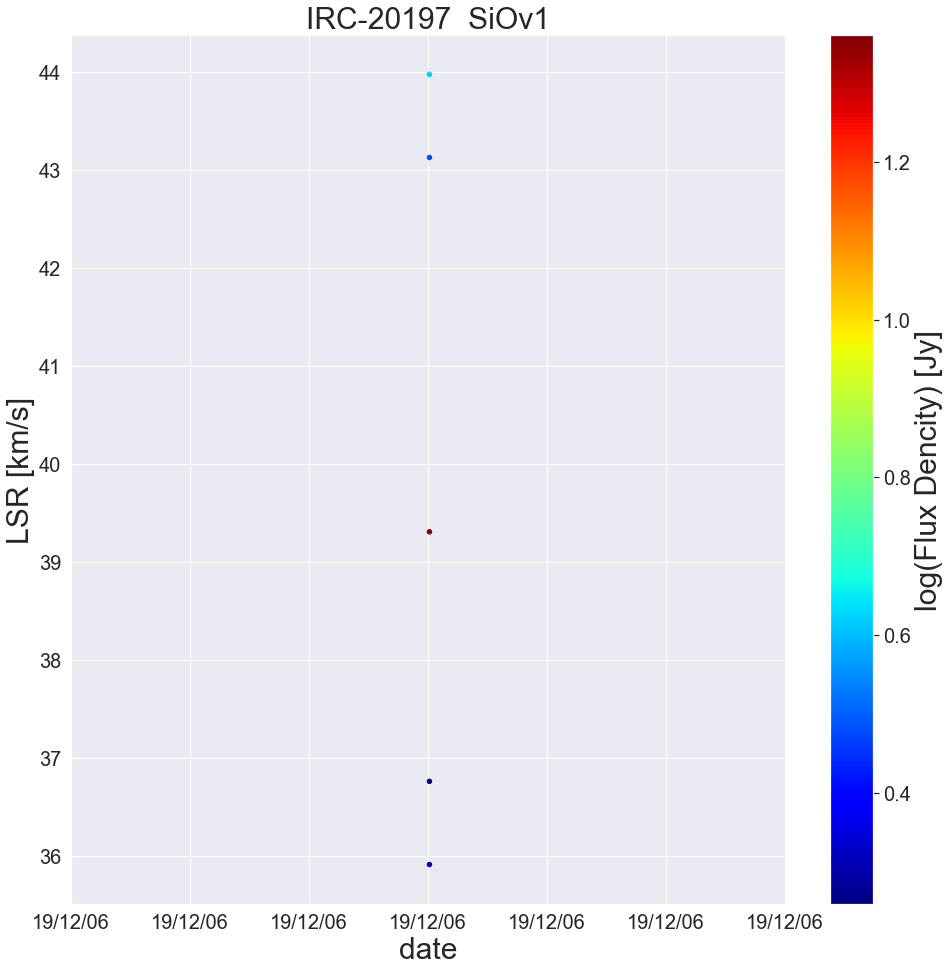

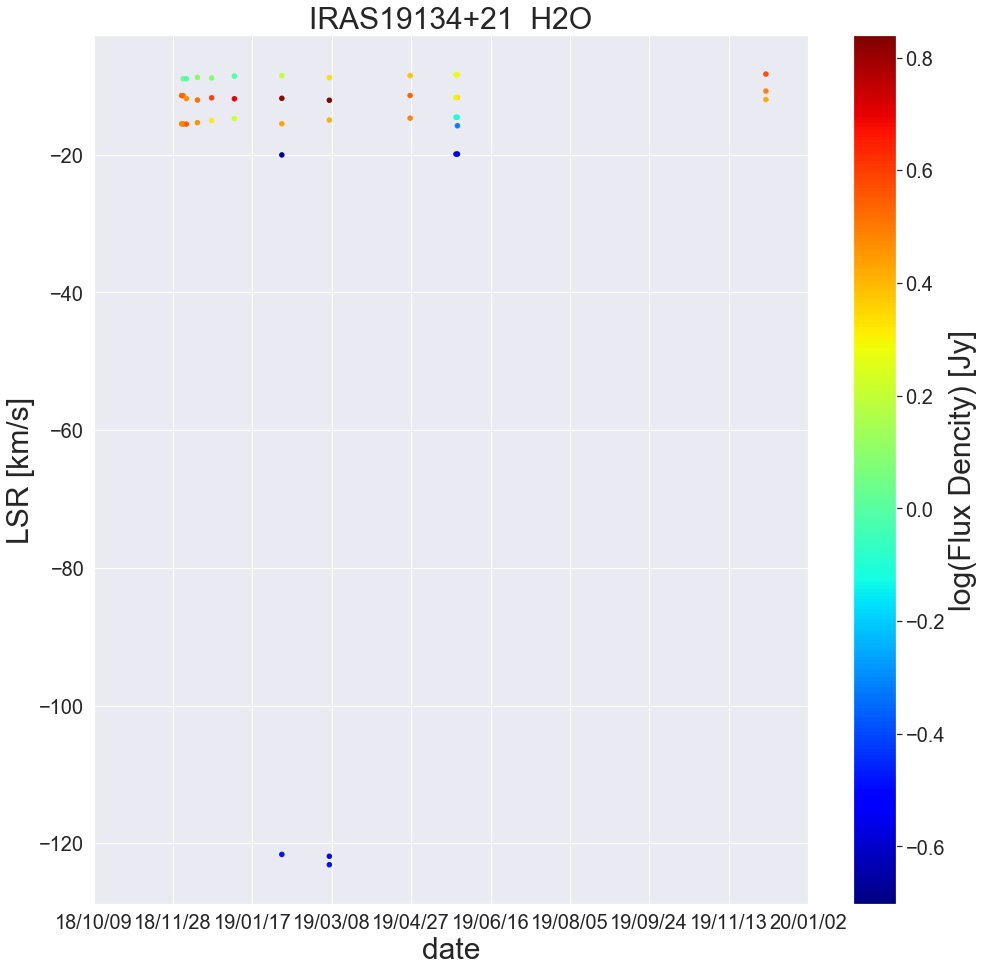

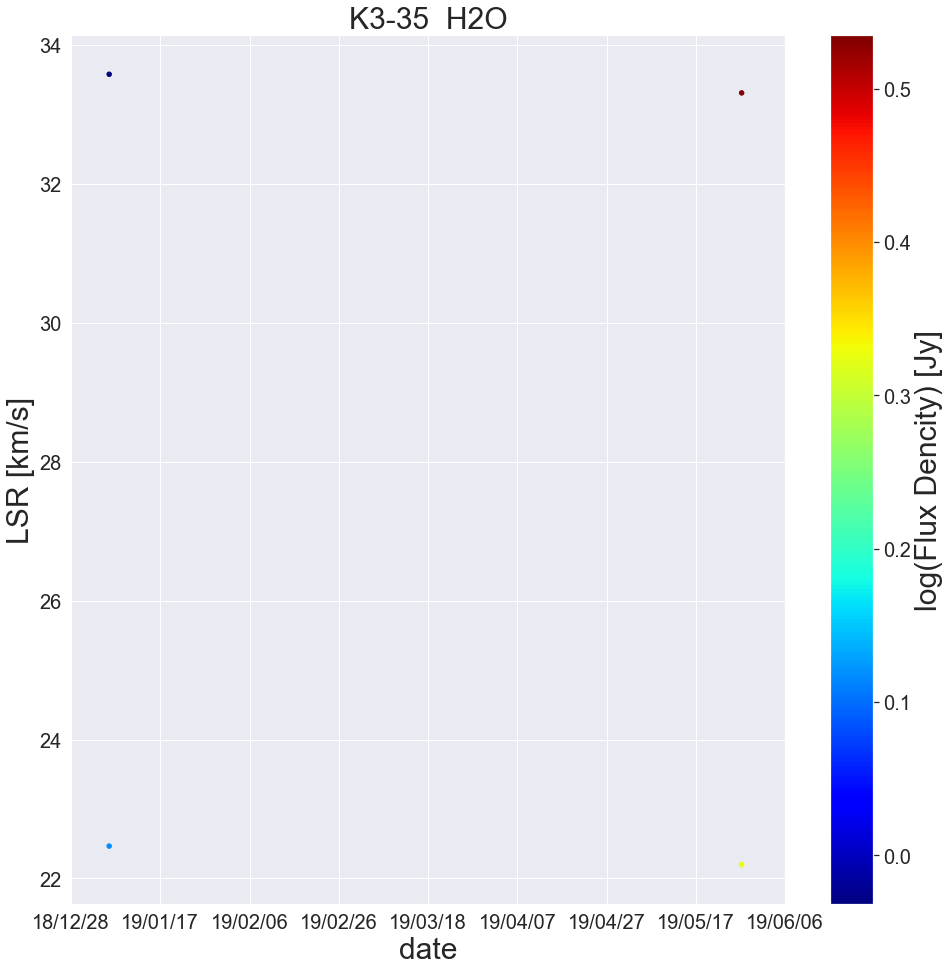

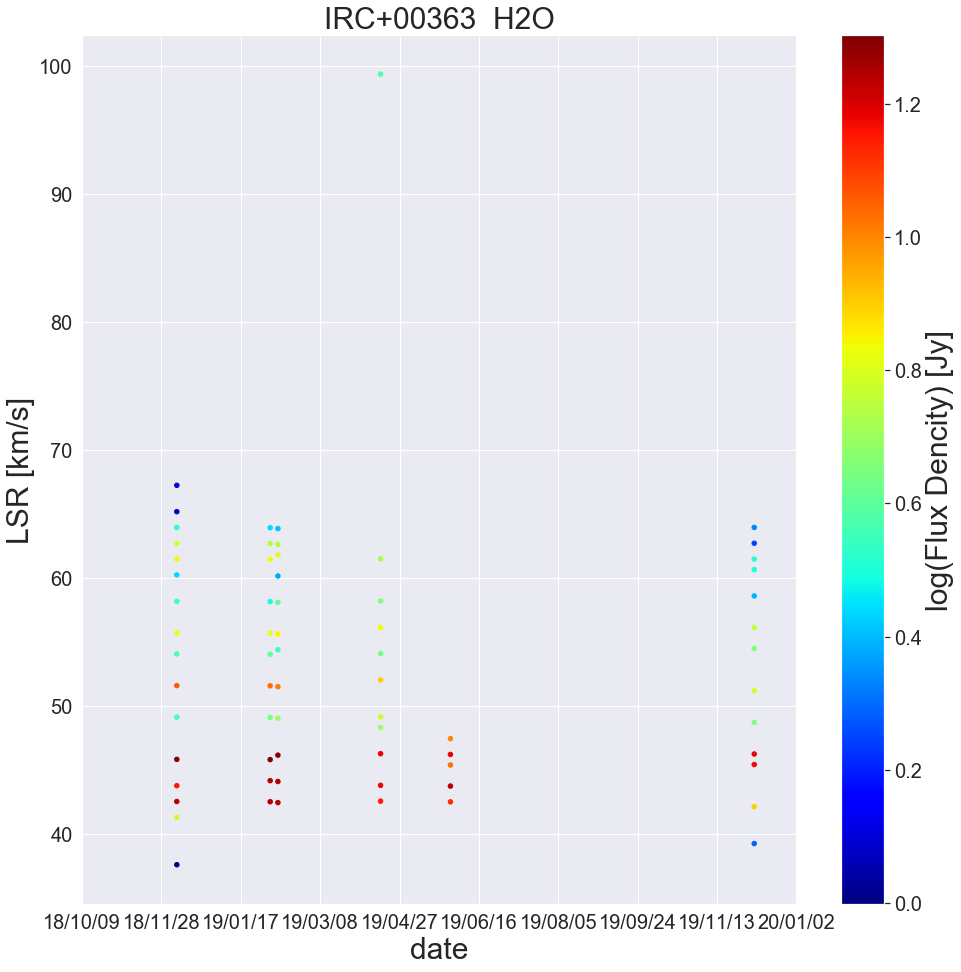

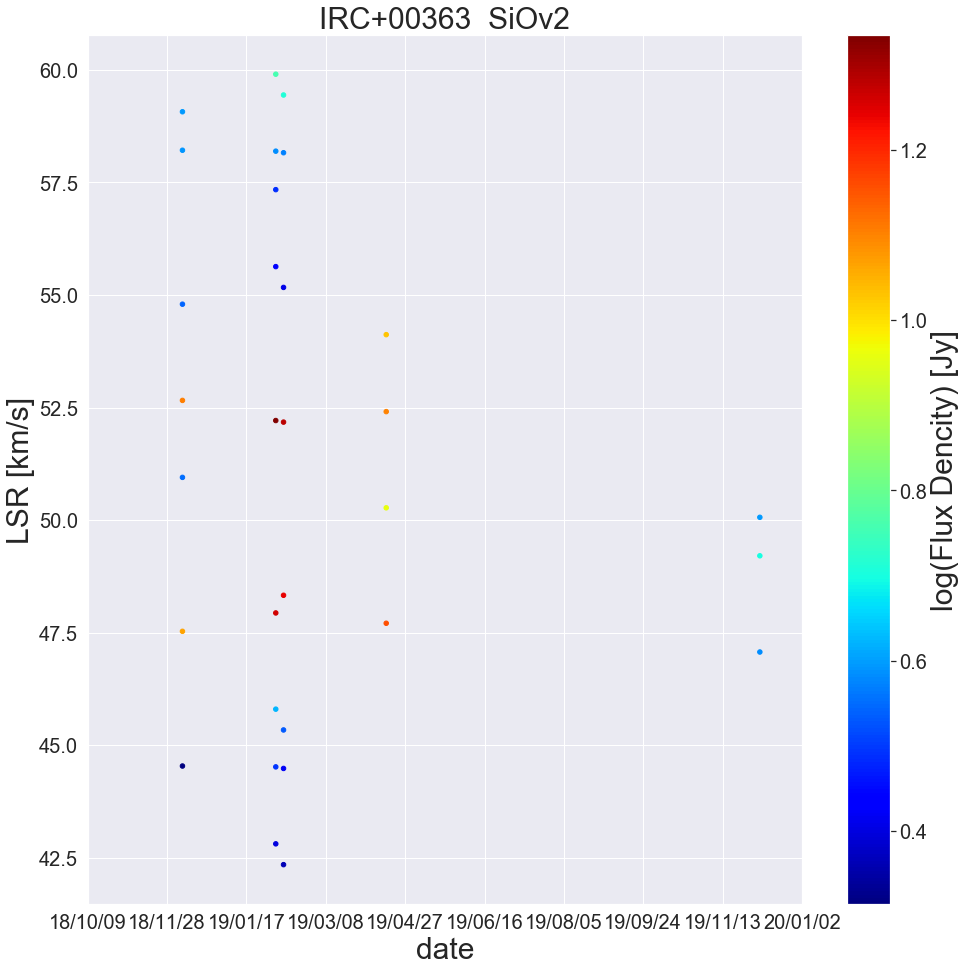

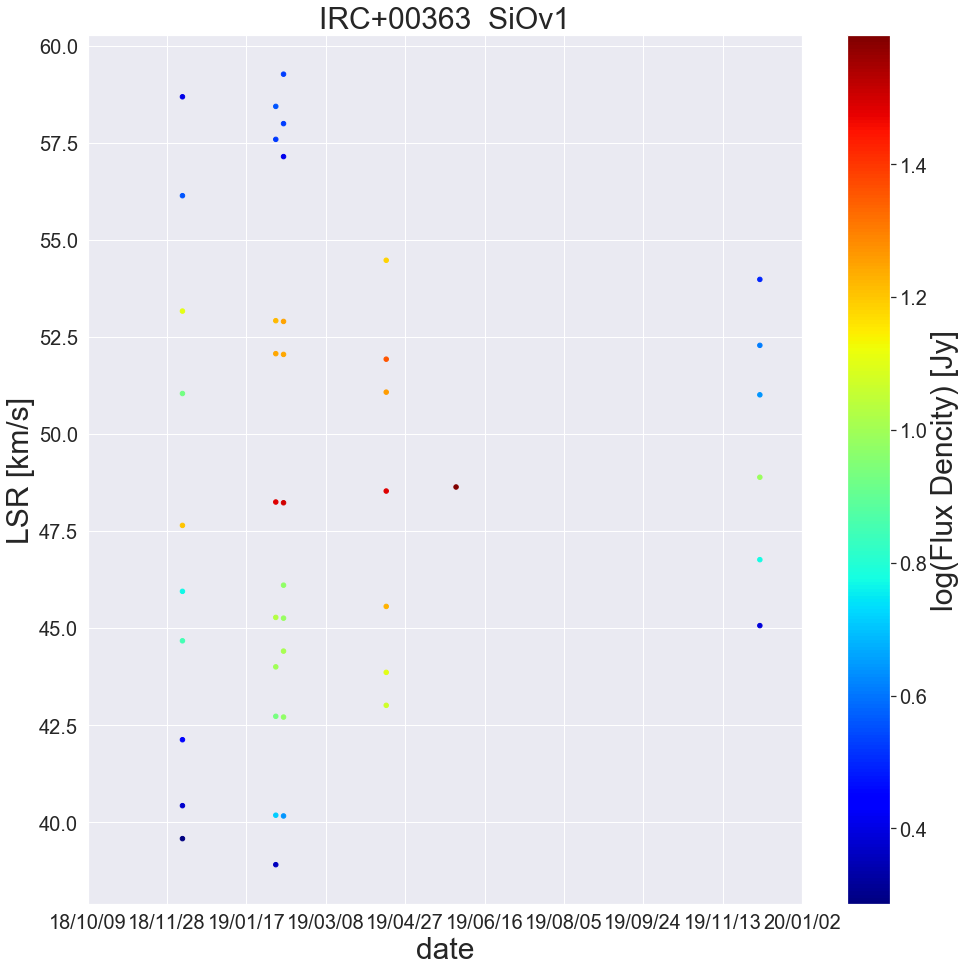

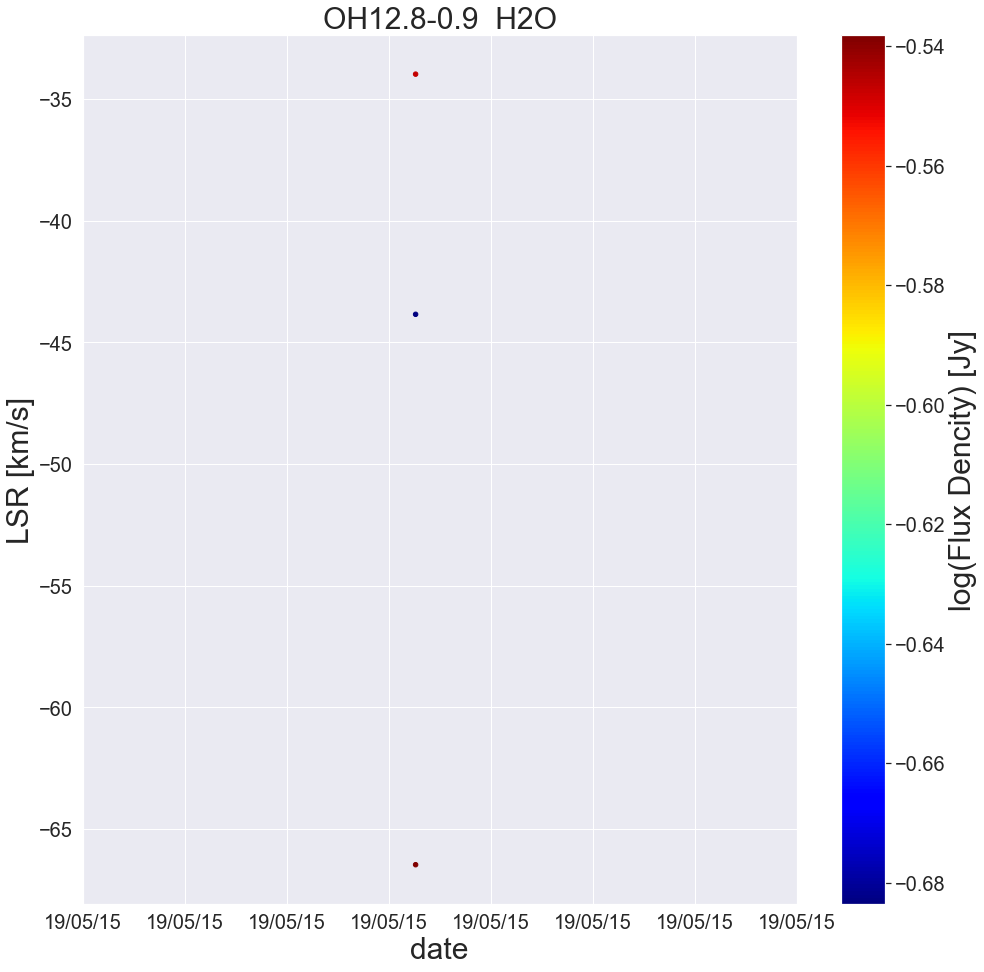

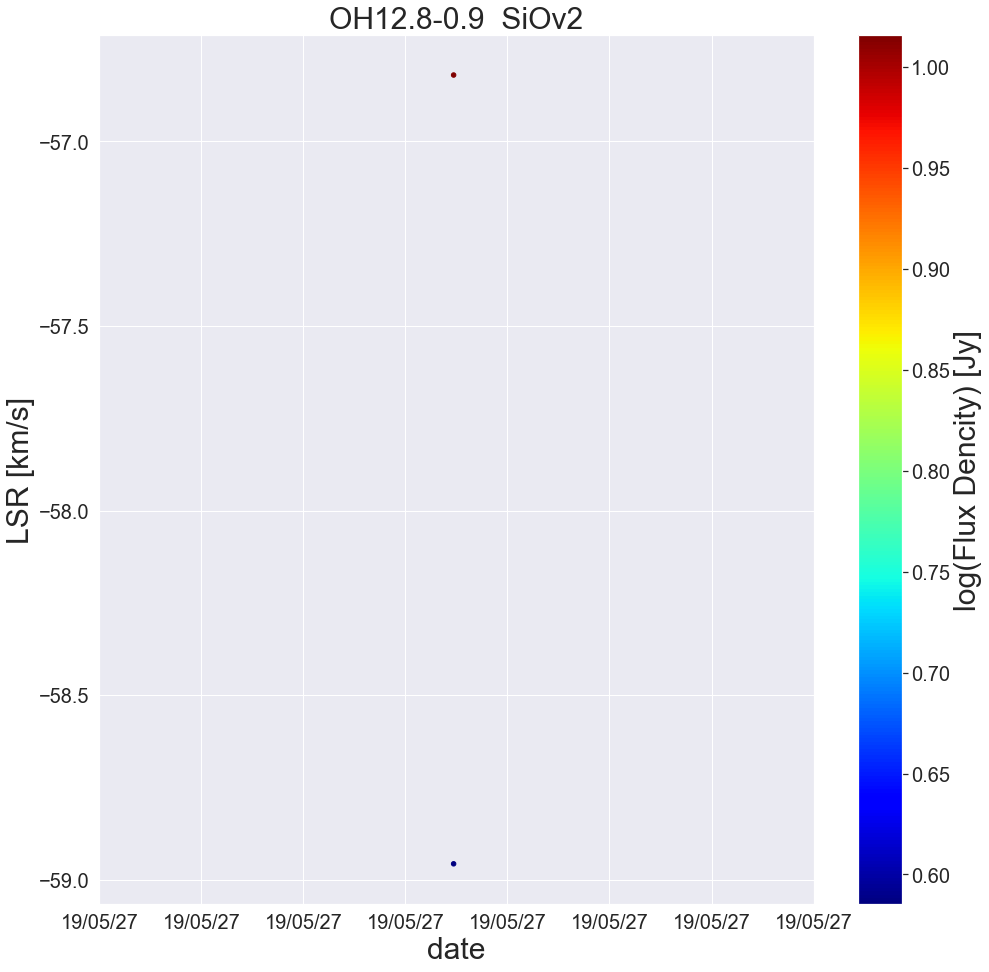

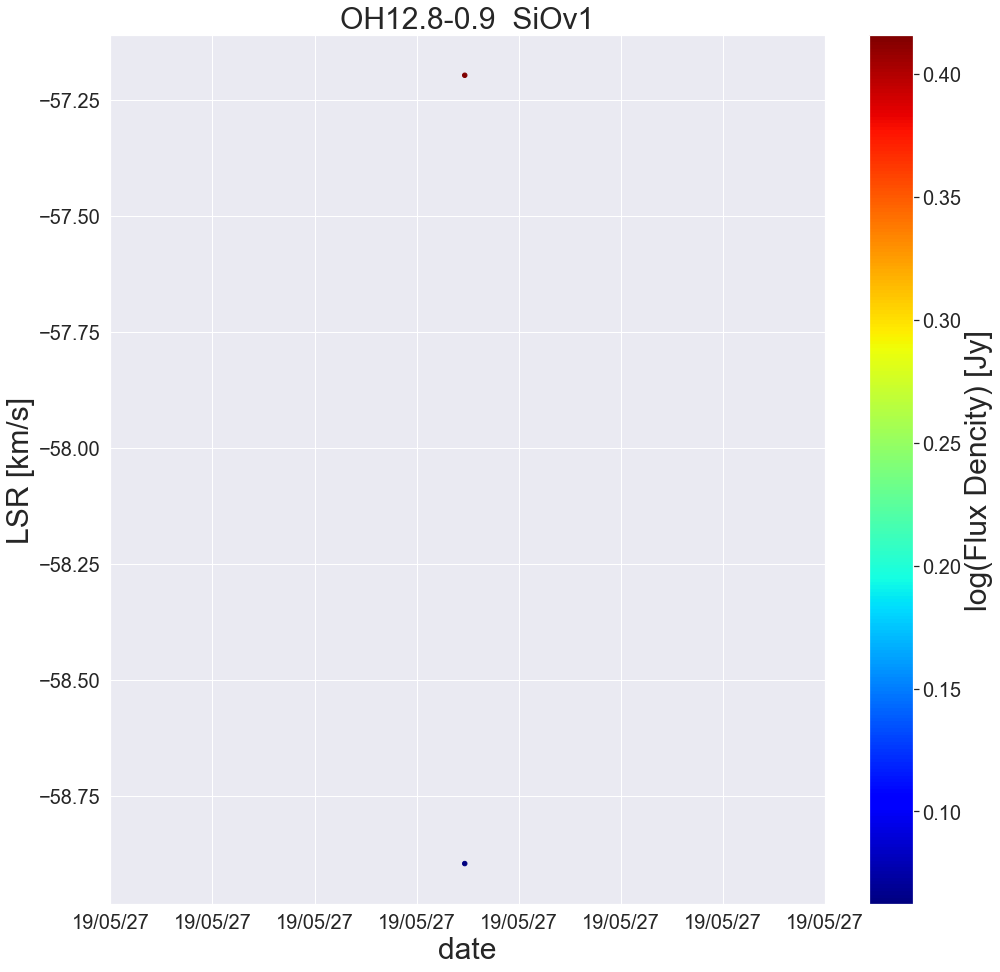

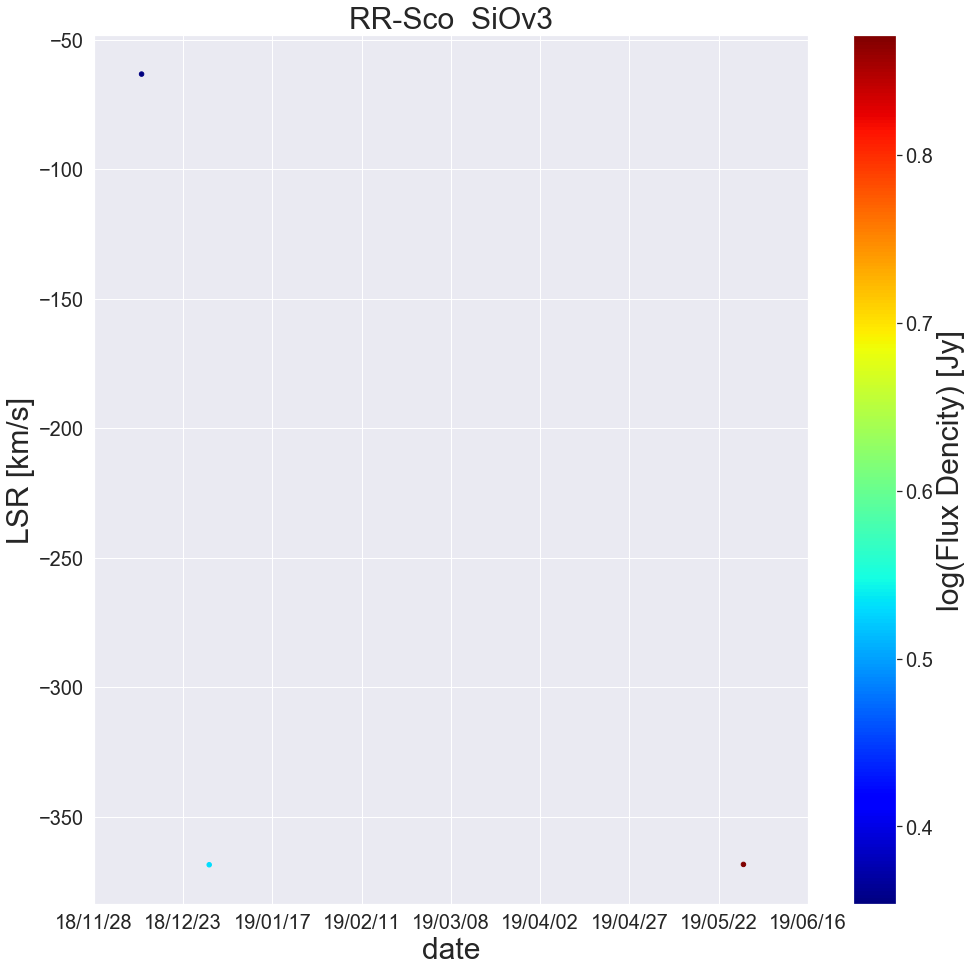

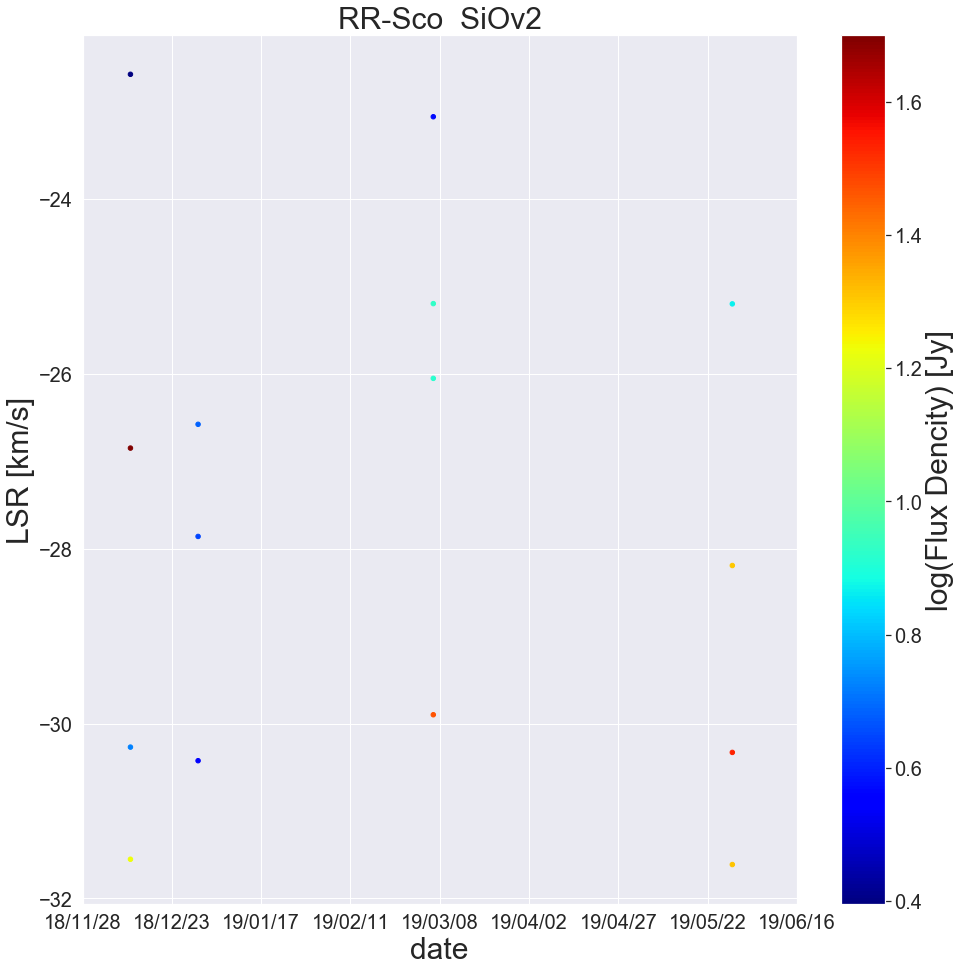

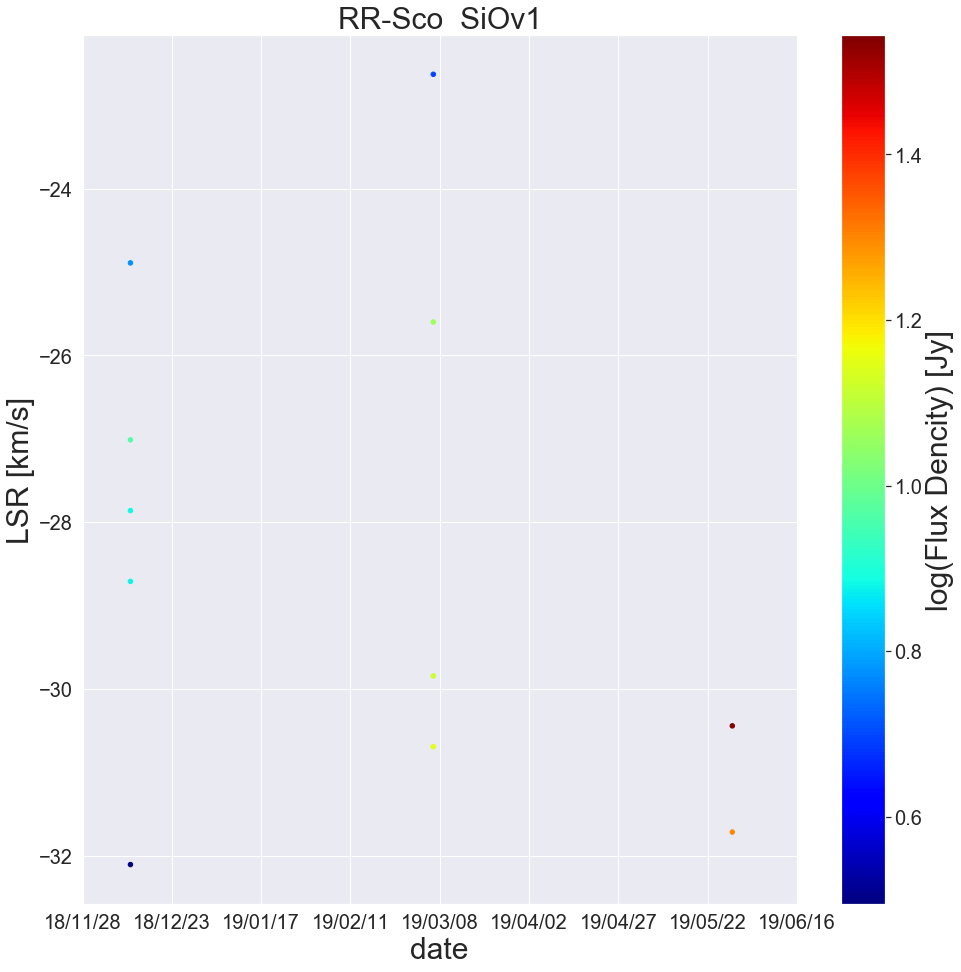

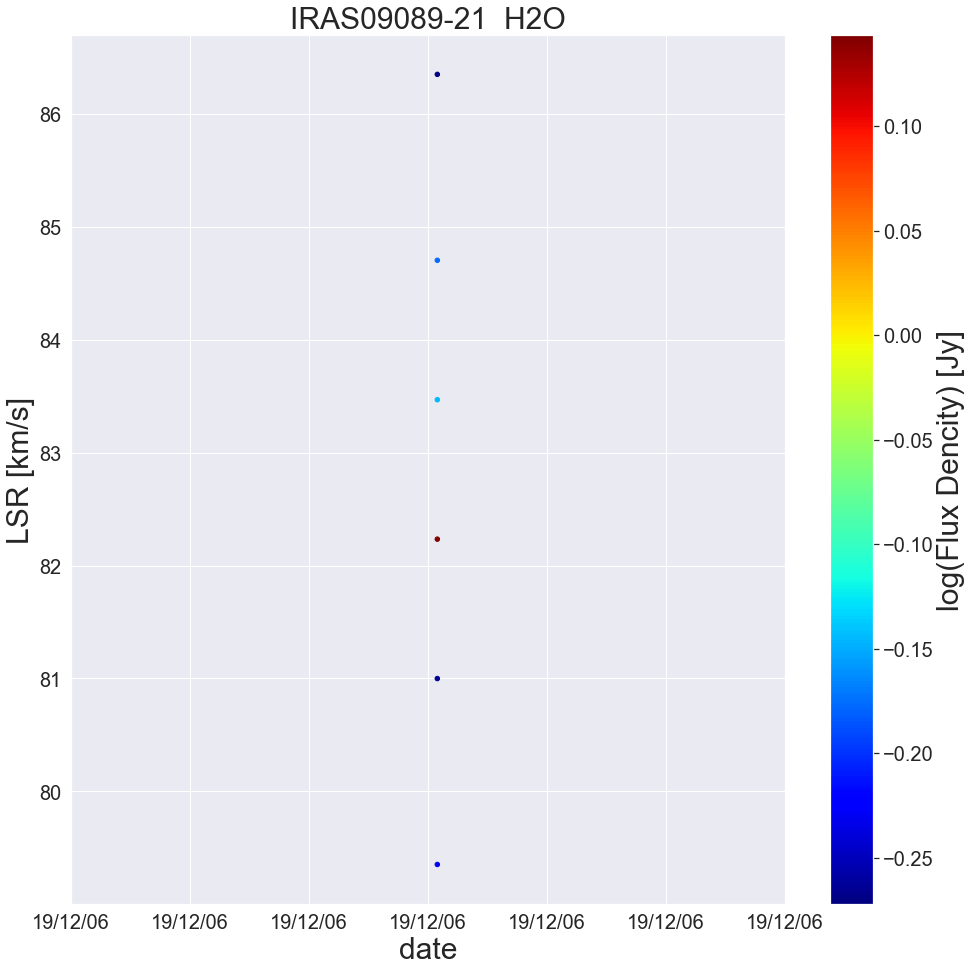

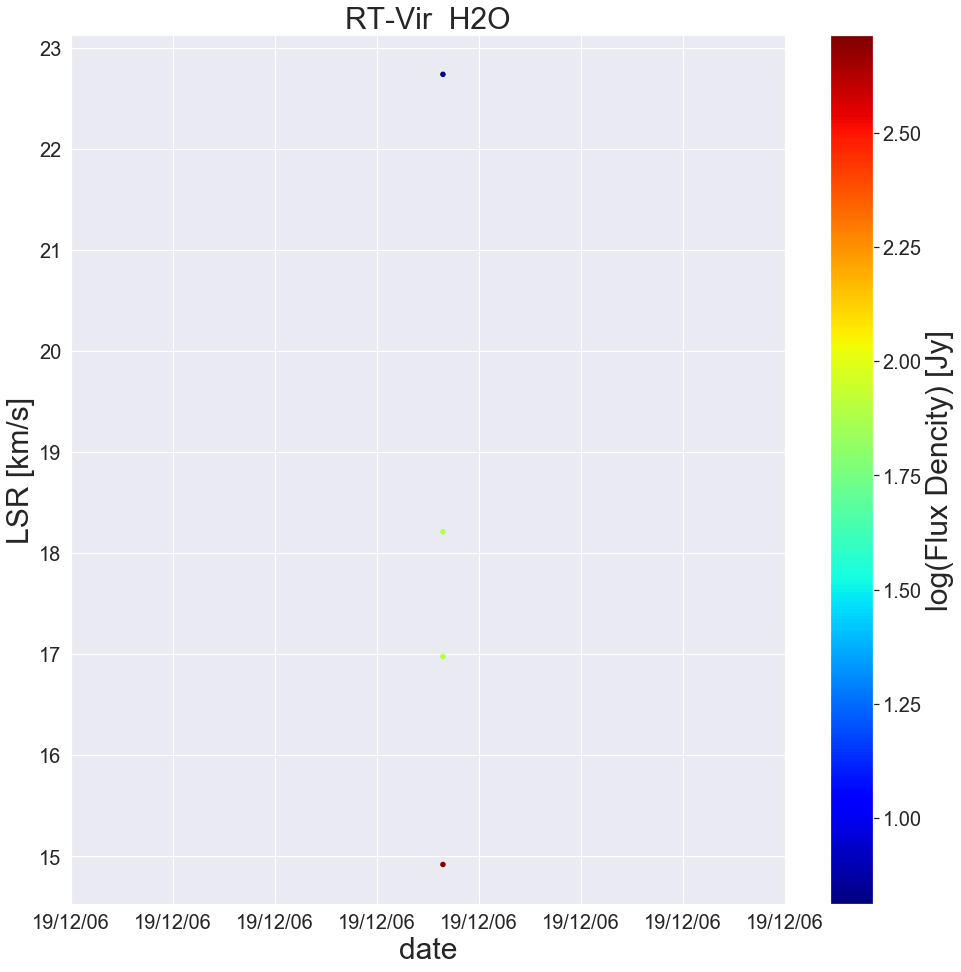

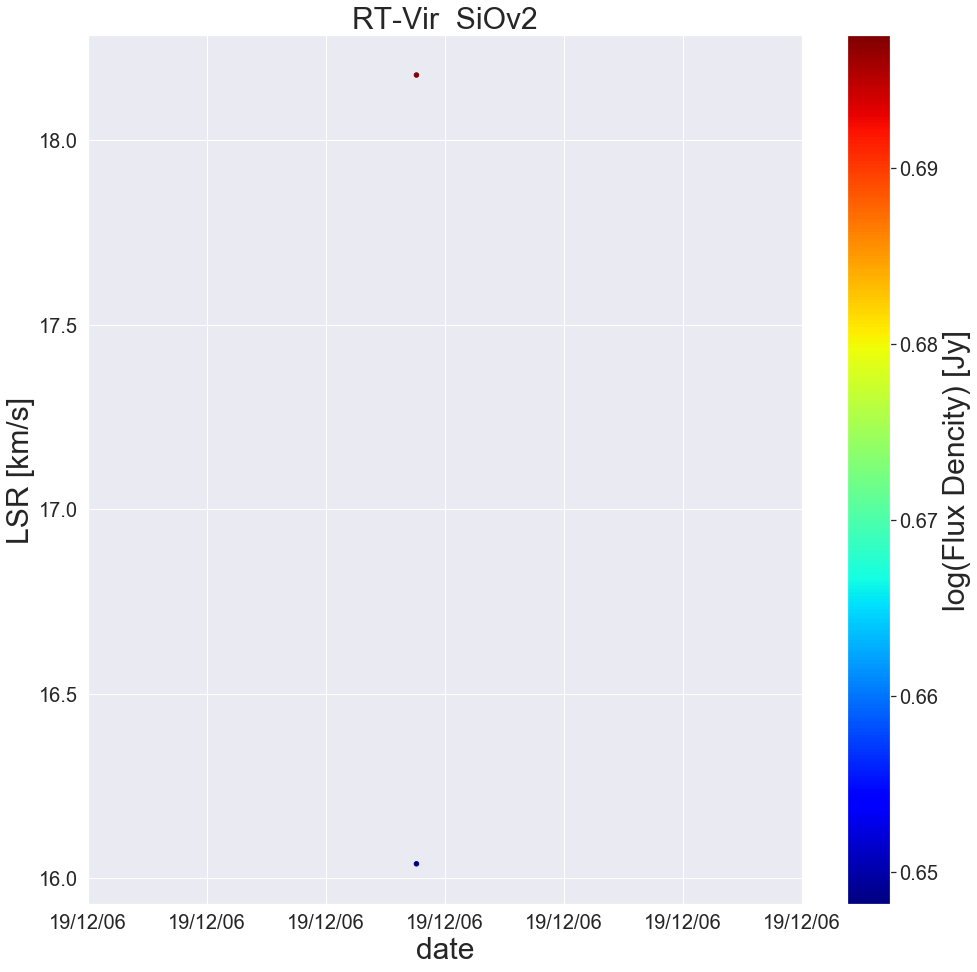

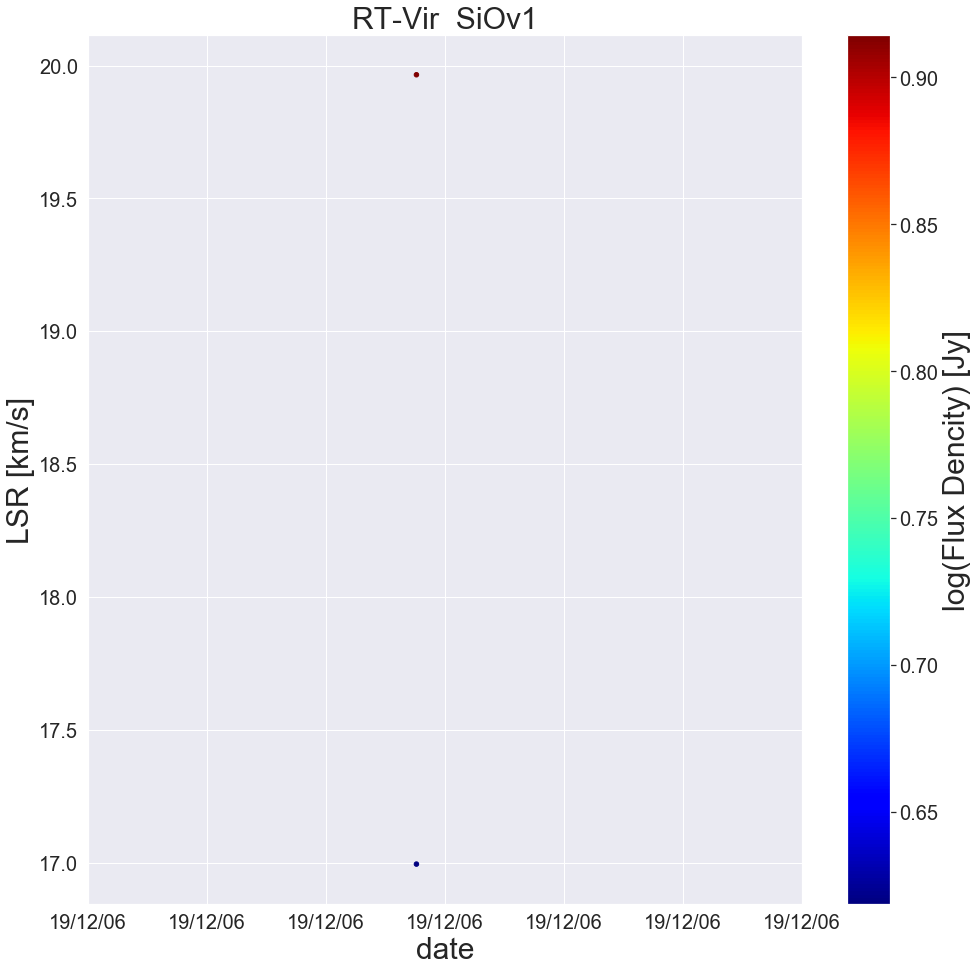

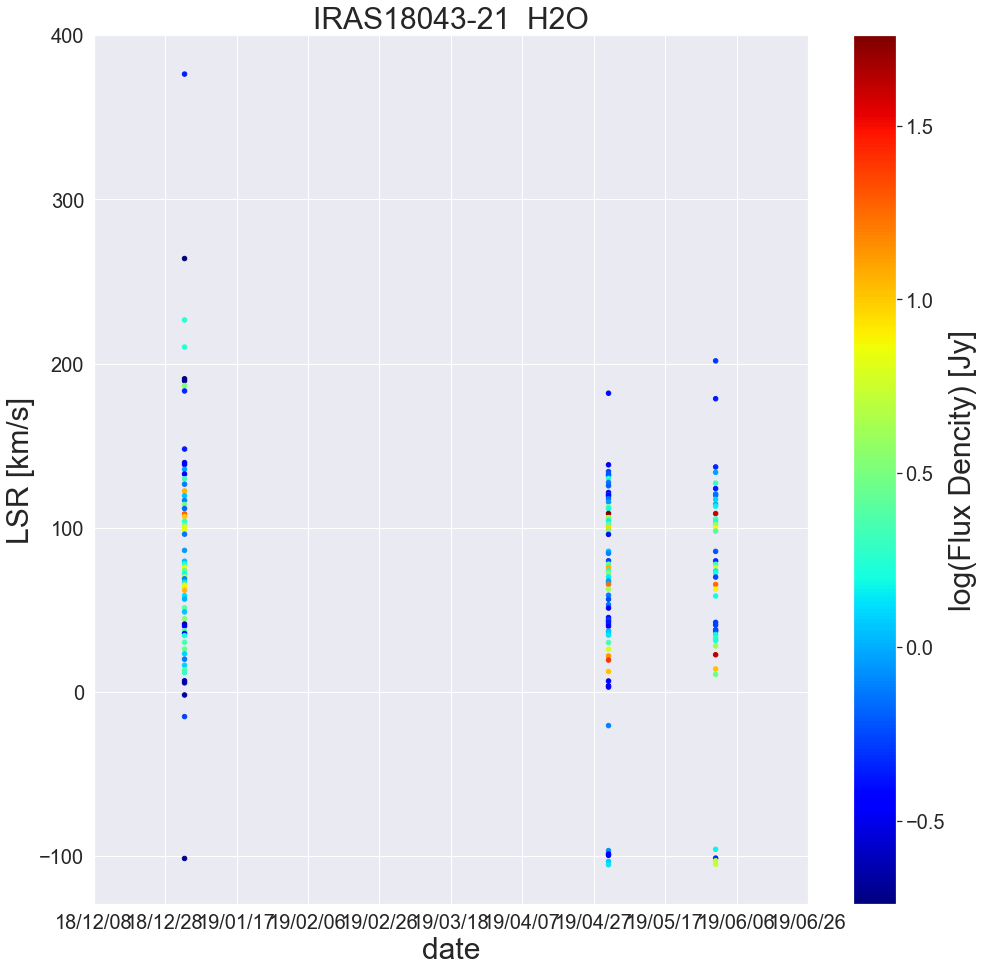

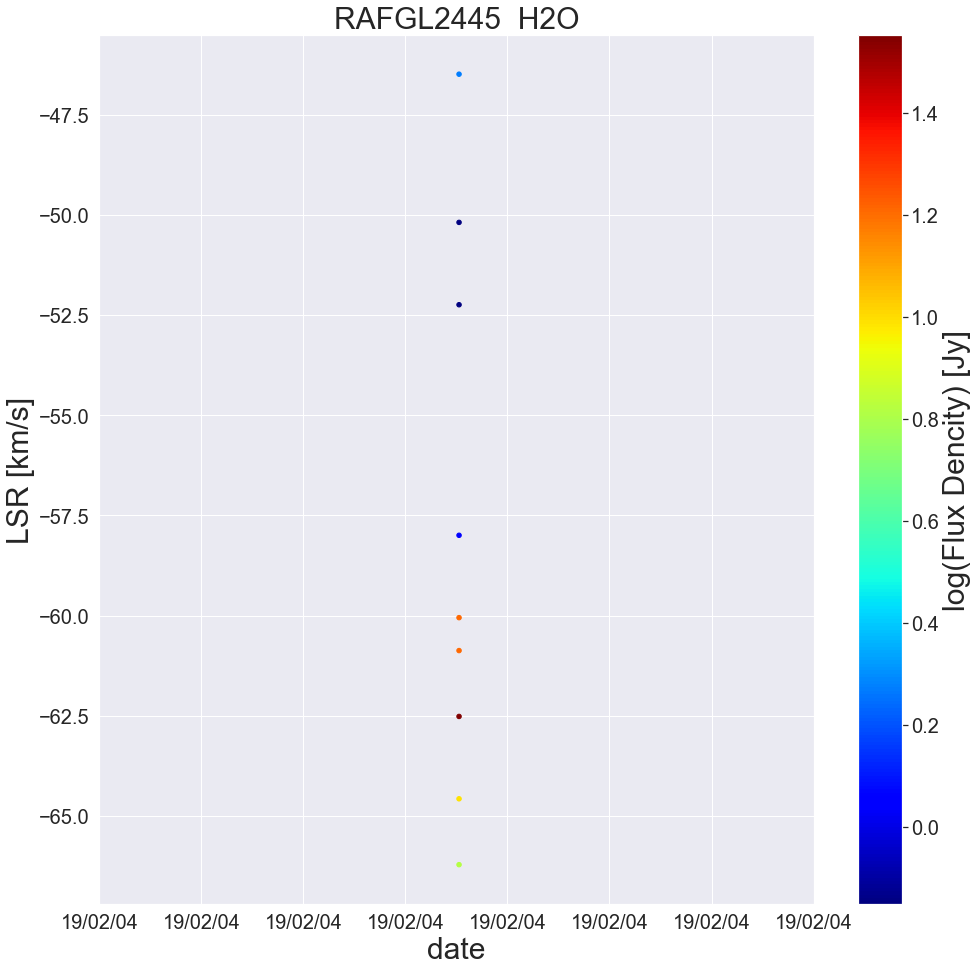

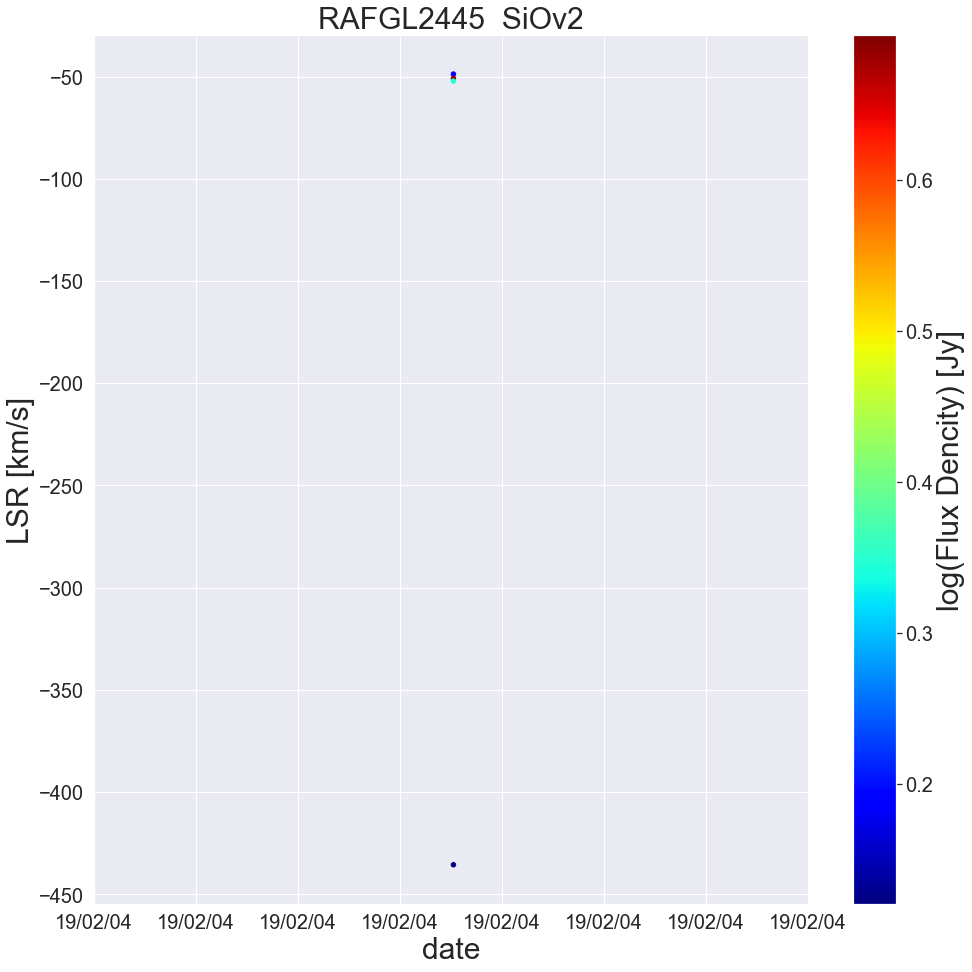

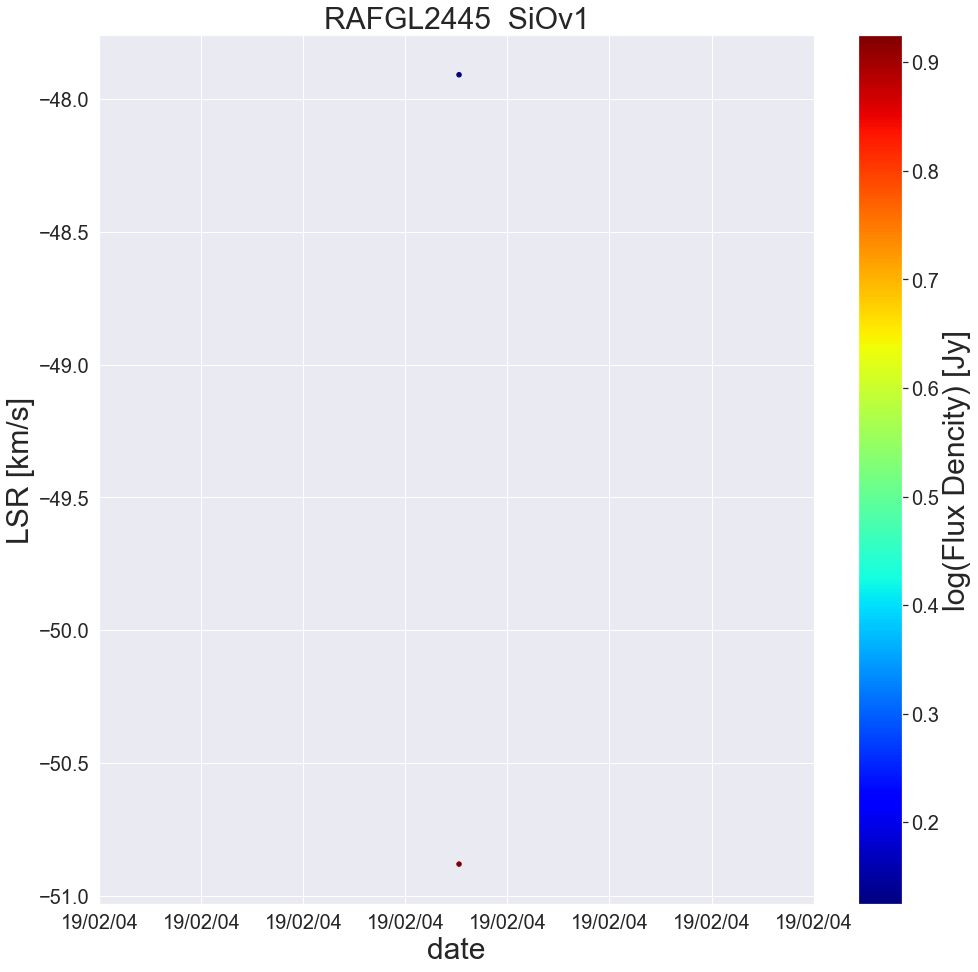

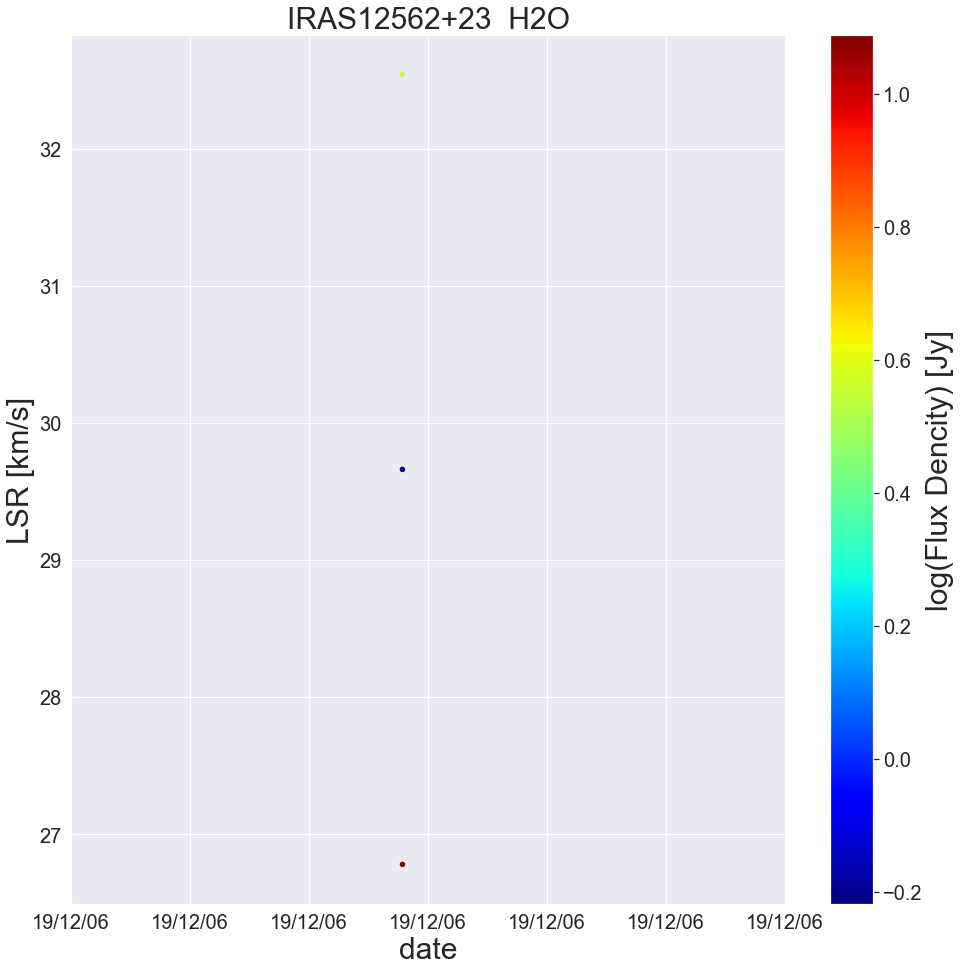

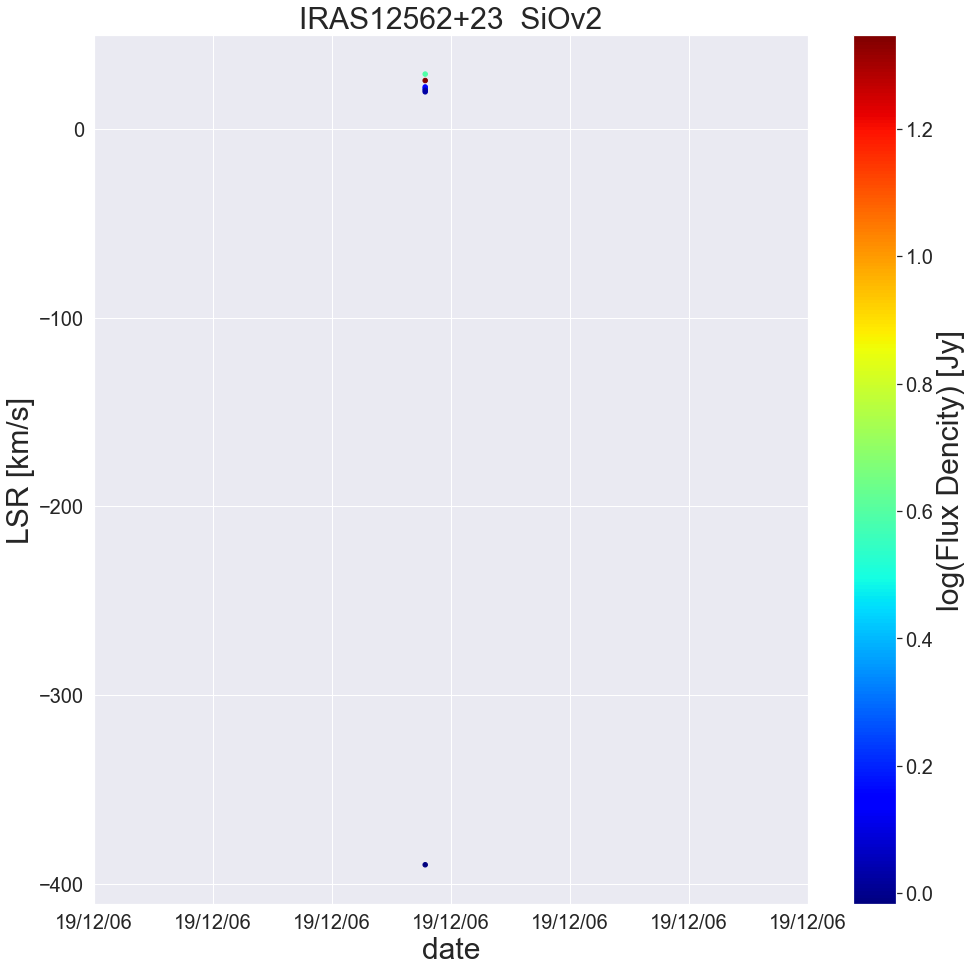

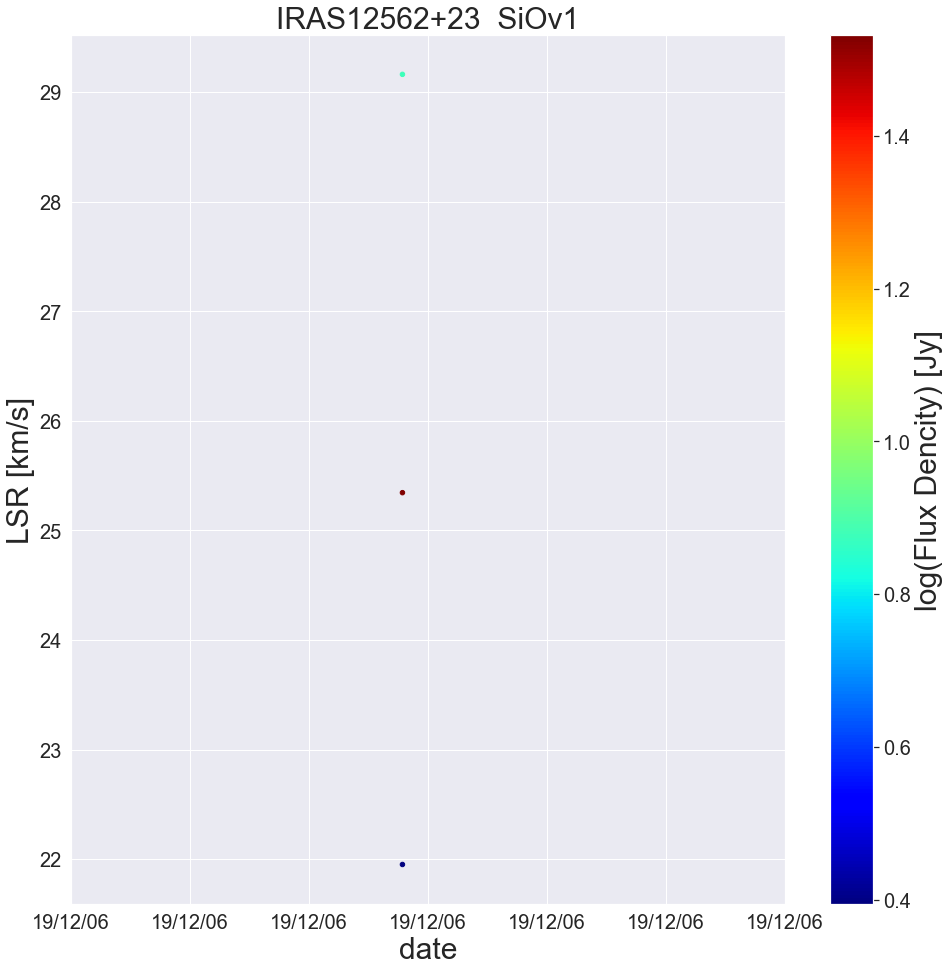

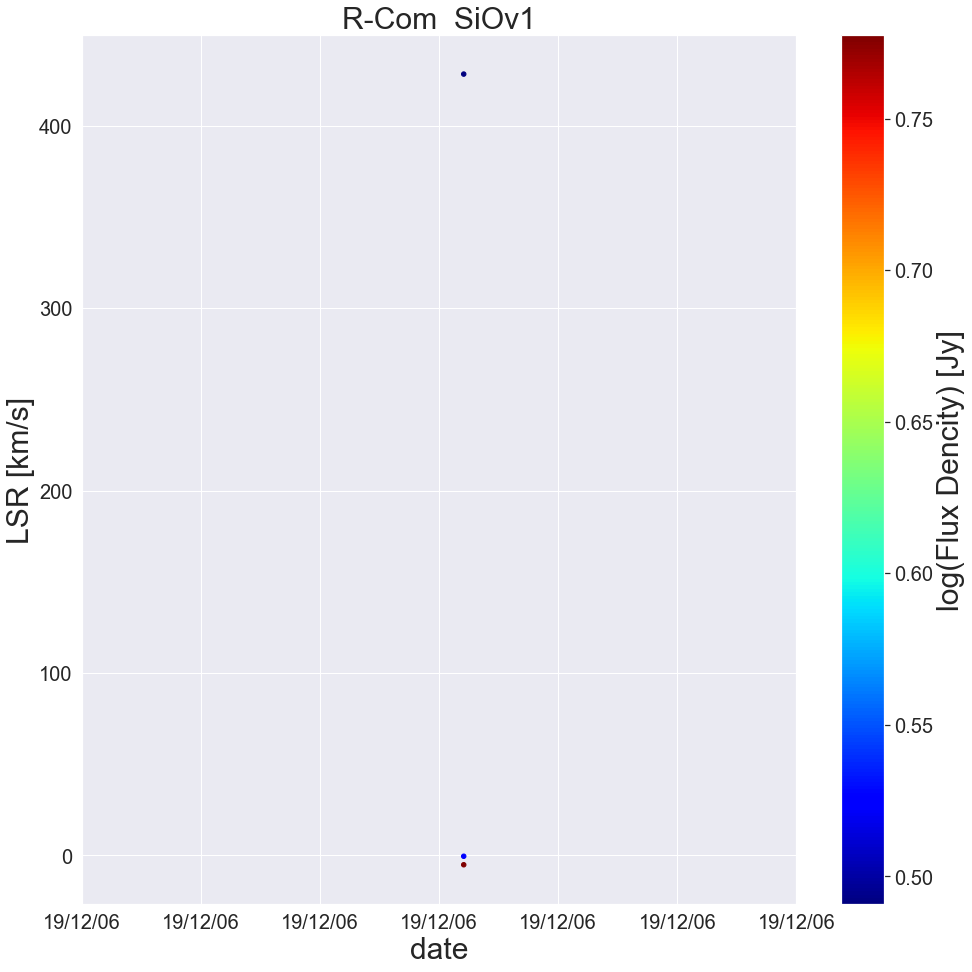

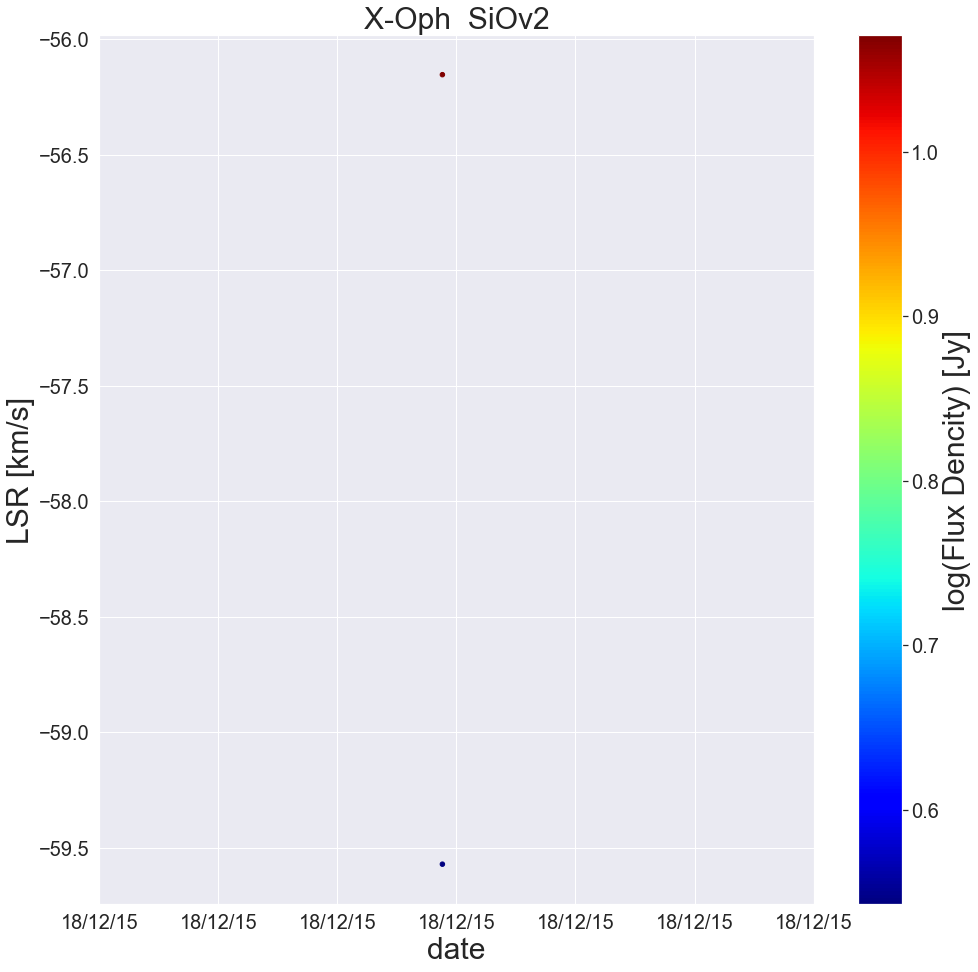

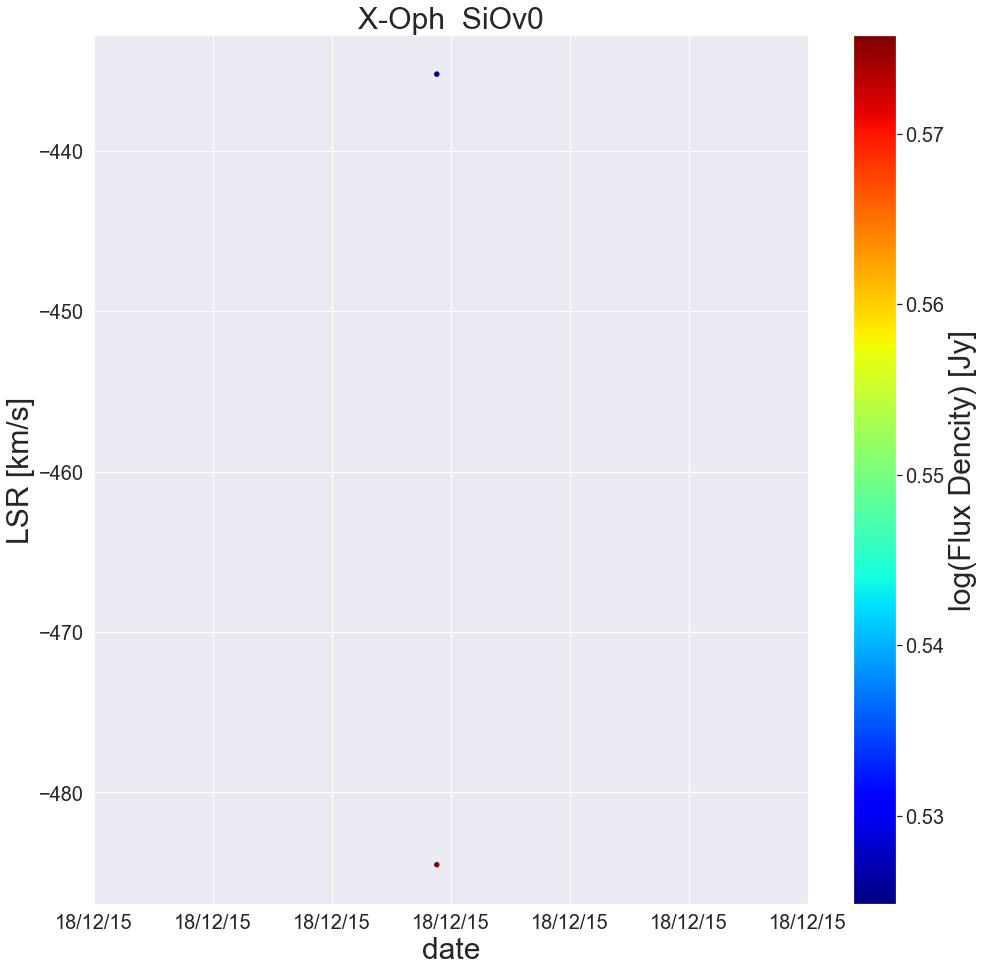

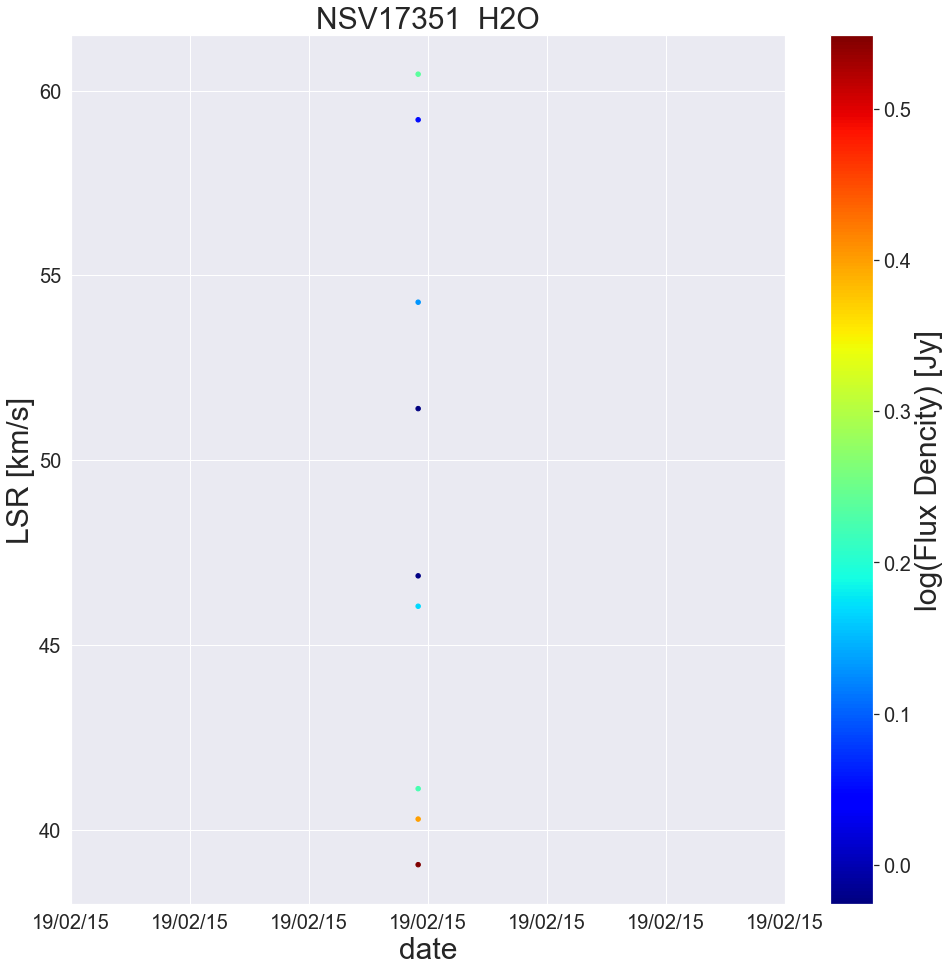

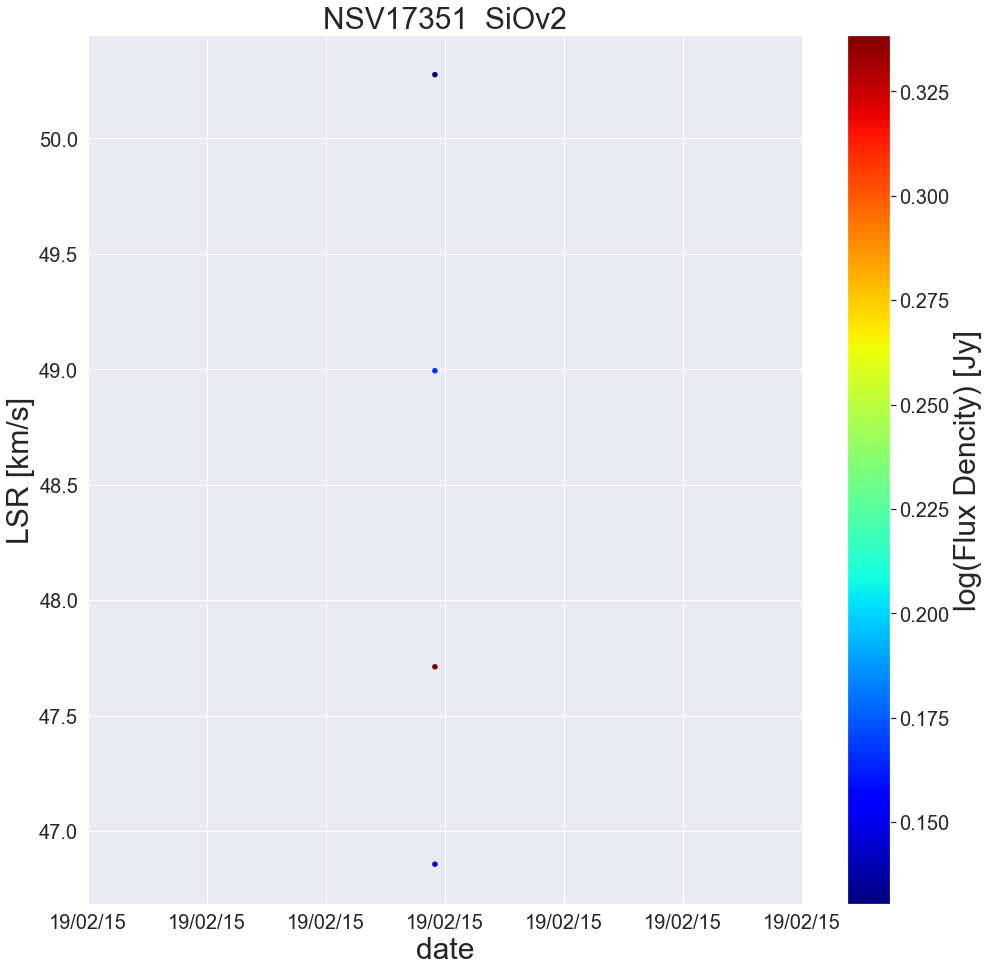

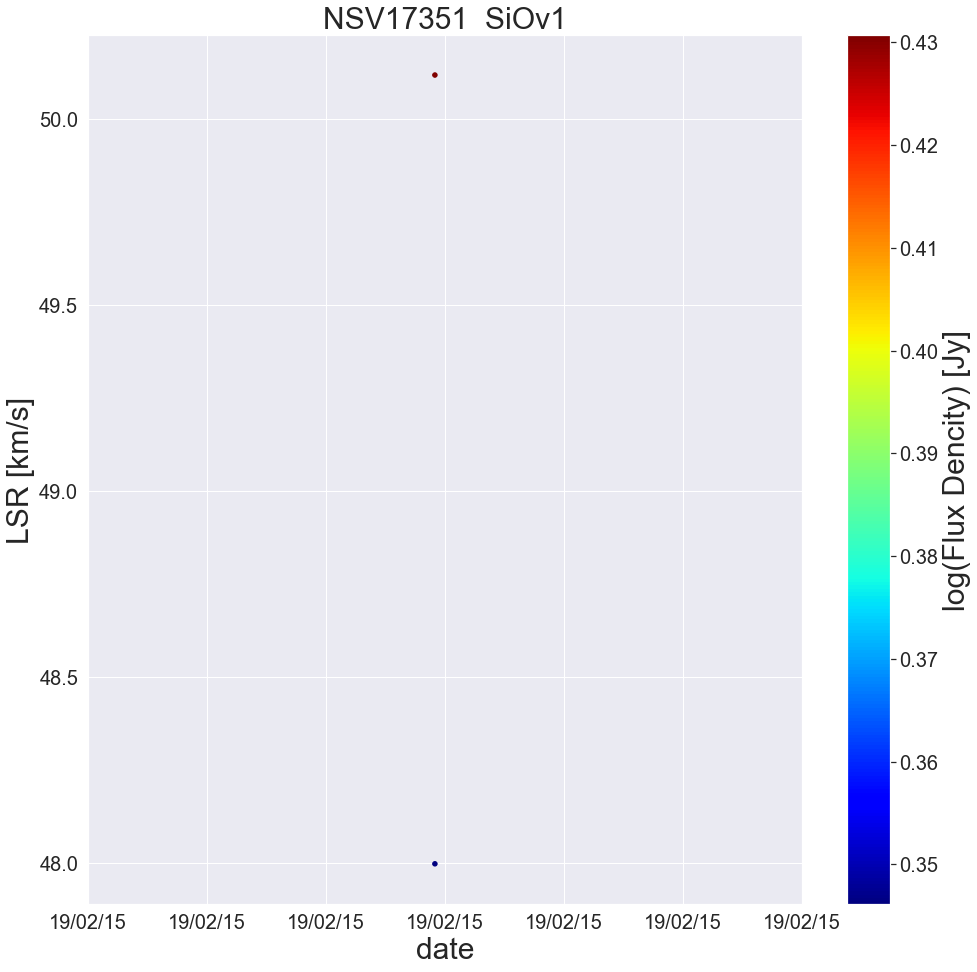

In [5]:
# withoutlist = [['IRAS17291-21', 'H2OR'], ['IRAS16552-30', 'SiOv3']]
withoutlist = []
# print(len(peak_list))
for fname, title in peak_list:
    if not title in withoutlist:
        tf.oname = fname

        data = GetSpectrum.load_file(tf.oname)
        # print(data)
        mjd = [float(data[i][0]) for i in range(0, len(data))]
        lsr = [float(data[i][1]) for i in range(0, len(data))]
        flux = [math.log10(float(data[i][2])) for i in range(0, len(data))]
        if len(lsr) == 0 or len(mjd) == 1:
            continue
#         print(lsr)

        fig = plt.figure(figsize = (16,16 ))

        # fig = plt.figure(figsize = (4,3 ))
        ax1 = fig.add_subplot(1,1,1)
        im = ax1.scatter(mjd, lsr, c = flux, cmap = 'jet', s = 20)
        # plt.ylim(135,160)
#         plt.locator_params(axis='x',nbins=4)
        plt.xticks(list(plt.xticks())[0], [ut.mjd2datetime(int(s)).strftime("%y/%m/%d") for s in list(plt.xticks())[0]], fontsize = 20)
        ax1.set_ylabel('LSR [km/s]', fontsize = 30)
        ax1.set_xlabel('date', fontsize = 30)
        ax1.set_title(str(title[0]) + '  ' + str(title[1]), fontsize = 30)
        plt.yticks(fontsize = 20)
        # ax1.set_yticklabels(ax1.get_yticklabels(),fontsize=20)
        # print(list(ax1.get_yticklabels()))
        cbar = plt.colorbar(im)
        cbar.set_label('log(Flux Dencity) [Jy]', fontsize = 30)
        # cbar.xticks(fontsize=20)
        # print(cbar)
        # cbar.set_tics(fontsize=20)
        cbar.ax.tick_params(labelsize=20)
#         plt.rcParams['font.family'] = 'Times New Roman'
        fig.patch.set_alpha(0)
        # plt.rcParams.update({'font.size': 220})
        # plt.rcParams['font.size']  =200
    #     plt.savefig('/Users/yhamae/Desktop/dynamicspectrum.pdf')
        plt.show()

